# Budget Sales Analysis

### Project Overview: Adventure Works Sales Analysis
### Objective:
The primary objective of this project is to analyze the sales data of Adventure Works to identify trends, optimize inventory, and enhance sales strategies. By performing exploratory data analysis (EDA), we aim to uncover insights that can guide decision-making for improving business performance.

### AdventureWorks_Database.xlsx

This file contains multiple sheets, each representing different aspects of the data:

1. **Calender:**
   - Likely contains date-related information, such as fiscal periods, quarters, months, and years.

2. **Customers:**
   - Details about customers, possibly including customer IDs, names, contact information, and other demographic details.

3. **Product:**
   - Information about the products, including product IDs, names, categories, and other relevant attributes.

4. **Territory:**
   - Data about different sales territories, possibly including region names, territory IDs, and sales targets for each territory.

5. **Sales:**
   - Sales data, which could include transaction details such as sales amount, date, customer ID, product ID, and territory ID.

### Budget.xlsx

This file contains a single sheet:

1. **Budget:**
   - Likely includes budgeted sales figures, potentially broken down by time periods, product categories, territories, or other attributes.

### Next Steps

1. **Inspect and Explore Each Sheet:**
   - Load and inspect the first few rows of each sheet to understand the structure and contents.
   - Identify key columns and data types in each sheet.

2. **Integrate Data:**
   - Merge data from different sheets based on common keys (e.g., customer IDs, product IDs, territory IDs).

3. **Analyze and Compare:**
   - Compare actual sales data from the Sales sheet with budget data from the Budget sheet.
   - Conduct variance analysis to identify discrepancies between budgeted and actual sales.

4. **Create Dashboards:**
   - Use the integrated data to create visualizations and dashboards in Tableau or Power BI.



In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:


# Load the Excel files
adventureworks_data = pd.ExcelFile('AdventureWorks_Database.xlsx')
budget_data = pd.ExcelFile('Budget.xlsx')


In [3]:
# Parse each sheet into a DataFrame
calendar_df = adventureworks_data.parse('Calender')
customers_df = adventureworks_data.parse('Customers')
product_df = adventureworks_data.parse('Product')
territory_df = adventureworks_data.parse('Territory')
sales_df = adventureworks_data.parse('Sales')
budget_df = budget_data.parse('Budget')


In [4]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1461 non-null   datetime64[ns]
 1   DateKey         1461 non-null   int64         
 2   Year            1461 non-null   int64         
 3   Quarter         1461 non-null   object        
 4   MonthNum        1461 non-null   int64         
 5   Month           1461 non-null   object        
 6   FiscalYear      1461 non-null   object        
 7   FiscalQuarter   1461 non-null   object        
 8   FiscalMonthNum  1461 non-null   int64         
 9   FiscalMonth     1461 non-null   object        
 10  MonthYear       1461 non-null   object        
 11  MonthYearLong   1461 non-null   object        
 12  MonthYearNum    1461 non-null   int64         
 13  WeekdayNum      1461 non-null   int64         
 14  Weekday         1461 non-null   object        
 15  Week

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18484 non-null  int64         
 1   FirstName             18484 non-null  object        
 2   LastName              18484 non-null  object        
 3   FullName              18484 non-null  object        
 4   BirthDate             18484 non-null  datetime64[ns]
 5   MaritalStatus         18484 non-null  object        
 6   Gender                18484 non-null  object        
 7   YearlyIncome          18484 non-null  int64         
 8   TotalChildren         18484 non-null  int64         
 9   NumberChildrenAtHome  18484 non-null  int64         
 10  Education             18484 non-null  object        
 11  Occupation            18484 non-null  object        
 12  HouseOwnerFlag        18484 non-null  int64         
 13  NumberCarsOwned 

In [6]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ProductKey          606 non-null    int64         
 1   ProductName         606 non-null    object        
 2   SubCategory         397 non-null    object        
 3   Category            397 non-null    object        
 4   StandardCost        395 non-null    float64       
 5   Color               352 non-null    object        
 6   ListPrice           395 non-null    float64       
 7   DaysToManufacture   606 non-null    int64         
 8   ProductLine         380 non-null    object        
 9   ModelName           397 non-null    object        
 10  Photo               606 non-null    object        
 11  ProductDescription  396 non-null    object        
 12  StartDate           606 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object

In [7]:
territory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SalesTerritoryKey  11 non-null     int64 
 1   Region             10 non-null     object
 2   Country            10 non-null     object
 3   Group              10 non-null     object
 4   RegionImage        11 non-null     object
dtypes: int64(1), object(4)
memory usage: 568.0+ bytes


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [9]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AdventureWorks Budget Data  24 non-null     object
 1   Unnamed: 1                  18 non-null     object
 2   Unnamed: 2                  18 non-null     object
 3   Unnamed: 3                  18 non-null     object
 4   Unnamed: 4                  22 non-null     object
 5   Unnamed: 5                  22 non-null     object
 6   Unnamed: 6                  22 non-null     object
 7   Unnamed: 7                  22 non-null     object
 8   Unnamed: 8                  22 non-null     object
 9   Unnamed: 9                  22 non-null     object
 10  Unnamed: 10                 22 non-null     object
 11  Unnamed: 11                 22 non-null     object
 12  Unnamed: 12                 22 non-null     object
 13  Unnamed: 13                 22 non-null     object
 

# Data Cleaning

In [10]:
sales_customers_df = sales_df.merge(customers_df, on='CustomerKey', how='inner')
sales_customers_products_df = sales_customers_df.merge(product_df, on='ProductKey', how='inner')
sales_customers_products_territory_df = sales_customers_products_df.merge(territory_df, on='SalesTerritoryKey', how='inner')
sales_customers_products_territory_calendar_df = sales_customers_products_territory_df.merge(calendar_df, left_on='OrderDate', right_on='Date', how='inner')


In [11]:
sales_customers_products_territory_calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [12]:
# Rename the DataFrame
adventure_df = sales_customers_products_territory_calendar_df

# Display information about the renamed DataFrame
adventure_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 13     

In [13]:
# Display initial column names
print("Initial Columns:")
print(adventure_df.columns.tolist())

# Drop the specific unnamed columns
columns_to_drop = ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 22']
adventure_df_cleaned = adventure_df.drop(columns=columns_to_drop)

Initial Columns:
['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey', 'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber', 'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount', 'TaxAmt', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'StandardCost_x', 'List Price', 'Unnamed: 22', 'diif std cost', 'diff list price', 'FirstName', 'LastName', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase', 'CommuteDistance', 'ProductName', 'SubCategory', 'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate', 'Region', 'Country', 'Group', 'RegionImage', 'Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear', 'FiscalQuarter', 'FiscalMonthNum', 'F

In [14]:
adventure_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  Unnamed: 15     

In [15]:
adventure_df_cleaned.head(10)

ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
0         310 2014-01-01 2014-01-08        21768             1   
1         346 2014-01-01 2014-01-08        11003             1   
2         336 2014-01-01 2014-01-08        14501             1   
3         346 2014-01-01 2014-01-08        25863             1   
4         346 2014-01-01 2014-01-08        28389             1   
5         310 2014-01-30 2014-02-06        21727             1   
6         348 2014-01-30 2014-02-06        19802             1   
7         324 2014-01-30 2014-02-06        26620             1   
8         350 2014-01-30 2014-02-06        11009             1   
9         348 2014-01-30 2014-02-06        28393             1   

   SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  OrderQuantity  \
0                  6          SO43697                     1              2   
1                  9          SO43701                     1              2   
2                  4          SO43700                     1              2   
3                  1          SO43699                     1              2   
4                  7          SO43698                     1              2   
5                  6          SO43833                     1              4   
6                  6          SO43835                     1              4   
7                  6          SO43836                     1              4   
8                  9          SO43837                     1              4   
9                  7          SO43834                     1              4   

   UnitPrice  ...  FiscalYear  FiscalQuarter  FiscalMonthNum  FiscalMonth  \
0  1789.1350  ...      FY2014            FQ3               7          Jan   
1  1699.9950  ...      FY2014            FQ3               7          Jan   
2   349.5491  ...      FY2014            FQ3               7          Jan   
3  1699.9950  ...      FY2014            FQ3               7          Jan   
4  1699.9950  ...      FY2014            FQ3               7          Jan   
5   894.5675  ...      FY2014            FQ3               7          Jan   
6   843.7475  ...      FY2014            FQ3               7          Jan   
7   174.7745  ...      FY2014            FQ3               7          Jan   
8   843.7475  ...      FY2014            FQ3               7          Jan   
9   843.7475  ...      FY2014            FQ3               7          Jan   

   MonthYear  MonthYearLong  MonthYearNum  WeekdayNum  Weekday  WeekdayWeekend  
0     Jan-14       Jan-2014        201401           4      Wed         Weekday  
1     Jan-14       Jan-2014        201401           4      Wed         Weekday  
2     Jan-14       Jan-2014        201401           4      Wed         Weekday  
3     Jan-14       Jan-2014        201401           4      Wed         Weekday  
4     Jan-14       Jan-2014        201401           4      Wed         Weekday  
5     Jan-14       Jan-2014        201401           5      Thu         Weekday  
6     Jan-14       Jan-2014        201401           5      Thu         Weekday  
7     Jan-14       Jan-2014        201401           5      Thu         Weekday  
8     Jan-14       Jan-2014        201401           5      Thu         Weekday  
9     Jan-14       Jan-2014        201401           5      Thu         Weekday  

[10 rows x 68 columns]

In [16]:
# Display specific unnamed columns
unnamed_columns = ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18']
print(adventure_df[unnamed_columns].head())

   Unnamed: 15  Unnamed: 16  Unnamed: 18
0    3578.2700          0.0    -764.3184
1    3399.9900          0.0    -424.3188
2     699.0982          0.0    -127.1944
3    3399.9900          0.0    -424.3188
4    3399.9900          0.0    -424.3188


In [17]:
# Identify unnamed columns
unnamed_columns = [col for col in adventure_df_cleaned.columns if 'Unnamed' in col]

# Inspect the unnamed columns
print("Unnamed Columns:", unnamed_columns)
print(adventure_df_cleaned[unnamed_columns].head())

Unnamed Columns: ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18']
   Unnamed: 15  Unnamed: 16  Unnamed: 18
0    3578.2700          0.0    -764.3184
1    3399.9900          0.0    -424.3188
2     699.0982          0.0    -127.1944
3    3399.9900          0.0    -424.3188
4    3399.9900          0.0    -424.3188


In [18]:
# Identify unnamed columns
columns_to_drop = ['Unnamed: 15', 'Unnamed: 16', 'Unnamed: 18']

# Drop the specified unnamed columns
adventure_df_cleaned.drop(columns=columns_to_drop, inplace=True)

# Display column names after dropping the specified columns
print("Columns After Dropping Specified Unnamed Columns:")
print(adventure_df_cleaned.columns.tolist())

Columns After Dropping Specified Unnamed Columns:
['ProductKey', 'OrderDate', 'ShipDate', 'CustomerKey', 'PromotionKey', 'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber', 'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'SalesAmount', 'TaxAmt', 'StandardCost_x', 'List Price', 'diif std cost', 'diff list price', 'FirstName', 'LastName', 'FullName', 'BirthDate', 'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren', 'NumberChildrenAtHome', 'Education', 'Occupation', 'HouseOwnerFlag', 'NumberCarsOwned', 'AddressLine1', 'DateFirstPurchase', 'CommuteDistance', 'ProductName', 'SubCategory', 'Category', 'StandardCost_y', 'Color', 'ListPrice', 'DaysToManufacture', 'ProductLine', 'ModelName', 'Photo', 'ProductDescription', 'StartDate', 'Region', 'Country', 'Group', 'RegionImage', 'Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear', 'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear', 'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday', 'We

In [19]:
adventure_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

In [20]:
adventure_df_cleaned.info

<bound method DataFrame.info of        ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
0             310 2014-01-01 2014-01-08        21768             1   
1             346 2014-01-01 2014-01-08        11003             1   
2             336 2014-01-01 2014-01-08        14501             1   
3             346 2014-01-01 2014-01-08        25863             1   
4             346 2014-01-01 2014-01-08        28389             1   
...           ...        ...        ...          ...           ...   
58184         369 2015-05-04 2015-05-11        13489             2   
58185         311 2014-04-25 2014-05-01        13697             1   
58186         369 2015-03-07 2015-03-14        15932             2   
58187         335 2015-03-07 2015-03-14        19181             1   
58188         314 2014-11-29 2014-12-05        12841             1   

       SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  \
0                      6          SO43697                   

In [21]:
# Rename the DataFrame
adventure_data = adventure_df_cleaned



In [22]:
adventure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

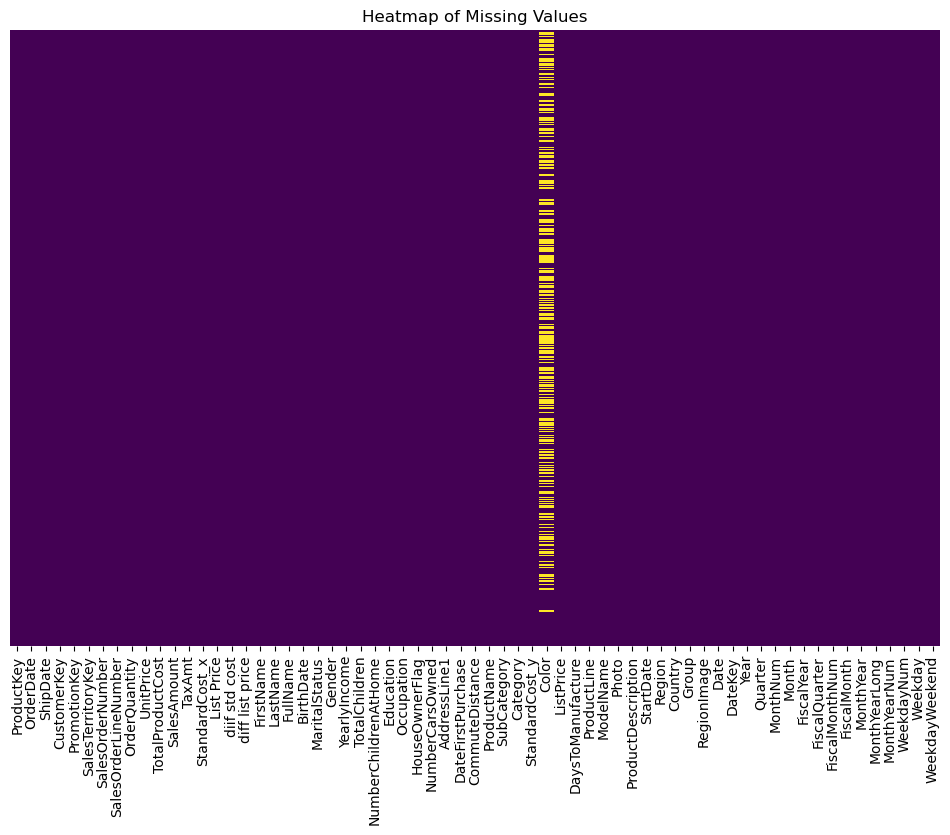

In [23]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(adventure_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

### Interpretation:
The heatmap shows that most columns in the dataset have no missing values, indicated by the solid purple color. However, the `Color` column stands out with many missing values, represented by the yellow lines. This suggests that the `Color` column requires attention for data cleaning or imputation. Other columns appear to be complete and do not require further handling for missing data.

In [24]:
# Fill missing values in the 'Color' column with a placeholder (e.g., 'Unknown')
adventure_data['Color'].fillna('Unknown', inplace=True)

# Verify the changes
print(adventure_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

### Inspect Current Data Types

In [25]:
# Display current data types
print("Current Data Types:")
print(adventure_data.dtypes)

Current Data Types:
ProductKey                 int64
OrderDate         datetime64[ns]
ShipDate          datetime64[ns]
CustomerKey                int64
PromotionKey               int64
                       ...      
MonthYearLong             object
MonthYearNum               int64
WeekdayNum                 int64
Weekday                   object
WeekdayWeekend            object
Length: 65, dtype: object


In [26]:
# Save the DataFrame to a CSV file in the same directory as the Jupyter Notebook
adventure_data.to_csv('adventure_data.csv', index=False)

# Verify the file creation
print("CSV file created successfully in the current directory.")

CSV file created successfully in the current directory.


## Data Cleaning with budget data

In [27]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AdventureWorks Budget Data  24 non-null     object
 1   Unnamed: 1                  18 non-null     object
 2   Unnamed: 2                  18 non-null     object
 3   Unnamed: 3                  18 non-null     object
 4   Unnamed: 4                  22 non-null     object
 5   Unnamed: 5                  22 non-null     object
 6   Unnamed: 6                  22 non-null     object
 7   Unnamed: 7                  22 non-null     object
 8   Unnamed: 8                  22 non-null     object
 9   Unnamed: 9                  22 non-null     object
 10  Unnamed: 10                 22 non-null     object
 11  Unnamed: 11                 22 non-null     object
 12  Unnamed: 12                 22 non-null     object
 13  Unnamed: 13                 22 non-null     object
 

In [28]:
# Display the first few rows to verify the structure
print(budget_df.head())

    AdventureWorks Budget Data   Unnamed: 1              Unnamed: 2  \
0    Prepared By: Johnny Bunko          NaN                     NaN   
1  AdventureWorks Confidential          NaN                     NaN   
2                     Category  Subcategory             ProductName   
3                  Accessories   Bike Racks     Hitch Rack - 4-Bike   
4                  Accessories  Bike Stands  All-Purpose Bike Stand   

   Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2  ProductKey  Jan, 2016  Feb, 2016  Mar, 2016  Apr, 2016  May, 2016   
3         483       1131       2635       4134       2179       2637   
4         486        666       3695       2868       4862       3439   

  Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0        NaN         NaN         NaN         NaN         NaN    

In [29]:
# Print the number of columns in the DataFrame
print(f"Number of columns in DataFrame: {len(budget_df.columns)}")

Number of columns in DataFrame: 17


In [30]:
# Adjust the column names list to match the number of columns in the DataFrame
column_names = [
    'Category', 'Subcategory', 'ProductName', 'Jan_2016', 'Feb_2016', 'Mar_2016', 'Apr_2016', 
    'May_2016', 'Jun_2016', 'Jul_2016', 'Aug_2016', 'Sep_2016', 'Oct_2016', 'Nov_2016', 
    'Dec_2016', 'Total_2016', 'Extra_Column'
]


In [31]:
# Check if the number of column names matches the number of columns in the DataFrame
print(f"Number of column names provided: {len(column_names)}")

Number of column names provided: 17


In [32]:
# Assign the new column names to the DataFrame
budget_df.columns = column_names


In [33]:
# Display the first few rows to verify the changes
print(budget_df.head())

                      Category  Subcategory             ProductName  \
0    Prepared By: Johnny Bunko          NaN                     NaN   
1  AdventureWorks Confidential          NaN                     NaN   
2                     Category  Subcategory             ProductName   
3                  Accessories   Bike Racks     Hitch Rack - 4-Bike   
4                  Accessories  Bike Stands  All-Purpose Bike Stand   

     Jan_2016   Feb_2016   Mar_2016   Apr_2016   May_2016   Jun_2016  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2  ProductKey  Jan, 2016  Feb, 2016  Mar, 2016  Apr, 2016  May, 2016   
3         483       1131       2635       4134       2179       2637   
4         486        666       3695       2868       4862       3439   

    Jul_2016   Aug_2016   Sep_2016   Oct_2016   Nov_2016   Dec_2016  \
0        NaN        NaN        NaN        NaN        NaN        NaN  

In [34]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category      24 non-null     object
 1   Subcategory   18 non-null     object
 2   ProductName   18 non-null     object
 3   Jan_2016      18 non-null     object
 4   Feb_2016      22 non-null     object
 5   Mar_2016      22 non-null     object
 6   Apr_2016      22 non-null     object
 7   May_2016      22 non-null     object
 8   Jun_2016      22 non-null     object
 9   Jul_2016      22 non-null     object
 10  Aug_2016      22 non-null     object
 11  Sep_2016      22 non-null     object
 12  Oct_2016      22 non-null     object
 13  Nov_2016      22 non-null     object
 14  Dec_2016      22 non-null     object
 15  Total_2016    22 non-null     object
 16  Extra_Column  22 non-null     object
dtypes: object(17)
memory usage: 3.3+ KB


In [35]:
budget_df.head(40)

Category        Subcategory  \
0     Prepared By: Johnny Bunko                NaN   
1   AdventureWorks Confidential                NaN   
2                      Category        Subcategory   
3                   Accessories         Bike Racks   
4                   Accessories        Bike Stands   
5                   Accessories  Bottles and Cages   
6                   Accessories           Cleaners   
7                   Accessories            Fenders   
8                   Accessories            Helmets   
9                   Accessories    Hydration Packs   
10                  Accessories    Tires and Tubes   
11         SubTotal Accessories                NaN   
12                        Bikes     Mountain Bikes   
13                        Bikes         Road Bikes   
14                        Bikes      Touring Bikes   
15               SubTotal Bikes                NaN   
16                     Clothing               Caps   
17                     Clothing             Gloves   
18                     Clothing            Jerseys   
19                     Clothing             Shorts   
20                     Clothing              Socks   
21                     Clothing              Vests   
22            SubTotal Clothing                NaN   
23                  Grand Total                NaN   

                   ProductName    Jan_2016   Feb_2016   Mar_2016   Apr_2016  \
0                          NaN         NaN        NaN        NaN        NaN   
1                          NaN         NaN        NaN        NaN        NaN   
2                  ProductName  ProductKey  Jan, 2016  Feb, 2016  Mar, 2016   
3          Hitch Rack - 4-Bike         483       1131       2635       4134   
4       All-Purpose Bike Stand         486        666       3695       2868   
5        Water Bottle - 30 oz.         477       1892       4727       3656   
6        Bike Wash - Dissolver         484        160        713        555   
7        Fender Set - Mountain         485        970       3014       2809   
8        Sport-100 Helmet, Red         212       5317      16221      16752   
9      Hydration Pack - 70 oz.         487        809       2684       2917   
10         Patch Kit/8 Patches         480       3554      18758      20905   
11                         NaN         NaN      14499      52447      54596   
12     Mountain-100 Silver, 38         344     370105     326786     384811   
13            Road-150 Red, 62         310     346295     289524     355097   
14       Touring-2000 Blue, 60         560     133631     165941     178287   
15                         NaN         NaN     850031     782251     918195   
16                AWC Logo Cap         223        479       1695       1462   
17       Half-Finger Gloves, S         462        598       2474       2957   
18  Long-Sleeve Logo Jersey, S         226       4087      11508      12872   
19      Men's Sports Shorts, S         445        421       5723       7301   
20      Mountain Bike Socks, M         218         24        244        432   
21             Classic Vest, S         471        980       2008       1980   
22                         NaN         NaN       6589      23652      27004   
23                         NaN         NaN     871119     858350     999795   

     May_2016   Jun_2016   Jul_2016   Aug_2016   Sep_2016   Oct_2016  \
0         NaN        NaN        NaN        NaN        NaN        NaN   
1         NaN        NaN        NaN        NaN        NaN        NaN   
2   Apr, 2016  May, 2016  Jun, 2016  Jul, 2016  Aug, 2016  Sep, 2016   
3        2179       2637       3279       2218       3287       3885   
4        4862       3439       4612       2774       3003       2401   
5        4449       4051       6257       4871       5231       5461   
6         656        369        582        777        777        239   
7        4259       3638       3721       4190       3618       3975   
8       16552      17204      25354      17584  

In [36]:
# Drop the first 3 rows from the DataFrame
budget_df = budget_df.drop(index=[0, 1, 2])

# Reset the index after dropping rows
budget_df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the changes after dropping rows
print("After dropping rows:")
print(budget_df.head())

After dropping rows:
      Category        Subcategory             ProductName Jan_2016 Feb_2016  \
0  Accessories         Bike Racks     Hitch Rack - 4-Bike      483     1131   
1  Accessories        Bike Stands  All-Purpose Bike Stand      486      666   
2  Accessories  Bottles and Cages   Water Bottle - 30 oz.      477     1892   
3  Accessories           Cleaners   Bike Wash - Dissolver      484      160   
4  Accessories            Fenders   Fender Set - Mountain      485      970   

  Mar_2016 Apr_2016 May_2016 Jun_2016 Jul_2016 Aug_2016 Sep_2016 Oct_2016  \
0     2635     4134     2179     2637     3279     2218     3287     3885   
1     3695     2868     4862     3439     4612     2774     3003     2401   
2     4727     3656     4449     4051     6257     4871     5231     5461   
3      713      555      656      369      582      777      777      239   
4     3014     2809     4259     3638     3721     4190     3618     3975   

  Nov_2016 Dec_2016 Total_2016 Extra_Colu

In [37]:
budget_df.head(20)

Category        Subcategory                 ProductName  \
0            Accessories         Bike Racks         Hitch Rack - 4-Bike   
1            Accessories        Bike Stands      All-Purpose Bike Stand   
2            Accessories  Bottles and Cages       Water Bottle - 30 oz.   
3            Accessories           Cleaners       Bike Wash - Dissolver   
4            Accessories            Fenders       Fender Set - Mountain   
5            Accessories            Helmets       Sport-100 Helmet, Red   
6            Accessories    Hydration Packs     Hydration Pack - 70 oz.   
7            Accessories    Tires and Tubes         Patch Kit/8 Patches   
8   SubTotal Accessories                NaN                         NaN   
9                  Bikes     Mountain Bikes     Mountain-100 Silver, 38   
10                 Bikes         Road Bikes            Road-150 Red, 62   
11                 Bikes      Touring Bikes       Touring-2000 Blue, 60   
12        SubTotal Bikes                NaN                         NaN   
13              Clothing               Caps                AWC Logo Cap   
14              Clothing             Gloves       Half-Finger Gloves, S   
15              Clothing            Jerseys  Long-Sleeve Logo Jersey, S   
16              Clothing             Shorts      Men's Sports Shorts, S   
17              Clothing              Socks      Mountain Bike Socks, M   
18              Clothing              Vests             Classic Vest, S   
19     SubTotal Clothing                NaN                         NaN   

   Jan_2016 Feb_2016 Mar_2016 Apr_2016 May_2016 Jun_2016 Jul_2016 Aug_2016  \
0       483     1131     2635     4134     2179     2637     3279     2218   
1       486      666     3695     2868     4862     3439     4612     2774   
2       477     1892     4727     3656     4449     4051     6257     4871   
3       484      160      713      555      656      369      582      777   
4       485      970     3014     2809     4259     3638     3721     4190   
5       212     5317    16221    16752    16552    17204    25354    17584   
6       487      809     2684     2917     3425     2716     3260     3773   
7       480     3554    18758    20905    18046    21680    22456    23995   
8       NaN    14499    52447    54596    54428    55734    69521    60182   
9       344   370105   326786   384811   439822   458523   619456   524348   
10      310   346295   289524   355097   346783   399691   546092   441037   
11      560   133631   165941   178287   265901   286630   445270   299106   
12      NaN   850031   782251   918195  1052506  1144844  1610818  1264491   
13      223      479     1695     1462     1079     1729     2180     1588   
14      462      598     2474     2957     2705     2819     2966     2975   
15      226     4087    11508    12872    11809    12789    18153    16846   
16      445      421     5723     7301     6335     5288     6829     4617   
17      218       24      244      432      547      385      372      839   
18      471      980     2008     1980     2312     2763     2591     3379   
19      NaN     6589    23652    27004    24787    25773    33091    30244   

   Sep_2016 Oct_2016 Nov_2016 Dec_2016 Total_2016 Extra_Column  
0      3287     3885     2484     5441       3551        36861  
1      3003     2401     4413     3881       2143        38757  
2      5231     5461     5529     5220       6025        57369  
3       777      239      496      686        455         6465  
4      3618     3975     3892     4740       4844        43670  
5     20409    18268    20567    25571      22106       221905  
6      3523     4252     3111     4985       4348        39803  
7     22922    20950    21905    24019      23587       242777  
8     62770    59431    62397    74543      67059       687607  
9    647048   557368   615032   802831     788234      6534364  
10   432400   468572   483913   558232     590261      5257897  
11   407069   391580 

In [38]:
# Now drop rows with index 8, 12, and 19
budget_df = budget_df.drop(index=[8, 12, 19])

# Reset the index after dropping the specific rows
budget_df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the changes
print(budget_df.head(20))  

       Category        Subcategory                 ProductName Jan_2016  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike      483   
1   Accessories        Bike Stands      All-Purpose Bike Stand      486   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.      477   
3   Accessories           Cleaners       Bike Wash - Dissolver      484   
4   Accessories            Fenders       Fender Set - Mountain      485   
5   Accessories            Helmets       Sport-100 Helmet, Red      212   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.      487   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches      480   
8         Bikes     Mountain Bikes     Mountain-100 Silver, 38      344   
9         Bikes         Road Bikes            Road-150 Red, 62      310   
10        Bikes      Touring Bikes       Touring-2000 Blue, 60      560   
11     Clothing               Caps                AWC Logo Cap      223   
12     Clothing          

In [39]:
budget_df.head(20)

Category        Subcategory                 ProductName Jan_2016  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike      483   
1   Accessories        Bike Stands      All-Purpose Bike Stand      486   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.      477   
3   Accessories           Cleaners       Bike Wash - Dissolver      484   
4   Accessories            Fenders       Fender Set - Mountain      485   
5   Accessories            Helmets       Sport-100 Helmet, Red      212   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.      487   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches      480   
8         Bikes     Mountain Bikes     Mountain-100 Silver, 38      344   
9         Bikes         Road Bikes            Road-150 Red, 62      310   
10        Bikes      Touring Bikes       Touring-2000 Blue, 60      560   
11     Clothing               Caps                AWC Logo Cap      223   
12     Clothing             Gloves       Half-Finger Gloves, S      462   
13     Clothing            Jerseys  Long-Sleeve Logo Jersey, S      226   
14     Clothing             Shorts      Men's Sports Shorts, S      445   
15     Clothing              Socks      Mountain Bike Socks, M      218   
16     Clothing              Vests             Classic Vest, S      471   
17  Grand Total                NaN                         NaN      NaN   

   Feb_2016 Mar_2016 Apr_2016 May_2016 Jun_2016 Jul_2016 Aug_2016 Sep_2016  \
0      1131     2635     4134     2179     2637     3279     2218     3287   
1       666     3695     2868     4862     3439     4612     2774     3003   
2      1892     4727     3656     4449     4051     6257     4871     5231   
3       160      713      555      656      369      582      777      777   
4       970     3014     2809     4259     3638     3721     4190     3618   
5      5317    16221    16752    16552    17204    25354    17584    20409   
6       809     2684     2917     3425     2716     3260     3773     3523   
7      3554    18758    20905    18046    21680    22456    23995    22922   
8    370105   326786   384811   439822   458523   619456   524348   647048   
9    346295   289524   355097   346783   399691   546092   441037   432400   
10   133631   165941   178287   265901   286630   445270   299106   407069   
11      479     1695     1462     1079     1729     2180     1588     2065   
12      598     2474     2957     2705     2819     2966     2975     3264   
13     4087    11508    12872    11809    12789    18153    16846    13497   
14      421     5723     7301     6335     5288     6829     4617     5384   
15       24      244      432      547      385      372      839      487   
16      980     2008     1980     2312     2763     2591     3379     3580   
17   871119   858350   999795  1131721  1226351  1713430  1354917  1577564   

   Oct_2016 Nov_2016 Dec_2016 Total_2016 Extra_Column  
0      3885     2484     5441       3551        36861  
1      2401     4413     3881       2143        38757  
2      5461     5529     5220       6025        57369  
3       239      496      686        455         6465  
4      3975     3892     4740       4844        43670  
5     18268    20567    25571      22106       221905  
6      4252     3111     4985       4348        39803  
7     20950    21905    24019      23587       242777  
8    557368   615032   802831     788234      6534364  
9    468572   483913   558232     590261      5257897  
10   391580   481316   506411     494823      4055965  
11     2013     2138     1830       2113        20371  
12     2424     3181     3518       4084        33965  
13    15988    15920    17426      20043       170938  
14     6277     6337     6300       7641        68453  
15      425      335      660        699         5449  
16     3600     4248     3685       3439        34565  
17  1507678  1674817  1975436    1978396     16869574

In [40]:
# Now drop row with index 17
budget_df = budget_df.drop(index=[17])

# Reset the index after dropping the specific row
budget_df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the changes
print(budget_df.head(20))

       Category        Subcategory                 ProductName Jan_2016  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike      483   
1   Accessories        Bike Stands      All-Purpose Bike Stand      486   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.      477   
3   Accessories           Cleaners       Bike Wash - Dissolver      484   
4   Accessories            Fenders       Fender Set - Mountain      485   
5   Accessories            Helmets       Sport-100 Helmet, Red      212   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.      487   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches      480   
8         Bikes     Mountain Bikes     Mountain-100 Silver, 38      344   
9         Bikes         Road Bikes            Road-150 Red, 62      310   
10        Bikes      Touring Bikes       Touring-2000 Blue, 60      560   
11     Clothing               Caps                AWC Logo Cap      223   
12     Clothing          

In [41]:
budget_df.head(20)

Category        Subcategory                 ProductName Jan_2016  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike      483   
1   Accessories        Bike Stands      All-Purpose Bike Stand      486   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.      477   
3   Accessories           Cleaners       Bike Wash - Dissolver      484   
4   Accessories            Fenders       Fender Set - Mountain      485   
5   Accessories            Helmets       Sport-100 Helmet, Red      212   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.      487   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches      480   
8         Bikes     Mountain Bikes     Mountain-100 Silver, 38      344   
9         Bikes         Road Bikes            Road-150 Red, 62      310   
10        Bikes      Touring Bikes       Touring-2000 Blue, 60      560   
11     Clothing               Caps                AWC Logo Cap      223   
12     Clothing             Gloves       Half-Finger Gloves, S      462   
13     Clothing            Jerseys  Long-Sleeve Logo Jersey, S      226   
14     Clothing             Shorts      Men's Sports Shorts, S      445   
15     Clothing              Socks      Mountain Bike Socks, M      218   
16     Clothing              Vests             Classic Vest, S      471   

   Feb_2016 Mar_2016 Apr_2016 May_2016 Jun_2016 Jul_2016 Aug_2016 Sep_2016  \
0      1131     2635     4134     2179     2637     3279     2218     3287   
1       666     3695     2868     4862     3439     4612     2774     3003   
2      1892     4727     3656     4449     4051     6257     4871     5231   
3       160      713      555      656      369      582      777      777   
4       970     3014     2809     4259     3638     3721     4190     3618   
5      5317    16221    16752    16552    17204    25354    17584    20409   
6       809     2684     2917     3425     2716     3260     3773     3523   
7      3554    18758    20905    18046    21680    22456    23995    22922   
8    370105   326786   384811   439822   458523   619456   524348   647048   
9    346295   289524   355097   346783   399691   546092   441037   432400   
10   133631   165941   178287   265901   286630   445270   299106   407069   
11      479     1695     1462     1079     1729     2180     1588     2065   
12      598     2474     2957     2705     2819     2966     2975     3264   
13     4087    11508    12872    11809    12789    18153    16846    13497   
14      421     5723     7301     6335     5288     6829     4617     5384   
15       24      244      432      547      385      372      839      487   
16      980     2008     1980     2312     2763     2591     3379     3580   

   Oct_2016 Nov_2016 Dec_2016 Total_2016 Extra_Column  
0      3885     2484     5441       3551        36861  
1      2401     4413     3881       2143        38757  
2      5461     5529     5220       6025        57369  
3       239      496      686        455         6465  
4      3975     3892     4740       4844        43670  
5     18268    20567    25571      22106       221905  
6      4252     3111     4985       4348        39803  
7     20950    21905    24019      23587       242777  
8    557368   615032   802831     788234      6534364  
9    468572   483913   558232     590261      5257897  
10   391580   481316   506411     494823      4055965  
11     2013     2138     1830       2113        20371  
12     2424     3181     3518       4084        33965  
13    15988    15920    17426      20043       170938  
14     6277     6337     6300       7641        68453  
15      425      335      660        699         5449  
16     3600     4248     3685       3439        34565

In [42]:
# Rename the column 'Extra_Column' to 'Grand_Total'
budget_df.rename(columns={'Extra_Column': 'Grand_Total'}, inplace=True)


In [43]:
budget_df.head(20)

Category        Subcategory                 ProductName Jan_2016  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike      483   
1   Accessories        Bike Stands      All-Purpose Bike Stand      486   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.      477   
3   Accessories           Cleaners       Bike Wash - Dissolver      484   
4   Accessories            Fenders       Fender Set - Mountain      485   
5   Accessories            Helmets       Sport-100 Helmet, Red      212   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.      487   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches      480   
8         Bikes     Mountain Bikes     Mountain-100 Silver, 38      344   
9         Bikes         Road Bikes            Road-150 Red, 62      310   
10        Bikes      Touring Bikes       Touring-2000 Blue, 60      560   
11     Clothing               Caps                AWC Logo Cap      223   
12     Clothing             Gloves       Half-Finger Gloves, S      462   
13     Clothing            Jerseys  Long-Sleeve Logo Jersey, S      226   
14     Clothing             Shorts      Men's Sports Shorts, S      445   
15     Clothing              Socks      Mountain Bike Socks, M      218   
16     Clothing              Vests             Classic Vest, S      471   

   Feb_2016 Mar_2016 Apr_2016 May_2016 Jun_2016 Jul_2016 Aug_2016 Sep_2016  \
0      1131     2635     4134     2179     2637     3279     2218     3287   
1       666     3695     2868     4862     3439     4612     2774     3003   
2      1892     4727     3656     4449     4051     6257     4871     5231   
3       160      713      555      656      369      582      777      777   
4       970     3014     2809     4259     3638     3721     4190     3618   
5      5317    16221    16752    16552    17204    25354    17584    20409   
6       809     2684     2917     3425     2716     3260     3773     3523   
7      3554    18758    20905    18046    21680    22456    23995    22922   
8    370105   326786   384811   439822   458523   619456   524348   647048   
9    346295   289524   355097   346783   399691   546092   441037   432400   
10   133631   165941   178287   265901   286630   445270   299106   407069   
11      479     1695     1462     1079     1729     2180     1588     2065   
12      598     2474     2957     2705     2819     2966     2975     3264   
13     4087    11508    12872    11809    12789    18153    16846    13497   
14      421     5723     7301     6335     5288     6829     4617     5384   
15       24      244      432      547      385      372      839      487   
16      980     2008     1980     2312     2763     2591     3379     3580   

   Oct_2016 Nov_2016 Dec_2016 Total_2016 Grand_Total  
0      3885     2484     5441       3551       36861  
1      2401     4413     3881       2143       38757  
2      5461     5529     5220       6025       57369  
3       239      496      686        455        6465  
4      3975     3892     4740       4844       43670  
5     18268    20567    25571      22106      221905  
6      4252     3111     4985       4348       39803  
7     20950    21905    24019      23587      242777  
8    557368   615032   802831     788234     6534364  
9    468572   483913   558232     590261     5257897  
10   391580   481316   506411     494823     4055965  
11     2013     2138     1830       2113       20371  
12     2424     3181     3518       4084       33965  
13    15988    15920    17426      20043      170938  
14     6277     6337     6300       7641       68453  
15      425      335      660        699        5449  
16     3600     4248     3685       3439       34565

In [44]:
# Drop the 'Jan_2016' column
budget_df = budget_df.drop(columns=['Jan_2016'])

# Rename the columns to shift as described
budget_df.rename(columns={
    'Feb_2016': 'Jan_2016',
    'Mar_2016': 'Feb_2016',
    'Apr_2016': 'Mar_2016',
    'May_2016': 'Apr_2016',
    'Jun_2016': 'May_2016',
    'Jul_2016': 'Jun_2016',
    'Aug_2016': 'Jul_2016',
    'Sep_2016': 'Aug_2016',
    'Oct_2016': 'Sep_2016',
    'Nov_2016': 'Oct_2016',
    'Dec_2016': 'Nov_2016',
    'Total_2016': 'Dec_2016'
}, inplace=True)

In [45]:
budget_df.head(20)

Category        Subcategory                 ProductName Jan_2016  \
0   Accessories         Bike Racks         Hitch Rack - 4-Bike     1131   
1   Accessories        Bike Stands      All-Purpose Bike Stand      666   
2   Accessories  Bottles and Cages       Water Bottle - 30 oz.     1892   
3   Accessories           Cleaners       Bike Wash - Dissolver      160   
4   Accessories            Fenders       Fender Set - Mountain      970   
5   Accessories            Helmets       Sport-100 Helmet, Red     5317   
6   Accessories    Hydration Packs     Hydration Pack - 70 oz.      809   
7   Accessories    Tires and Tubes         Patch Kit/8 Patches     3554   
8         Bikes     Mountain Bikes     Mountain-100 Silver, 38   370105   
9         Bikes         Road Bikes            Road-150 Red, 62   346295   
10        Bikes      Touring Bikes       Touring-2000 Blue, 60   133631   
11     Clothing               Caps                AWC Logo Cap      479   
12     Clothing             Gloves       Half-Finger Gloves, S      598   
13     Clothing            Jerseys  Long-Sleeve Logo Jersey, S     4087   
14     Clothing             Shorts      Men's Sports Shorts, S      421   
15     Clothing              Socks      Mountain Bike Socks, M       24   
16     Clothing              Vests             Classic Vest, S      980   

   Feb_2016 Mar_2016 Apr_2016 May_2016 Jun_2016 Jul_2016 Aug_2016 Sep_2016  \
0      2635     4134     2179     2637     3279     2218     3287     3885   
1      3695     2868     4862     3439     4612     2774     3003     2401   
2      4727     3656     4449     4051     6257     4871     5231     5461   
3       713      555      656      369      582      777      777      239   
4      3014     2809     4259     3638     3721     4190     3618     3975   
5     16221    16752    16552    17204    25354    17584    20409    18268   
6      2684     2917     3425     2716     3260     3773     3523     4252   
7     18758    20905    18046    21680    22456    23995    22922    20950   
8    326786   384811   439822   458523   619456   524348   647048   557368   
9    289524   355097   346783   399691   546092   441037   432400   468572   
10   165941   178287   265901   286630   445270   299106   407069   391580   
11     1695     1462     1079     1729     2180     1588     2065     2013   
12     2474     2957     2705     2819     2966     2975     3264     2424   
13    11508    12872    11809    12789    18153    16846    13497    15988   
14     5723     7301     6335     5288     6829     4617     5384     6277   
15      244      432      547      385      372      839      487      425   
16     2008     1980     2312     2763     2591     3379     3580     3600   

   Oct_2016 Nov_2016 Dec_2016 Grand_Total  
0      2484     5441     3551       36861  
1      4413     3881     2143       38757  
2      5529     5220     6025       57369  
3       496      686      455        6465  
4      3892     4740     4844       43670  
5     20567    25571    22106      221905  
6      3111     4985     4348       39803  
7     21905    24019    23587      242777  
8    615032   802831   788234     6534364  
9    483913   558232   590261     5257897  
10   481316   506411   494823     4055965  
11     2138     1830     2113       20371  
12     3181     3518     4084       33965  
13    15920    17426    20043      170938  
14     6337     6300     7641       68453  
15      335      660      699        5449  
16     4248     3685     3439       34565

In [46]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     17 non-null     object
 1   Subcategory  17 non-null     object
 2   ProductName  17 non-null     object
 3   Jan_2016     17 non-null     object
 4   Feb_2016     17 non-null     object
 5   Mar_2016     17 non-null     object
 6   Apr_2016     17 non-null     object
 7   May_2016     17 non-null     object
 8   Jun_2016     17 non-null     object
 9   Jul_2016     17 non-null     object
 10  Aug_2016     17 non-null     object
 11  Sep_2016     17 non-null     object
 12  Oct_2016     17 non-null     object
 13  Nov_2016     17 non-null     object
 14  Dec_2016     17 non-null     object
 15  Grand_Total  17 non-null     object
dtypes: object(16)
memory usage: 2.2+ KB


In [47]:
# Convert columns to int, except for the first three columns
columns_to_convert = budget_df.columns[3:]  # Exclude the first three columns
budget_df[columns_to_convert] = budget_df[columns_to_convert].astype(int)

In [48]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Category     17 non-null     object
 1   Subcategory  17 non-null     object
 2   ProductName  17 non-null     object
 3   Jan_2016     17 non-null     int32 
 4   Feb_2016     17 non-null     int32 
 5   Mar_2016     17 non-null     int32 
 6   Apr_2016     17 non-null     int32 
 7   May_2016     17 non-null     int32 
 8   Jun_2016     17 non-null     int32 
 9   Jul_2016     17 non-null     int32 
 10  Aug_2016     17 non-null     int32 
 11  Sep_2016     17 non-null     int32 
 12  Oct_2016     17 non-null     int32 
 13  Nov_2016     17 non-null     int32 
 14  Dec_2016     17 non-null     int32 
 15  Grand_Total  17 non-null     int32 
dtypes: int32(13), object(3)
memory usage: 1.4+ KB


In [49]:
# Save the DataFrame to a CSV file in the same directory as the Jupyter Notebook
budget_df.to_csv('budget_data.csv', index=False)

# Verify the CSV file creation
print("CSV file created successfully in the current directory.")

CSV file created successfully in the current directory.


In [50]:
adventure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

### Dataset Description

The dataset appears to be from a sales and customer management system, likely representing detailed sales transactions, customer information, product details, and associated metadata. Here is a breakdown of the columns and their likely meanings:

1. **ProductKey** (`int64`): Unique identifier for each product.
2. **OrderDate** (`datetime64[ns]`): Date when the order was placed.
3. **ShipDate** (`datetime64[ns]`): Date when the order was shipped.
4. **CustomerKey** (`int64`): Unique identifier for each customer.
5. **PromotionKey** (`int64`): Identifier for the promotion applied to the order, if any.
6. **SalesTerritoryKey** (`int64`): Identifier for the sales territory.
7. **SalesOrderNumber** (`object`): Unique order number.
8. **SalesOrderLineNumber** (`int64`): Line number within the sales order, useful for orders with multiple items.
9. **OrderQuantity** (`int64`): Quantity of items ordered.
10. **UnitPrice** (`float64`): Price per unit of the product.
11. **TotalProductCost** (`float64`): Total cost of the product(s) in the order.
12. **SalesAmount** (`float64`): Total sales amount for the order.
13. **TaxAmt** (`float64`): Amount of tax applied to the order.
14. **StandardCost_x** (`float64`): Standard cost of the product (likely for comparison with actual cost).
15. **List Price** (`float64`): List price of the product.
16. **diif std cost** (`int64`): Difference between standard cost and actual cost.
17. **diff list price** (`int64`): Difference between list price and actual price.
18. **FirstName** (`object`): First name of the customer.
19. **LastName** (`object`): Last name of the customer.
20. **FullName** (`object`): Full name of the customer.
21. **BirthDate** (`datetime64[ns]`): Birthdate of the customer.
22. **MaritalStatus** (`object`): Marital status of the customer.
23. **Gender** (`object`): Gender of the customer.
24. **YearlyIncome** (`int64`): Yearly income of the customer.
25. **TotalChildren** (`int64`): Total number of children the customer has.
26. **NumberChildrenAtHome** (`int64`): Number of children living at home with the customer.
27. **Education** (`object`): Education level of the customer.
28. **Occupation** (`object`): Occupation of the customer.
29. **HouseOwnerFlag** (`int64`): Indicator if the customer owns a house.
30. **NumberCarsOwned** (`int64`): Number of cars owned by the customer.
31. **AddressLine1** (`object`): Address line 1 of the customer.
32. **DateFirstPurchase** (`datetime64[ns]`): Date of the customer's first purchase.
33. **CommuteDistance** (`object`): Distance the customer commutes.
34. **ProductName** (`object`): Name of the product.
35. **SubCategory** (`object`): Subcategory of the product.
36. **Category** (`object`): Category of the product.
37. **StandardCost_y** (`float64`): Standard cost of the product.
38. **Color** (`object`): Color of the product.
39. **ListPrice** (`float64`): List price of the product.
40. **DaysToManufacture** (`int64`): Number of days to manufacture the product.
41. **ProductLine** (`object`): Product line.
42. **ModelName** (`object`): Model name of the product.
43. **Photo** (`object`): Photo of the product (likely a URL or path).
44. **ProductDescription** (`object`): Description of the product.
45. **StartDate** (`datetime64[ns]`): Start date when the product became available.
46. **Region** (`object`): Sales region.
47. **Country** (`object`): Country.
48. **Group** (`object`): Sales group.
49. **RegionImage** (`object`): Image of the region (likely a URL or path).
50. **Date** (`datetime64[ns]`): Date related to the sales transaction.
51. **DateKey** (`int64`): Unique date key for joining with other tables.
52. **Year** (`int64`): Year of the sales transaction.
53. **Quarter** (`object`): Quarter of the year.
54. **MonthNum** (`int64`): Month number.
55. **Month** (`object`): Month name.
56. **FiscalYear** (`object`): Fiscal year.
57. **FiscalQuarter** (`object`): Fiscal quarter.
58. **FiscalMonthNum** (`int64`): Fiscal month number.
59. **FiscalMonth** (`object`): Fiscal month name.
60. **MonthYear** (`object`): Combination of month and year.
61. **MonthYearLong** (`object`): Detailed combination of month and year.
62. **MonthYearNum** (`int64`): Numeric representation of the combination of month and year.
63. **WeekdayNum** (`int64`): Weekday number.
64. **Weekday** (`object`): Name of the weekday.
65. **WeekdayWeekend** (`object`): Indicator

### Dataset Characteristics

- **Transactional Data**: Includes details about sales transactions, such as order dates, quantities, prices, and amounts.
- **Customer Data**: Contains customer information like names, birthdates, marital status, gender, income, and other demographic details.
- **Product Data**: Describes products, including their names, categories, subcategories, standard costs, and other attributes.
- **Sales Data**: Involves sales-specific information such as sales territory, promotion details, and sales amounts.
- **Time Data**: Contains multiple date-related columns that can be used for time series analysis, like order dates, ship dates, and fiscal dates.

# Exploratory Data Analysis

### Descriptive Statistics

In [51]:
# Display descriptive statistics for numerical columns
print(adventure_data.describe())


         ProductKey   CustomerKey  PromotionKey  SalesTerritoryKey  \
count  58189.000000  58189.000000  58189.000000       58189.000000   
mean     437.208304  18853.004640      1.043427           6.261716   
std      118.099746   5433.374315      0.348948           2.960248   
min      214.000000  11000.000000      1.000000           1.000000   
25%      358.000000  14012.000000      1.000000           4.000000   
50%      479.000000  18151.000000      1.000000           7.000000   
75%      529.000000  23450.000000      1.000000           9.000000   
max      606.000000  29483.000000     14.000000          10.000000   

       SalesOrderLineNumber  OrderQuantity     UnitPrice  TotalProductCost  \
count          58189.000000   58189.000000  58189.000000      58189.000000   
mean               1.887453       1.569386    413.888218        296.539185   
std                1.018829       1.047532    833.052938        560.171436   
min                1.000000       1.000000      0.572500 

### Interpretation

This descriptive statistics summary provides key insights into the `adventure_data` DataFrame. The average `SalesAmount` is approximately $503.67, with a high standard deviation indicating substantial variability in sales amounts. The dataset spans from 2014 to 2016, with consistent data points for product and customer keys. The average `OrderQuantity` is around 1.57, with most orders being of a single quantity. The `DaysToManufacture` mostly range from 0 to 4 days, indicating varying production times. The `ListPrice` and `StandardCost_y` also show a wide range, reflecting different product pricing and costs.

### Distribution of Sales Amount

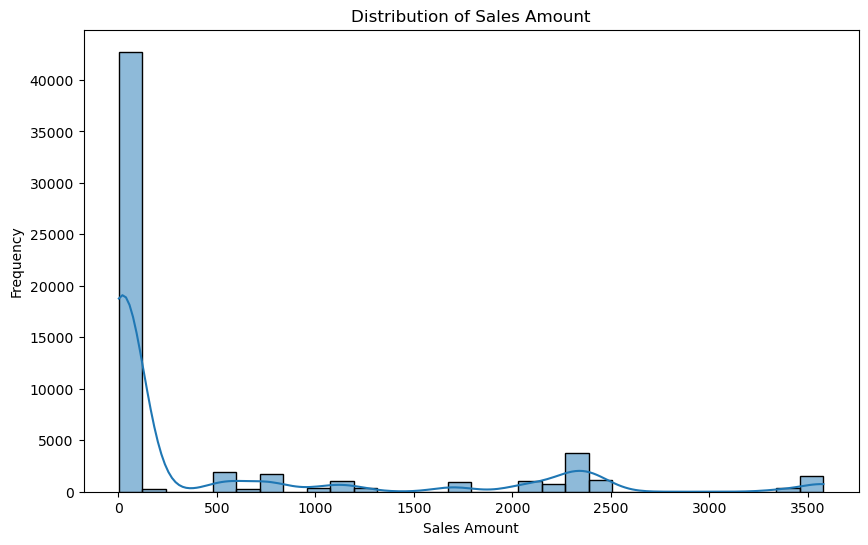

In [52]:
# Plot distribution of Sales Amount
plt.figure(figsize=(10, 6))
sns.histplot(adventure_data['SalesAmount'], bins=30, kde=True)
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

### Interpretation:
The distribution of the Sales Amount depicted in the histogram with a KDE overlay shows that the majority of sales amounts are clustered at the lower end of the scale. Most transactions have a sales amount under $500, with a significant peak at this low range. There are fewer transactions as the sales amount increases, indicating that high-value sales are less frequent. This right-skewed distribution suggests that the business deals with a large number of small transactions and fewer large transactions. The spikes at specific intervals, such as around $2500 and $3500, may indicate common price points for certain high-value products.

### Sales by Category

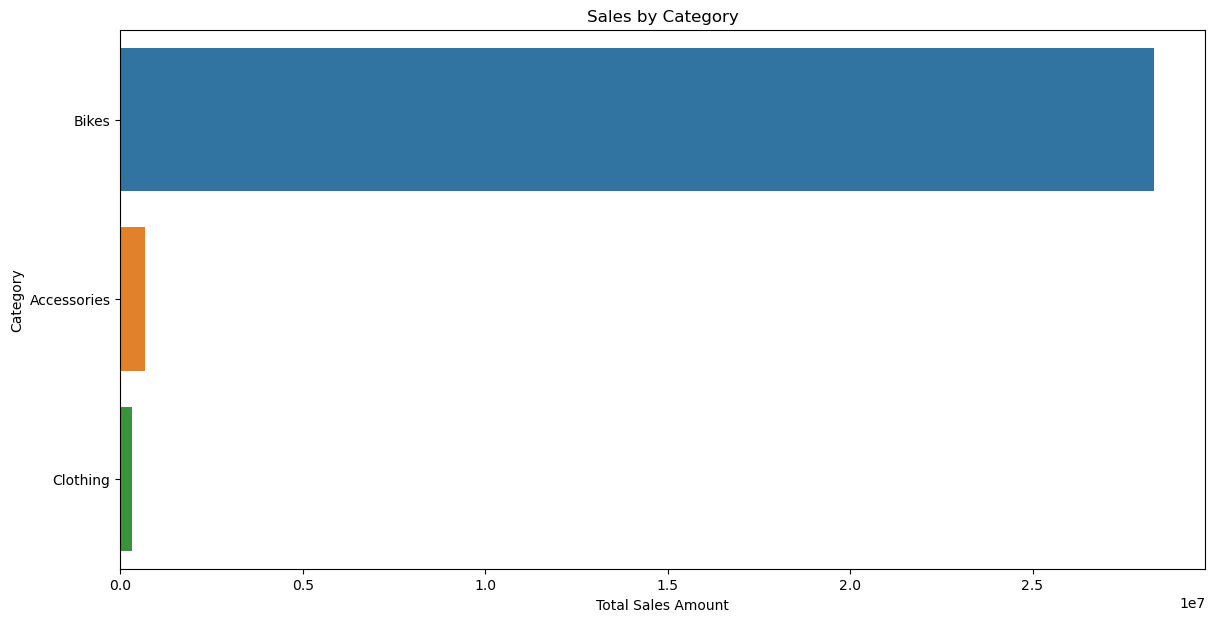

In [53]:
# Group by Category and calculate total sales
sales_by_category = adventure_data.groupby('Category')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot sales by category
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Category', data=sales_by_category)
plt.title('Sales by Category')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()


### Interpretation:
The bar chart for Sales by Category indicates that the majority of sales come from the "Bikes" category, which significantly outperforms the other categories. "Accessories" and "Clothing" contribute a much smaller portion of the total sales. This suggests that the company's primary revenue driver is its bike products, and there may be opportunities to enhance the sales of accessories and clothing either through marketing, bundling with bikes, or introducing new products within these categories. The dominance of bike sales highlights the importance of maintaining a strong product line and inventory in this category.

### Customer Demographics: Gender Distribution

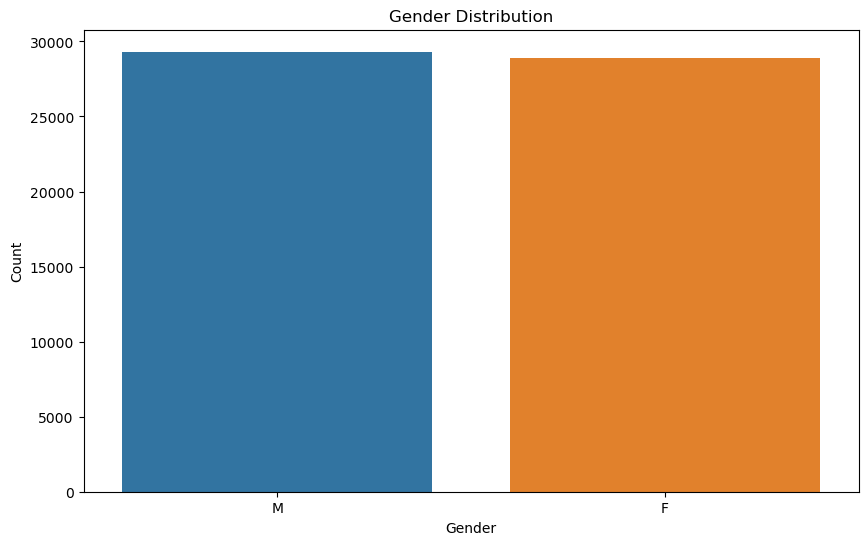

In [54]:
# Plot gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=adventure_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Interpretation:
The bar chart for Gender Distribution shows that the customer base is nearly evenly split between males (M) and females (F). Both genders have similar representation, with the count of male customers slightly higher than that of female customers. This indicates that the products appeal to both genders almost equally, suggesting that marketing efforts can be effectively targeted towards both male and female demographics to maximize reach and engagement.

### Analyze Sales Trends Over Time

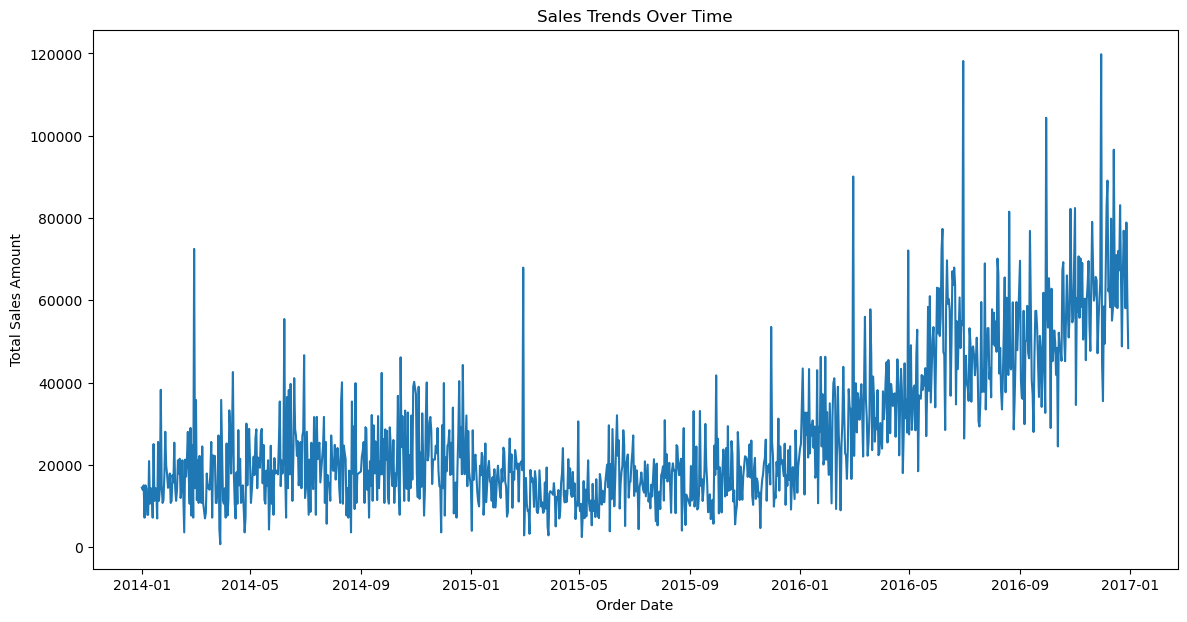

In [55]:
# Group by OrderDate and calculate total sales
sales_trend = adventure_data.groupby('OrderDate')['SalesAmount'].sum().reset_index()

# Plot sales trends over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='OrderDate', y='SalesAmount', data=sales_trend)
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales Amount')
plt.show()



### Interpretation:
The Sales Trends Over Time chart shows a clear upward trend in sales from 2014 to early 2017. Sales amounts increase significantly over time, particularly from mid-2015 onward. There are noticeable seasonal spikes, indicating periodic promotional events or seasonal trends. The data also shows high volatility with frequent peaks and troughs. The sharp growth towards the end of 2016 suggests successful campaigns or increased market demand.

### Identify Top-Selling Products and Categories

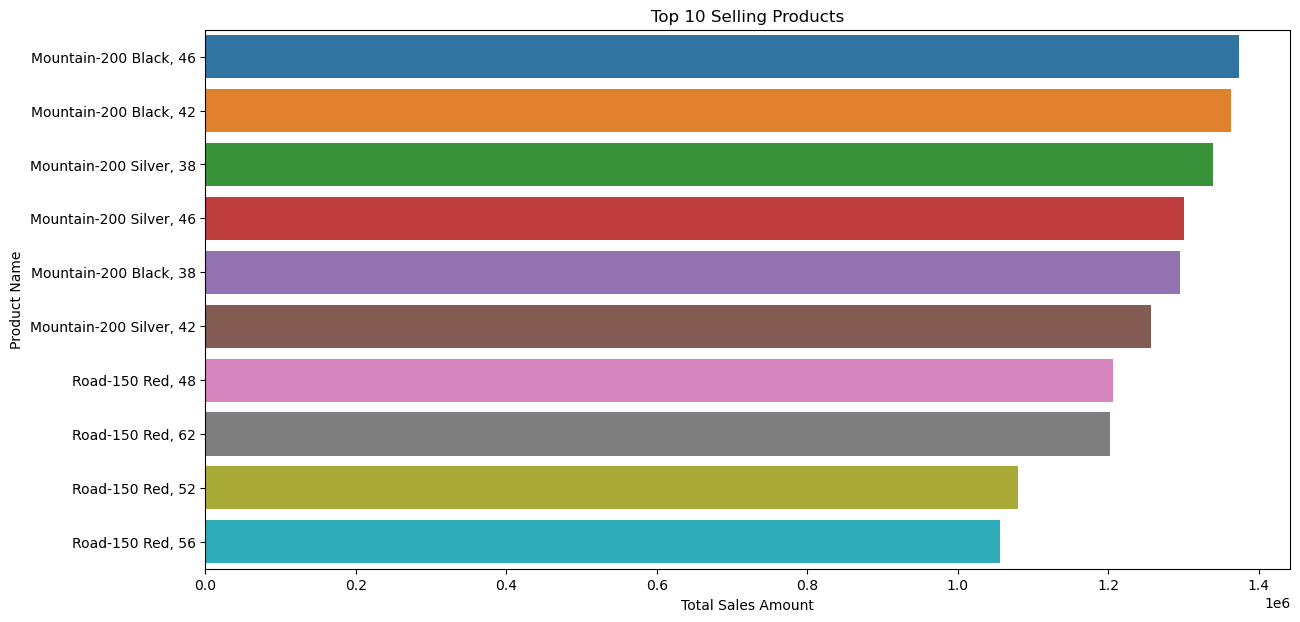

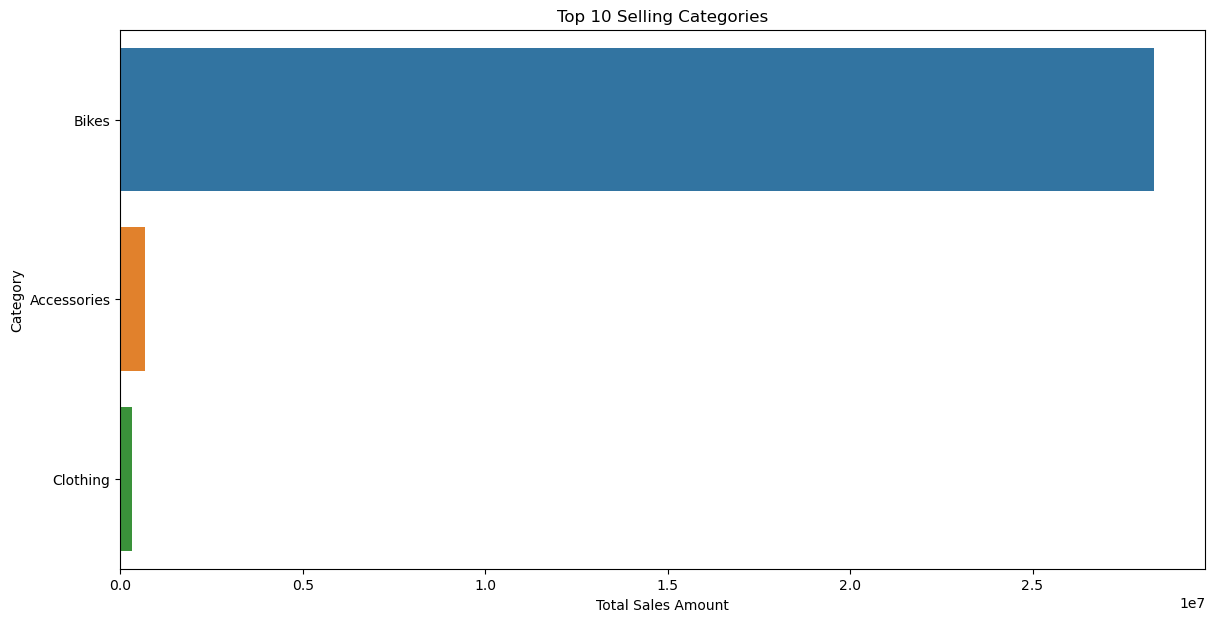

In [56]:
# Group by ProductName and calculate total sales
top_products = adventure_data.groupby('ProductName')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot top 10 selling products
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='ProductName', data=top_products.head(10))
plt.title('Top 10 Selling Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.show()

# Group by Category and calculate total sales
top_categories = adventure_data.groupby('Category')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot top 10 selling categories
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Category', data=top_categories.head(10))
plt.title('Top 10 Selling Categories')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()


### Interpretation:
The bar chart for the Top 10 Selling Products shows that "Mountain-200 Black, 46" is the highest-selling product, followed closely by other variants of "Mountain-200" and "Road-150". The "Mountain-200" series dominates the top ranks, indicating it is the most popular product line. The "Road-150" series also performs well, securing multiple spots in the top 10. This suggests that focusing on these popular product lines could be beneficial for driving sales.

The bar chart for the Top 10 Selling Categories shows that "Bikes" is the dominant category, significantly outperforming "Accessories" and "Clothing." This indicates that the majority of sales revenue comes from bikes, with accessories and clothing contributing much smaller portions. Focusing on the bikes category while exploring growth opportunities in accessories and clothing could be a strategic approach for increasing overall sales.

### Assess the Impact of Promotions on Sales

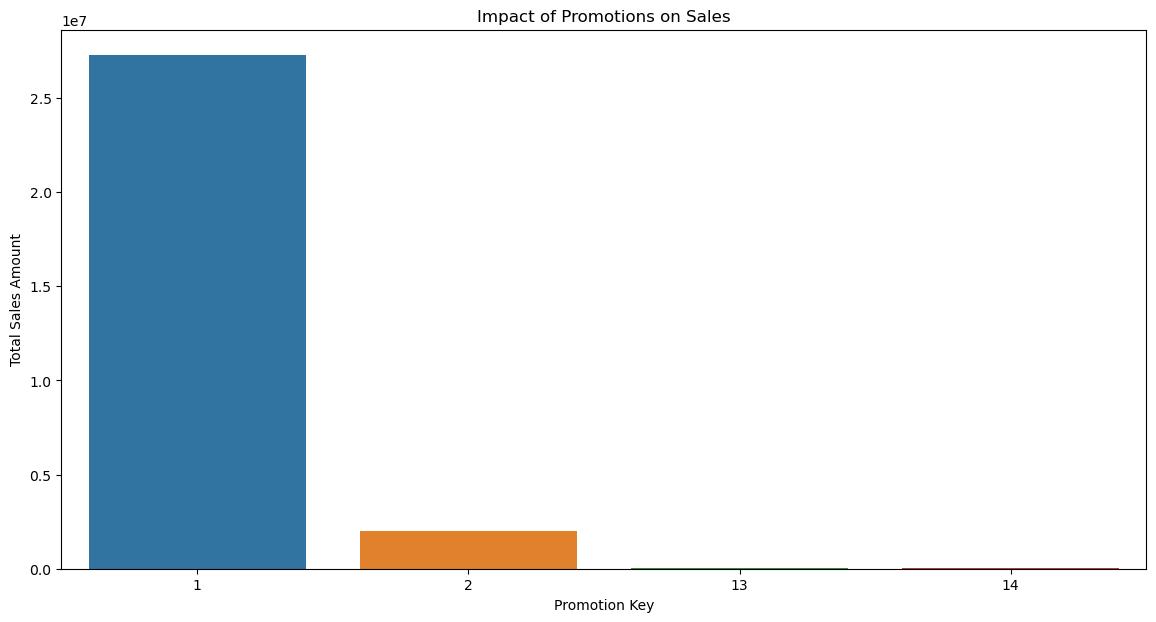

In [57]:
# Group by PromotionKey and calculate total sales
promotion_impact = adventure_data.groupby('PromotionKey')['SalesAmount'].sum().reset_index()

# Plot the impact of promotions on sales
plt.figure(figsize=(14, 7))
sns.barplot(x='PromotionKey', y='SalesAmount', data=promotion_impact)
plt.title('Impact of Promotions on Sales')
plt.xlabel('Promotion Key')
plt.ylabel('Total Sales Amount')
plt.show()


### Interpretation:
The bar chart for the Impact of Promotions on Sales shows that Promotion Key 1 has a significant impact on sales, generating the highest total sales amount by a large margin. Promotion Key 2 also contributes to sales but to a much lesser extent. Promotion Keys 13 and 14 have minimal impact on sales. This suggests that the promotion associated with Key 1 is highly effective, and there may be an opportunity to optimize or reconsider the other promotions for better performance.

### Segment Customers Based on Demographics and Purchasing Behavior

In [58]:
# Group by CustomerKey and calculate total sales and total order quantity
customer_segments = adventure_data.groupby('CustomerKey').agg({
    'SalesAmount': 'sum',
    'OrderQuantity': 'sum',
    'YearlyIncome': 'mean',
    'TotalChildren': 'mean',
    'NumberChildrenAtHome': 'mean',
    'Education': 'first',
    'Occupation': 'first',
    'HouseOwnerFlag': 'mean',
    'NumberCarsOwned': 'mean',
    'Gender': 'first',
    'CommuteDistance': 'first'
}).reset_index()

# Display the first few rows of customer segments
print(customer_segments.head())


   CustomerKey  SalesAmount  OrderQuantity  YearlyIncome  TotalChildren  \
0        11000      8248.99              9       90000.0            2.0   
1        11001      6383.88             17       60000.0            3.0   
2        11002      8114.04              4       60000.0            3.0   
3        11003      8139.29             10       70000.0            0.0   
4        11004      8196.01              8       80000.0            5.0   

   NumberChildrenAtHome  Education    Occupation  HouseOwnerFlag  \
0                   0.0  Bachelors  Professional             1.0   
1                   3.0  Bachelors  Professional             0.0   
2                   3.0  Bachelors  Professional             1.0   
3                   0.0  Bachelors  Professional             0.0   
4                   5.0  Bachelors  Professional             1.0   

   NumberCarsOwned Gender CommuteDistance  
0              0.0      M       1-2 Miles  
1              1.0      M       0-1 Miles  
2       

### Interpretation
This customer data provides insights into various customer demographics and purchasing behavior:

- **SalesAmount and OrderQuantity**: Customers have varying levels of total sales and order quantities, indicating different purchasing behaviors.
- **YearlyIncome**: Customers have diverse income levels, with values ranging from $60,000 to $90,000.
- **TotalChildren and NumberChildrenAtHome**: Customers have different family sizes, with some having children at home and others not.
- **Education and Occupation**: All customers listed have a bachelor's degree and are professionals, suggesting a highly educated and professional customer base.
- **HouseOwnerFlag and NumberCarsOwned**: Some customers own their homes and have multiple cars, indicating varying levels of affluence and mobility.
- **Gender and CommuteDistance**: The gender distribution includes both males and females, and the commute distances vary, reflecting different lifestyles and living situations.

### Identify High-Value Customers

In [59]:
# Define high-value customers as those with sales amount in the top 10%
high_value_threshold = customer_segments['SalesAmount'].quantile(0.90)
high_value_customers = customer_segments[customer_segments['SalesAmount'] > high_value_threshold]

# Display high-value customers
print(high_value_customers)


       CustomerKey  SalesAmount  OrderQuantity  YearlyIncome  TotalChildren  \
0            11000      8248.99              9       90000.0            2.0   
1            11001      6383.88             17       60000.0            3.0   
2            11002      8114.04              4       60000.0            3.0   
3            11003      8139.29             10       70000.0            0.0   
4            11004      8196.01              8       80000.0            5.0   
...            ...          ...            ...           ...            ...   
16740        28273      5962.34              2       90000.0            2.0   
16751        28285      5997.33              5      100000.0            3.0   
16754        28288      6039.30              7      110000.0            3.0   
16762        28296      5997.33              9       70000.0            3.0   
16763        28297      5971.33              6       70000.0            3.0   

       NumberChildrenAtHome        Education    Occ

### Interpretation: 
This customer dataset provides comprehensive insights into the demographics and purchasing behaviors of the customers:

- **SalesAmount and OrderQuantity**: There is a wide range of sales amounts and order quantities, indicating varying purchasing patterns among customers.
- **YearlyIncome**: Customers have diverse income levels, ranging from $60,000 to $110,000, reflecting a mix of middle to upper-middle-class individuals.
- **TotalChildren and NumberChildrenAtHome**: Customers have varying family sizes, with some having children living at home and others not, indicating different household compositions.
- **Education and Occupation**: The dataset includes customers with different education levels, ranging from high school to graduate degrees, predominantly in professional and management occupations.
- **HouseOwnerFlag and NumberCarsOwned**: Some customers own their homes and have multiple cars, indicating different levels of affluence and mobility.
- **Gender and CommuteDistance**: The gender distribution is fairly balanced, and customers have varied commute distances, ranging from 0-1 miles to over 10 miles, suggesting different living and working arrangements.

Overall, this dataset showcases a diverse customer base with varying socioeconomic statuses, education levels, and family compositions, providing valuable insights for targeted marketing and customer segmentation.

### Visualize Customer Segments

### Education Level Distribution

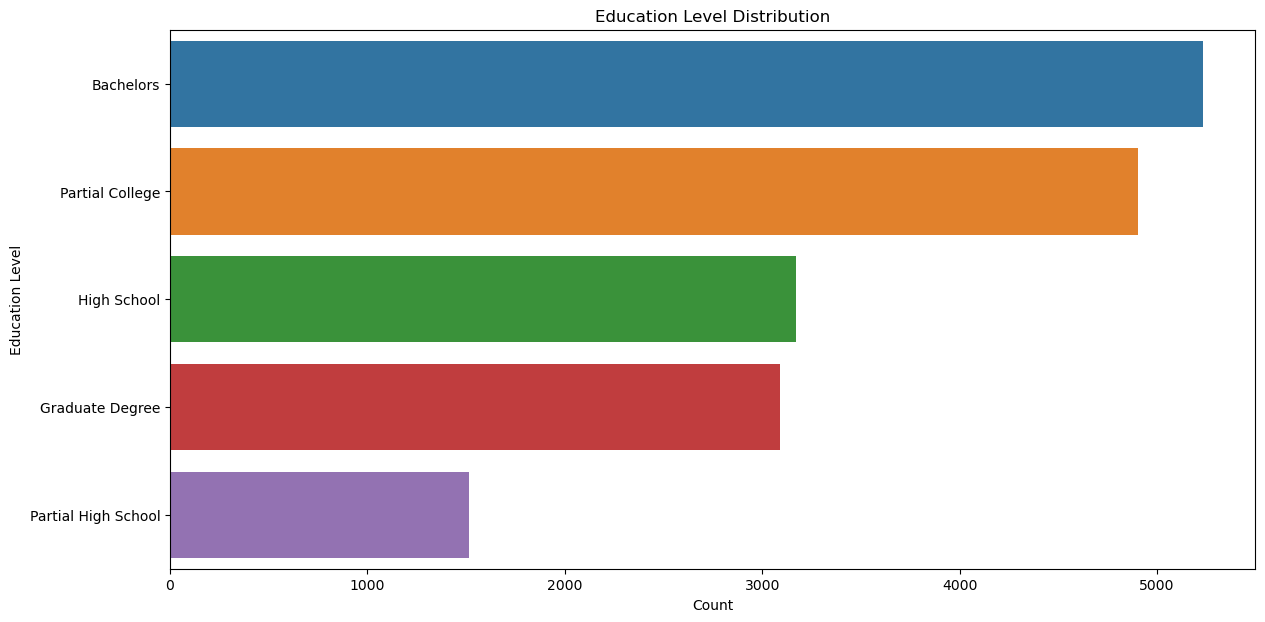

In [60]:
# Plot education level distribution
plt.figure(figsize=(14, 7))
sns.countplot(y='Education', data=customer_segments, order=customer_segments['Education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()


### Interpretation:
The bar chart for Education Level Distribution shows that the majority of customers hold a Bachelor's degree, followed by those with partial college education. High School and Graduate Degree holders are also well-represented, while customers with only partial high school education form the smallest group. This suggests that the customer base is predominantly well-educated, with a significant portion having completed higher education.

### Income Distribution

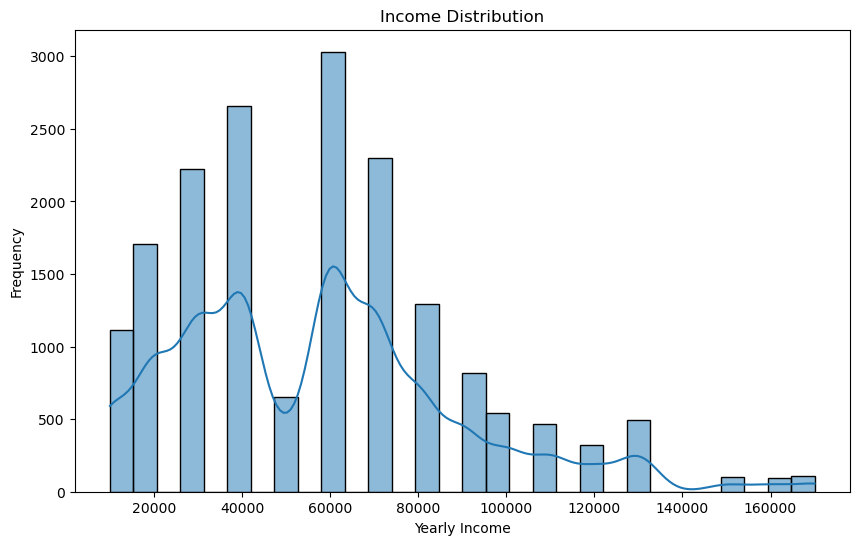

In [61]:
# Plot income distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_segments['YearlyIncome'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.show()


### Interpretation:
The Income Distribution histogram shows that most customers have yearly incomes between $20,000 and $80,000, with the peak frequency around $60,000. There are fewer customers with incomes above $100,000, indicating a smaller affluent segment. The distribution is right-skewed, suggesting that while the majority earn moderate incomes, there are some higher earners in the dataset. This highlights a diverse income range within the customer base.

### High-Value Customers by Occupation

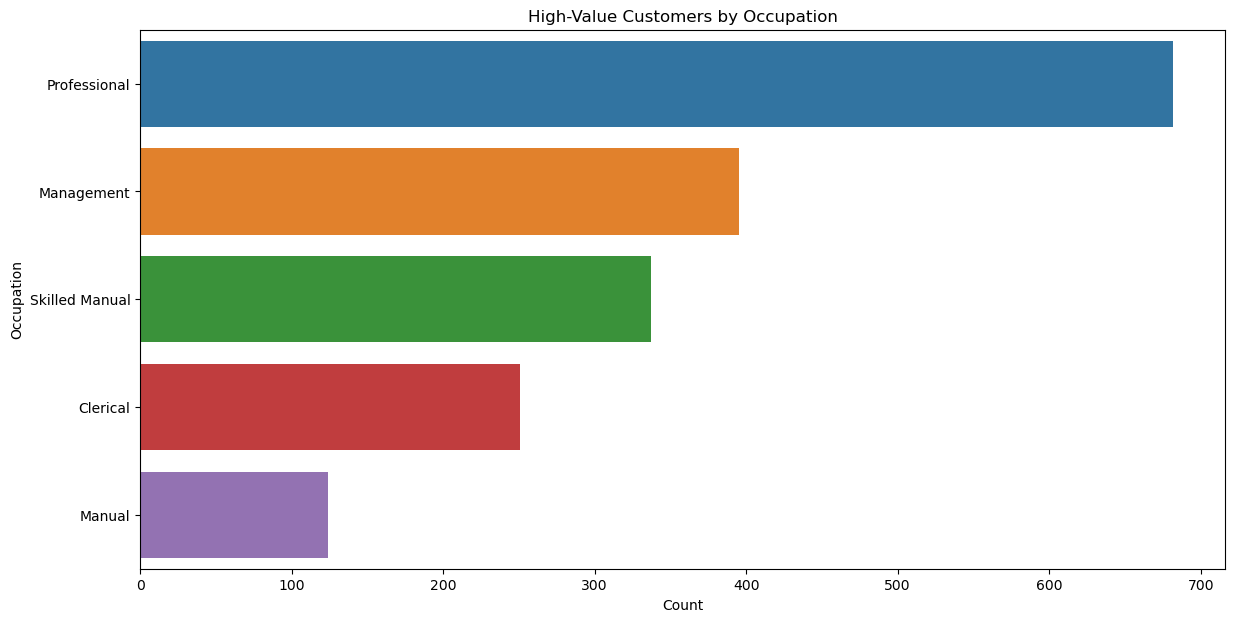

In [62]:
# Plot high-value customers by occupation
plt.figure(figsize=(14, 7))
sns.countplot(y='Occupation', data=high_value_customers, order=high_value_customers['Occupation'].value_counts().index)
plt.title('High-Value Customers by Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

### Interpretation:
The bar chart for High-Value Customers by Occupation shows that the majority of high-value customers are professionals, followed by those in management and skilled manual jobs. Clerical and manual workers represent a smaller portion of high-value customers. This indicates that professional and management occupations are more likely to have high-value customers, possibly due to higher income levels and spending capacity in these occupations.

### Evaluate Product Performance Based on Sales and Profitability

In [63]:
# Group by ProductName and calculate total sales and total product cost
product_performance = adventure_data.groupby('ProductName').agg({
    'SalesAmount': 'sum',
    'TotalProductCost': 'sum',
    'OrderQuantity': 'sum',
    'StandardCost_y': 'mean'
}).reset_index()

# Calculate profitability as the difference between SalesAmount and TotalProductCost
product_performance['Profitability'] = product_performance['SalesAmount'] - product_performance['TotalProductCost']

# Display the first few rows of product performance
print(product_performance.head())


              ProductName  SalesAmount  TotalProductCost  OrderQuantity  \
0            AWC Logo Cap     18834.05        14502.2185           3178   
1  All-Purpose Bike Stand     37842.00        14152.9080            394   
2   Bike Wash - Dissolver      6868.80         2568.9312           1381   
3         Classic Vest, L     11684.00         4369.8160            273   
4         Classic Vest, M     11747.50         4393.5650            301   

   StandardCost_y  Profitability  
0          6.9223      4331.8315  
1         59.4660     23689.0920  
2          2.9733      4299.8688  
3         23.7490      7314.1840  
4         23.7490      7353.9350  


### Interpretation:
This product data provides insights into sales performance and profitability:

- **SalesAmount**: Indicates the total revenue generated by each product, with "All-Purpose Bike Stand" having the highest sales amount.
- **TotalProductCost**: Shows the total cost incurred to produce the sold quantity, with "All-Purpose Bike Stand" again having the highest cost.
- **OrderQuantity**: Reflects the number of units sold, with "AWC Logo Cap" having the highest quantity sold.
- **StandardCost_y**: Represents the unit cost of production for each product.
- **Profitability**: Shows the profit generated after subtracting the total product cost from the sales amount. "All-Purpose Bike Stand" is the most profitable product in this dataset.

Overall, the "All-Purpose Bike Stand" stands out as both the highest-grossing and most profitable product, while "AWC Logo Cap" has the highest sales volume.

### Analyze Manufacturing Timelines and Costs

In [64]:
# Group by ProductName and calculate average days to manufacture and average standard cost
manufacturing_analysis = adventure_data.groupby('ProductName').agg({
    'DaysToManufacture': 'mean',
    'StandardCost_y': 'mean'
}).reset_index()

# Display the first few rows of manufacturing analysis
print(manufacturing_analysis.head())


              ProductName  DaysToManufacture  StandardCost_y
0            AWC Logo Cap                0.0          6.9223
1  All-Purpose Bike Stand                0.0         59.4660
2   Bike Wash - Dissolver                0.0          2.9733
3         Classic Vest, L                0.0         23.7490
4         Classic Vest, M                0.0         23.7490


### Interpretation:
This product data provides insights into manufacturing and cost:

- **DaysToManufacture**: All listed products have 0 days to manufacture, indicating they are either ready-made or do not require manufacturing time.
- **StandardCost_y**: Represents the unit cost of production for each product, with costs varying significantly:
  - "All-Purpose Bike Stand" has the highest standard cost at $59.47.
  - "AWC Logo Cap" has a moderate cost at $6.92.
  - "Bike Wash - Dissolver" has the lowest cost at $2.97.
  - "Classic Vest, L" and "Classic Vest, M" both have a cost of $23.75.

Overall, the data highlights that these products are readily available without any manufacturing lead time, with varying production costs.

### Study Product Line and Model Preferences

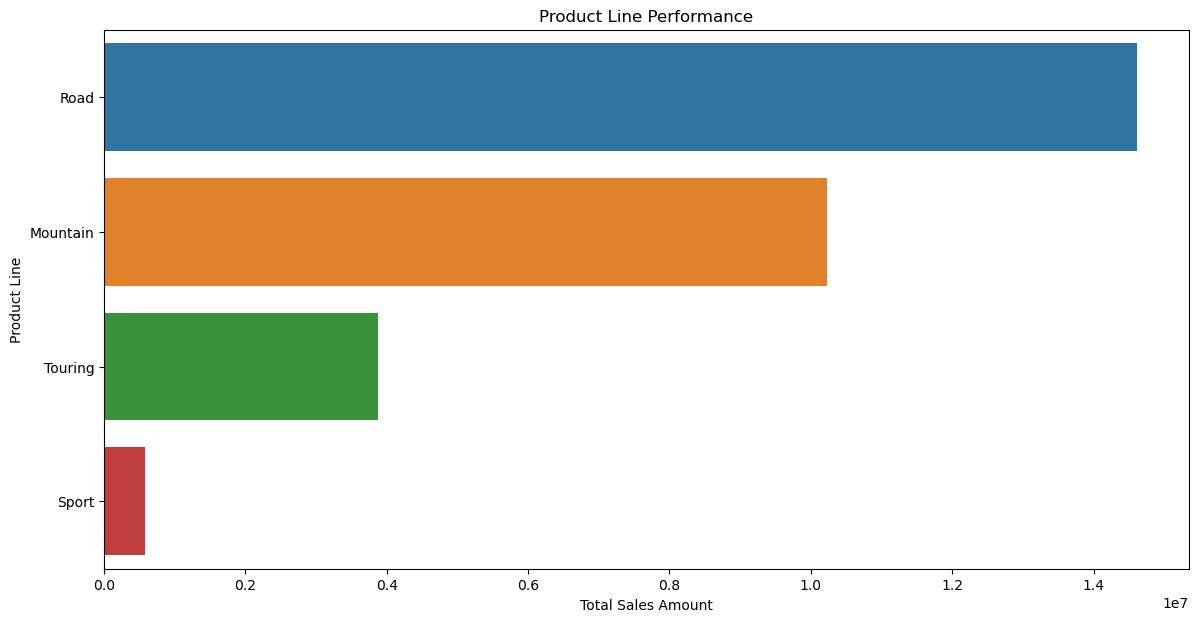

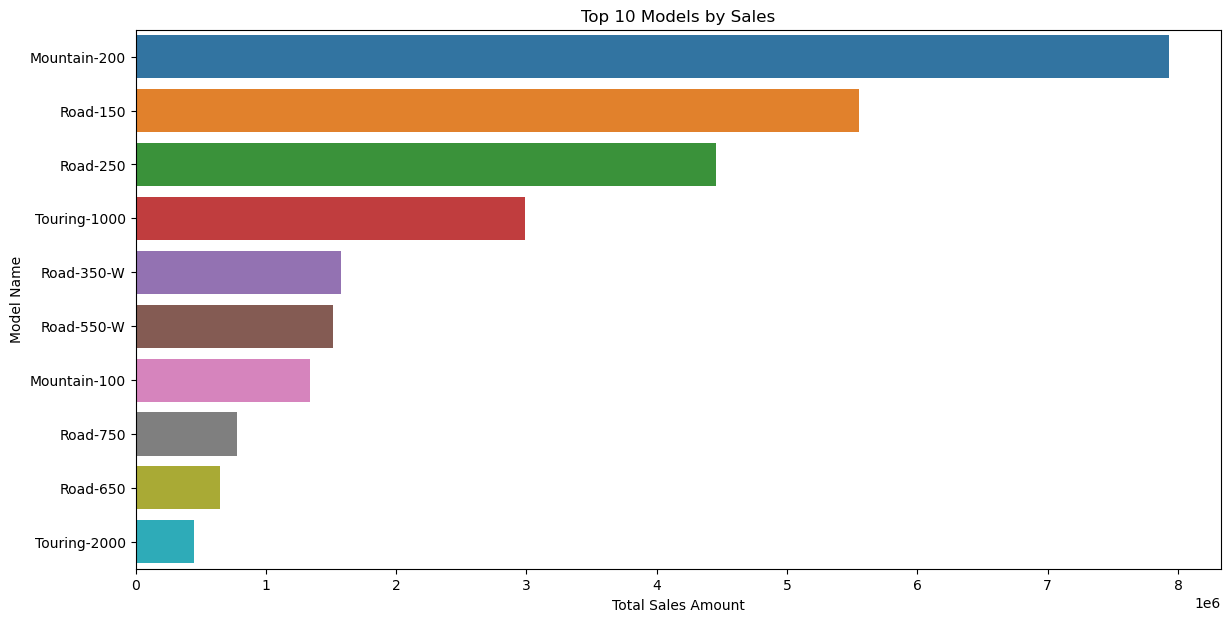

In [65]:
# Group by ProductLine and calculate total sales
product_line_performance = adventure_data.groupby('ProductLine')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot top product lines by sales
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='ProductLine', data=product_line_performance)
plt.title('Product Line Performance')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Line')
plt.show()

# Group by ModelName and calculate total sales
model_performance = adventure_data.groupby('ModelName')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot top models by sales
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='ModelName', data=model_performance.head(10))
plt.title('Top 10 Models by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('Model Name')
plt.show()


### Interpretation
#### Product Line Performance 
This bar chart illustrates the performance of different product lines based on total sales amount:

- **Road** products are the highest-performing line, with sales exceeding 1.4 million units, indicating a strong customer preference.
- **Mountain** products follow with substantial sales, although significantly lower than Road products.
- **Touring** products have moderate sales, indicating a niche but dedicated market segment.
- **Sport** products have the lowest sales, suggesting either a smaller market or lower demand compared to other product lines.

Overall, Road products dominate the market, followed by Mountain and Touring, with Sport products trailing behind.

#### Top 10 Models by Sales

This bar chart illustrates the top 10 models by sales amount:

- **Mountain-200** is the highest-selling model, significantly outperforming other models.
- **Road-150** and **Road-250** follow as the second and third highest-selling models, respectively.
- **Touring-1000** also shows strong sales performance, ranking fourth.
- Other models like **Road-350-W**, **Road-550-W**, and **Mountain-100** have moderate sales.
- Models like **Road-750**, **Road-650**, and **Touring-2000** have lower sales compared to the top-performing models.

Overall, Mountain and Road models dominate the top-selling list, indicating their popularity and strong customer demand.

# Market Analysis:

### Analyzing Sales by Region, Country, and Sales Group

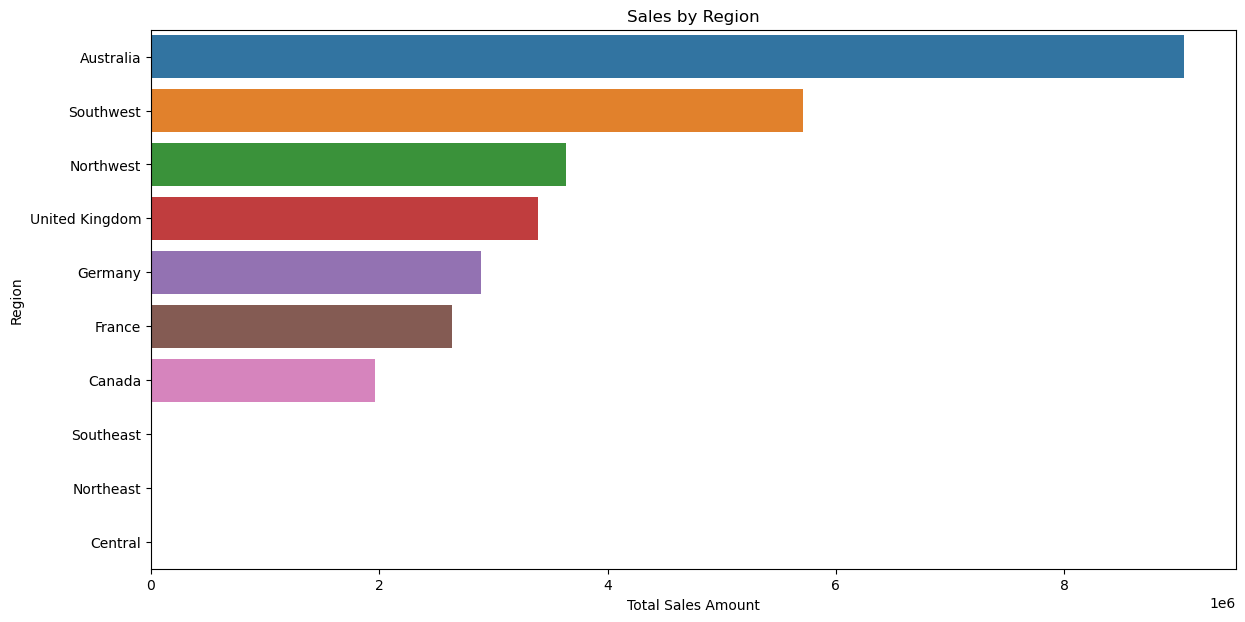

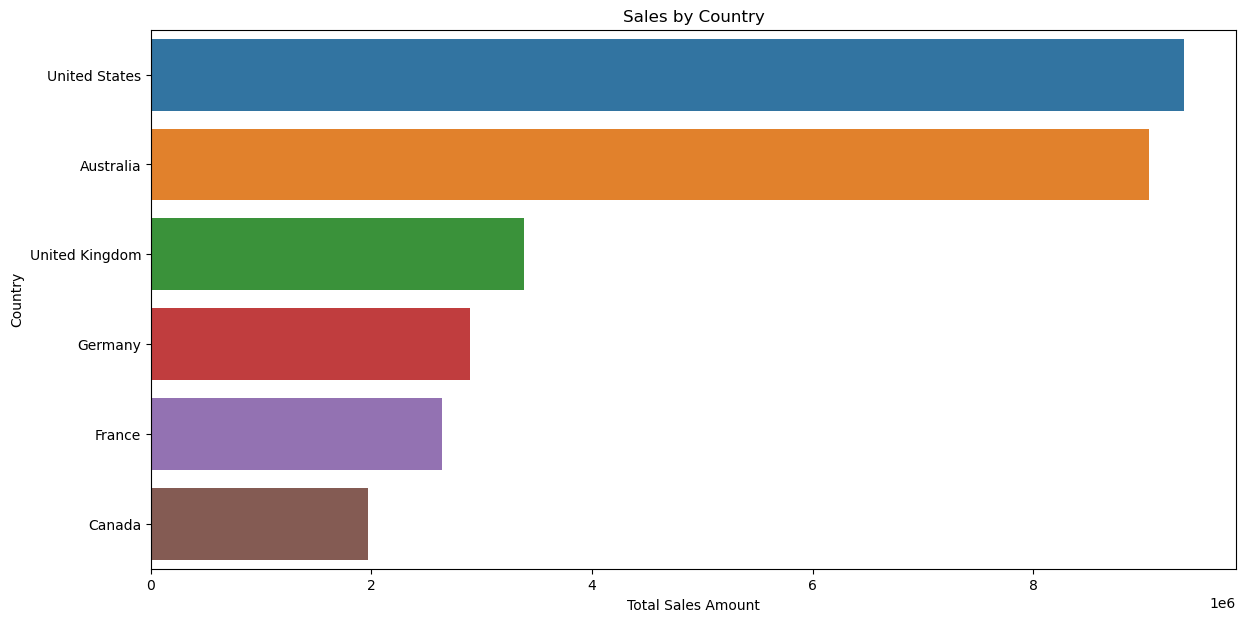

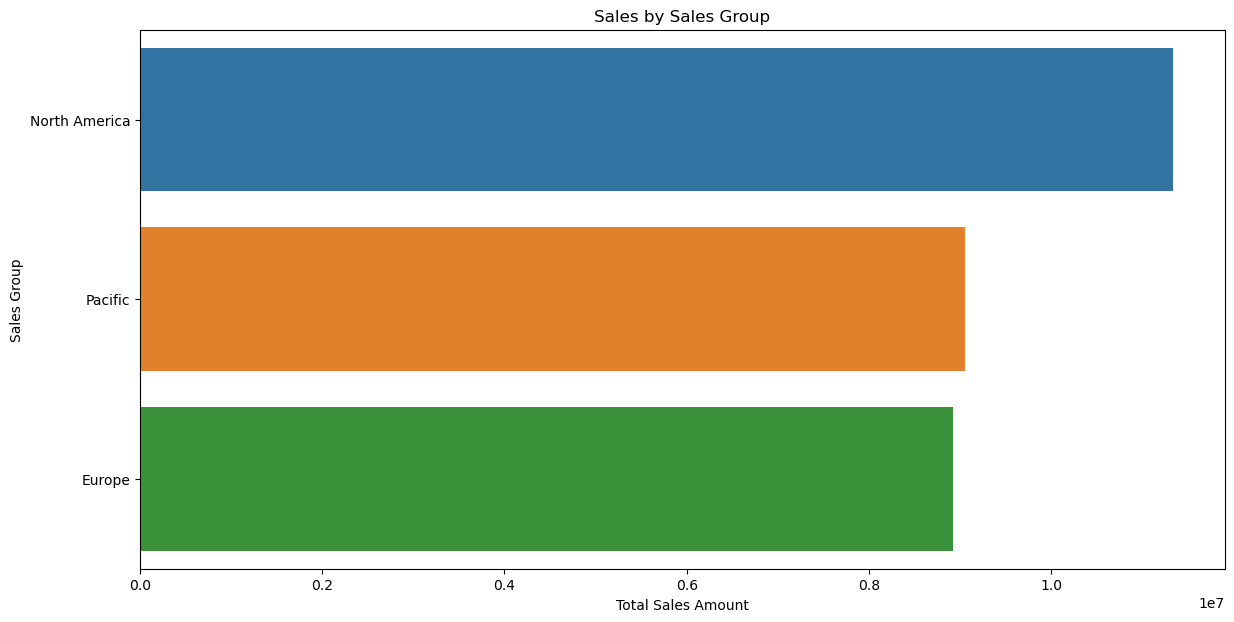

In [66]:
# Group by Region and calculate total sales
sales_by_region = adventure_data.groupby('Region')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot sales by region
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Region', data=sales_by_region)
plt.title('Sales by Region')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')
plt.show()

# Group by Country and calculate total sales
sales_by_country = adventure_data.groupby('Country')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot sales by country
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Country', data=sales_by_country)
plt.title('Sales by Country')
plt.xlabel('Total Sales Amount')
plt.ylabel('Country')
plt.show()

# Group by Sales Group and calculate total sales
sales_by_group = adventure_data.groupby('Group')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot sales by sales group
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Group', data=sales_by_group)
plt.title('Sales by Sales Group')
plt.xlabel('Total Sales Amount')
plt.ylabel('Sales Group')
plt.show()


### Interpretation of the Three Graphs:

1. **Sales by Region:**
   - The graph shows that Australia leads in sales, followed by the Southwest and Northwest regions.
   - The United Kingdom, Germany, and France have moderate sales, while Southeast, Northeast, and Central regions have the least sales.

2. **Sales by Country:**
   - The United States has the highest sales, followed closely by Australia.
   - The United Kingdom, Germany, and France also have significant sales, whereas Canada has the lowest sales among the countries displayed.

3. **Sales by Sales Group:**
   - North America has the highest total sales amount among the sales groups.
   - The Pacific group comes next, with Europe having the lowest total sales amount among the three groups.

These visualizations indicate that the North American and Pacific regions are strong markets, with specific countries like the United States and Australia driving significant sales.

### Studying the Impact of Regional Promotions

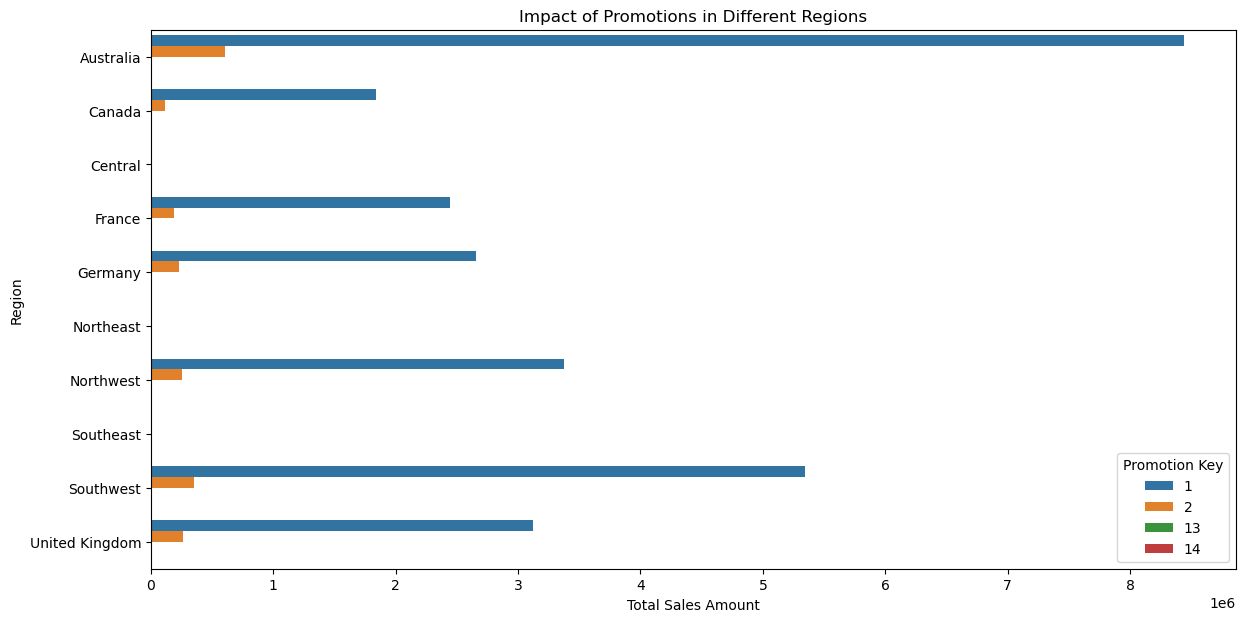

In [67]:
# Group by Region and PromotionKey and calculate total sales
regional_promotion_impact = adventure_data.groupby(['Region', 'PromotionKey'])['SalesAmount'].sum().reset_index()

# Plot the impact of promotions in different regions
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='Region', hue='PromotionKey', data=regional_promotion_impact)
plt.title('Impact of Promotions in Different Regions')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')
plt.legend(title='Promotion Key')
plt.show()


### Interpretation:

The graph shows the impact of different promotions (Promotion Keys 1, 2, 13, and 14) on sales across various regions.

- **Promotion Key 1** is the most effective and widely used promotion across all regions, generating the highest sales.
- **Promotion Key 2** has a noticeable impact but is significantly less effective than Promotion Key 1.
- **Promotion Keys 13 and 14** have minimal to no impact on sales, indicating they are either rarely used or not effective.

Overall, Promotion Key 1 dominates in driving sales in all regions, particularly in Australia and the Southwest, where it has the highest sales impact.

### Comparing Sales Performance Across Different Territories

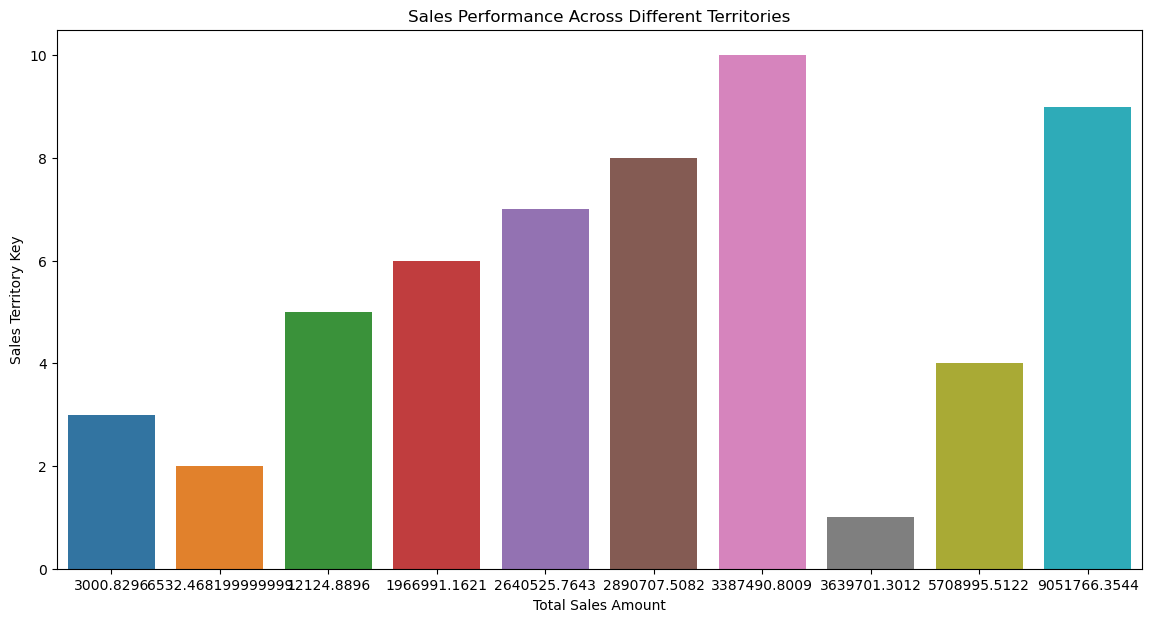

In [68]:
# Group by SalesTerritoryKey and calculate total sales
sales_by_territory = adventure_data.groupby('SalesTerritoryKey')['SalesAmount'].sum().reset_index().sort_values(by='SalesAmount', ascending=False)

# Plot sales performance across different territories
plt.figure(figsize=(14, 7))
sns.barplot(x='SalesAmount', y='SalesTerritoryKey', data=sales_by_territory)
plt.title('Sales Performance Across Different Territories')
plt.xlabel('Total Sales Amount')
plt.ylabel('Sales Territory Key')
plt.show()

### Interpretation:
### Interpretation:

The graph shows sales performance across different sales territories. 

- **Territory 10** has the highest sales (~$9M).
- **Territories 1, 4, and 7** have the lowest sales (~$3M or less).
- **Territories 2 and 5** have moderate sales (~$2M-$3M).
- Other territories range from ~$3M to ~$6M.

Overall, Territory 10 significantly outperforms the others.

# Time Series Analysis:

### Forecasting Future Sales Using Historical Data

In [69]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Set plot style
sns.set(style='whitegrid')

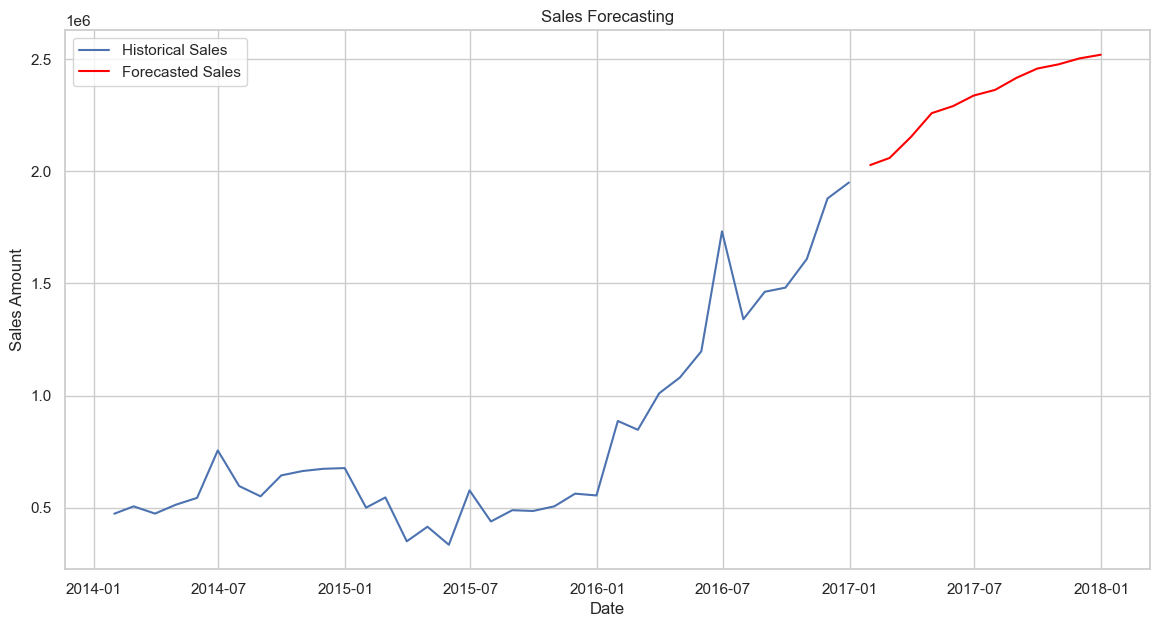

In [70]:
# Group by OrderDate and calculate total sales
sales_trend = adventure_data.groupby('OrderDate')['SalesAmount'].sum().reset_index()

# Set the OrderDate column as the index
sales_trend.set_index('OrderDate', inplace=True)

# Resample the data by month
monthly_sales = sales_trend['SalesAmount'].resample('M').sum()

# Fit an ARIMA model for forecasting
arima_model = sm.tsa.ARIMA(monthly_sales, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast future sales
forecast = arima_result.forecast(steps=12)

# Plot the historical data and the forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()


### Interpretation:
The graph illustrates historical sales (blue line) and forecasted sales (red line) from 2014 to early 2018. Historical sales show an overall upward trend with some fluctuations. The forecasted sales continue the upward trend, indicating expected growth in sales amount over the projected period.

### Identifying Seasonal Trends and Patterns

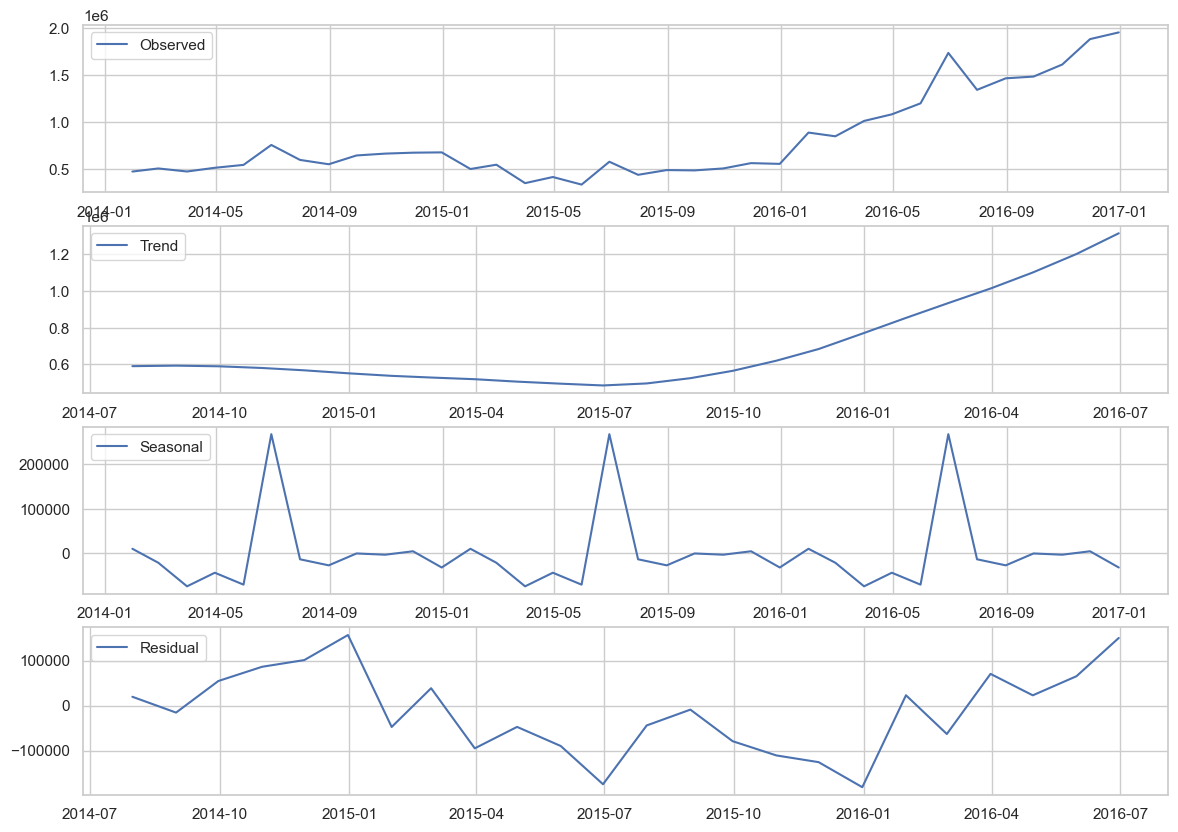

In [71]:
# Decompose the time series to identify seasonal trends and patterns
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposition
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.show()


### Interpretation:
The decomposition of the time series data into its components shows the following:

1. **Observed**: The overall sales amount, exhibiting growth over time with some fluctuations.
2. **Trend**: A consistent upward trend in sales, indicating overall growth.
3. **Seasonal**: Repeating patterns indicating seasonality, with peaks around certain times.
4. **Residual**: The noise or random fluctuations after removing the trend and seasonal components, showing variability but no clear pattern.

### Analyzing Sales Performance by Fiscal Periods

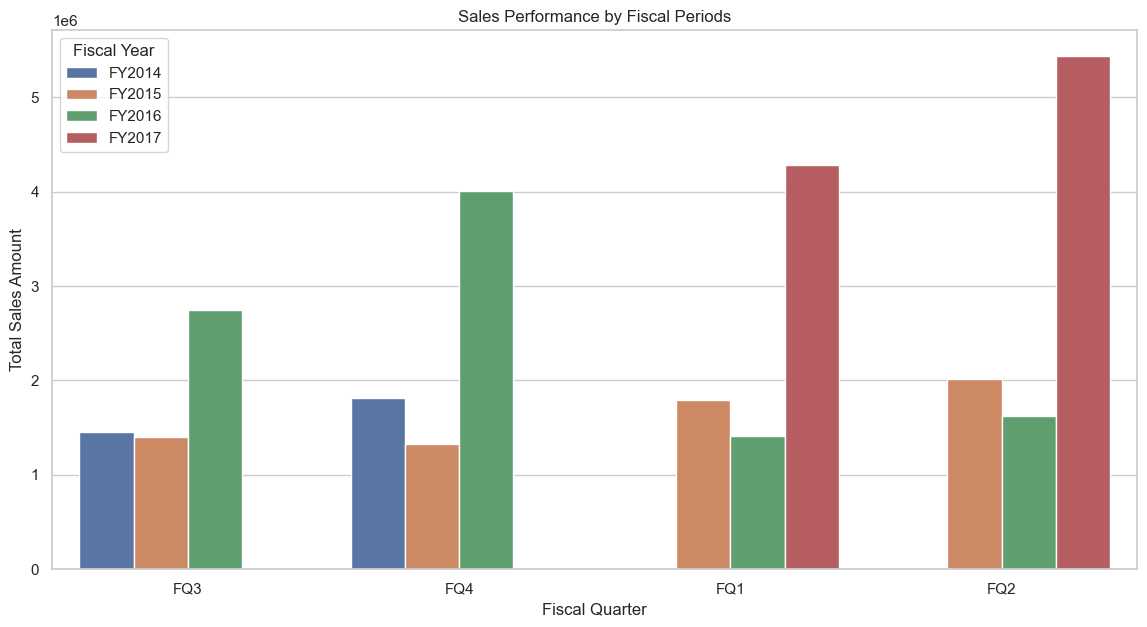

In [72]:
# Group by FiscalYear and FiscalQuarter and calculate total sales
sales_by_fiscal_period = adventure_data.groupby(['FiscalYear', 'FiscalQuarter'])['SalesAmount'].sum().reset_index()

# Plot sales performance by fiscal periods
plt.figure(figsize=(14, 7))
sns.barplot(x='FiscalQuarter', y='SalesAmount', hue='FiscalYear', data=sales_by_fiscal_period)
plt.title('Sales Performance by Fiscal Periods')
plt.xlabel('Fiscal Quarter')
plt.ylabel('Total Sales Amount')
plt.legend(title='Fiscal Year')
plt.show()


### Interpretation:
This bar chart illustrates sales performance across different fiscal quarters (FQ3, FQ4, FQ1, FQ2) for fiscal years 2014 to 2017. It shows that FY2017 had the highest sales in FQ2, significantly outperforming previous years. FY2016 saw strong sales in FQ3 and FQ4. FY2015 had relatively consistent sales across quarters but lower overall compared to FY2016 and FY2017. FY2014 had the lowest sales across all quarters.

In [73]:
# Import the dataset named 'budget_data.csv'
budget_data = pd.read_csv('budget_data.csv')

# Display the first few rows of the dataframe to verify the import
budget_data.head()

Category        Subcategory             ProductName  Jan_2016  Feb_2016  \
0  Accessories         Bike Racks     Hitch Rack - 4-Bike      1131      2635   
1  Accessories        Bike Stands  All-Purpose Bike Stand       666      3695   
2  Accessories  Bottles and Cages   Water Bottle - 30 oz.      1892      4727   
3  Accessories           Cleaners   Bike Wash - Dissolver       160       713   
4  Accessories            Fenders   Fender Set - Mountain       970      3014   

   Mar_2016  Apr_2016  May_2016  Jun_2016  Jul_2016  Aug_2016  Sep_2016  \
0      4134      2179      2637      3279      2218      3287      3885   
1      2868      4862      3439      4612      2774      3003      2401   
2      3656      4449      4051      6257      4871      5231      5461   
3       555       656       369       582       777       777       239   
4      2809      4259      3638      3721      4190      3618      3975   

   Oct_2016  Nov_2016  Dec_2016  Grand_Total  
0      2484      5441      3551        36861  
1      4413      3881      2143        38757  
2      5529      5220      6025        57369  
3       496       686       455         6465  
4      3892      4740      4844        43670

In [74]:
# Convert the data to long format for easier plotting
budget_data_long = pd.melt(budget_data, 
                           id_vars=['Category', 'Subcategory', 'ProductName', 'Grand_Total'], 
                           var_name='Month', 
                           value_name='SalesAmount')


In [75]:
# Convert 'Month' to a proper datetime format (assuming the month column names are in 'MMM_YYYY' format)
budget_data_long['Month'] = pd.to_datetime(budget_data_long['Month'], format='%b_%Y')


In [76]:
budget_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Category     204 non-null    object        
 1   Subcategory  204 non-null    object        
 2   ProductName  204 non-null    object        
 3   Grand_Total  204 non-null    int64         
 4   Month        204 non-null    datetime64[ns]
 5   SalesAmount  204 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 9.7+ KB


In [77]:
# Check the column names
print(budget_data.columns)


Index(['Category', 'Subcategory', 'ProductName', 'Jan_2016', 'Feb_2016',
       'Mar_2016', 'Apr_2016', 'May_2016', 'Jun_2016', 'Jul_2016', 'Aug_2016',
       'Sep_2016', 'Oct_2016', 'Nov_2016', 'Dec_2016', 'Grand_Total'],
      dtype='object')


### Yearly Sales Comparison:

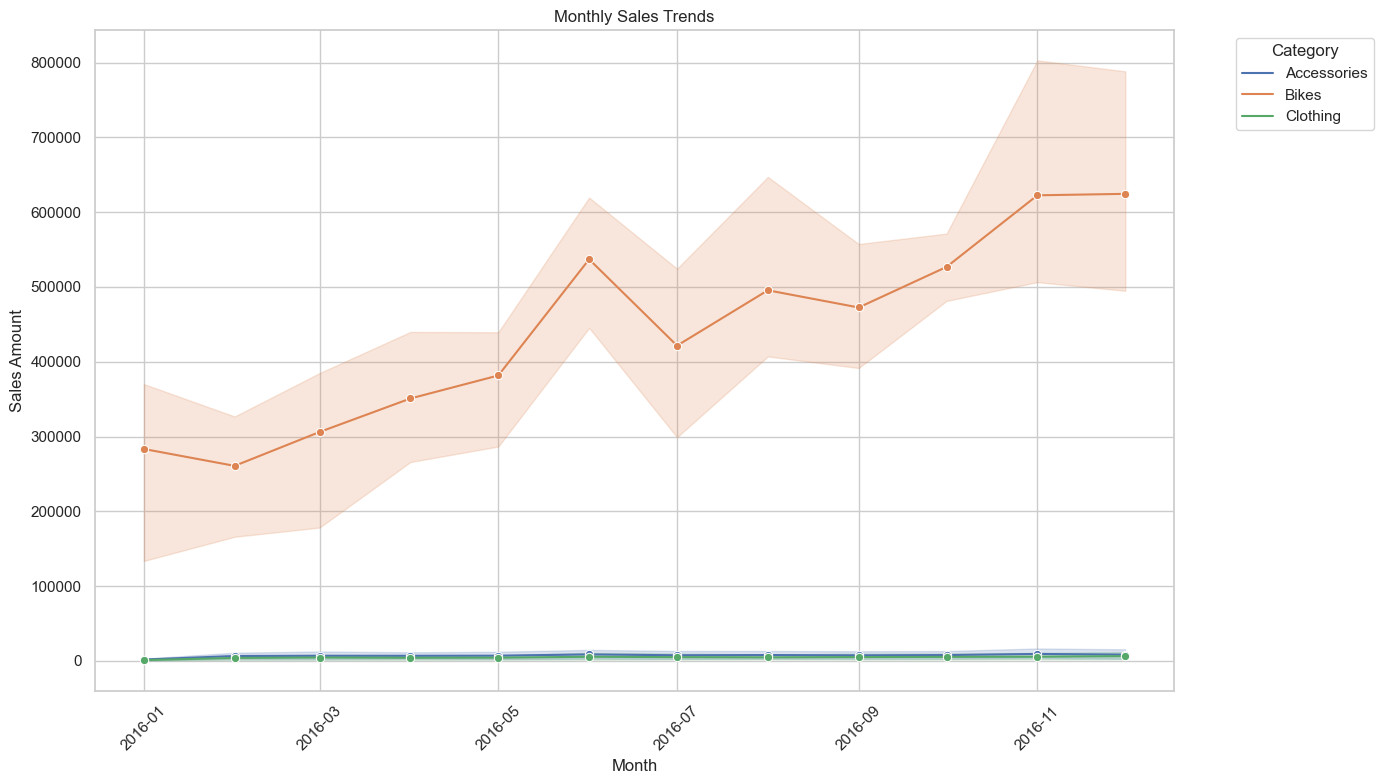

In [78]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the monthly sales trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=budget_data_long, x='Month', y='SalesAmount', hue='Category', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation:
1. **Dominant Category**:
   - "Bikes" category has the highest sales, significantly exceeding "Accessories" and "Clothing".

2. **Sales Growth**:
   - "Bikes" show a clear upward trend, indicating increasing sales over the months.

3. **Stability**:
   - "Accessories" and "Clothing" sales remain stable with minimal changes throughout the year.

4. **Variability**:
   - The shaded area shows variability in "Bikes" sales, with some fluctuations indicating periods of uncertainty or market changes.

### Growth Rate Analysis:

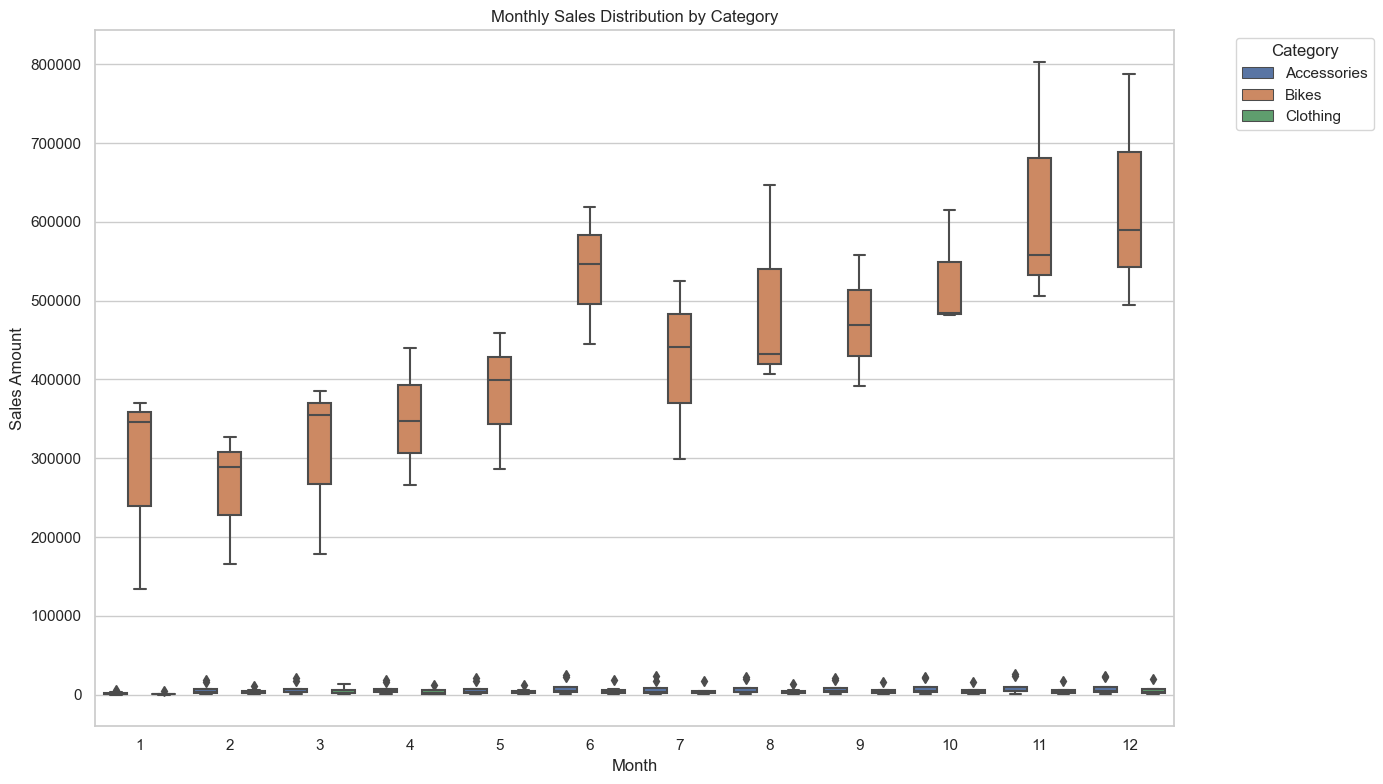

In [79]:
# Plotting a boxplot to see the distribution of sales amounts by month
plt.figure(figsize=(14, 8))
sns.boxplot(data=budget_data_long, x=budget_data_long['Month'].dt.month, y='SalesAmount', hue='Category')
plt.title('Monthly Sales Distribution by Category')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Interpretation:
1. **Category Dominance**:
   - "Bikes" category consistently has the highest sales across all months.

2. **Monthly Sales Variation**:
   - Sales of "Bikes" show significant variation month-to-month, indicated by the spread of the box plots.
   - "Accessories" and "Clothing" categories have low and stable sales with minimal variation.

3. **Outliers**:
   - There are a few outliers in the "Bikes" category, showing occasional months with exceptionally high sales.

4. **Median Sales**:
   - Median sales for "Bikes" show an upward trend, especially notable in the latter half of the year.

This chart emphasizes the dominant contribution of the "Bikes" category to overall sales and highlights the monthly variability within this category.

## Category/Subcategory Analysis:

In [80]:
# Group by Category and Subcategory and sum the SalesAmount
category_sales = budget_data_long.groupby(['Category', 'Subcategory'])['SalesAmount'].sum().reset_index()


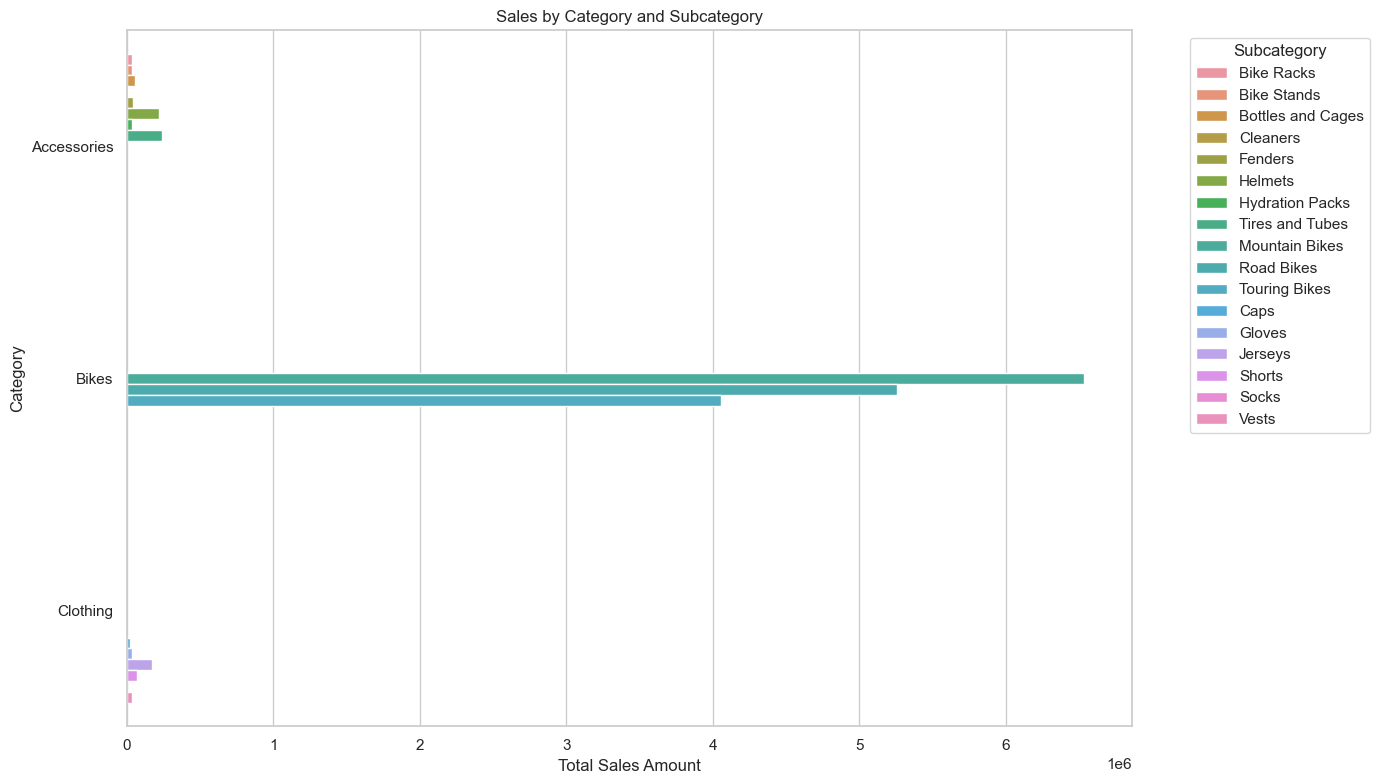

In [81]:
# Plot the sales by Category and Subcategory
plt.figure(figsize=(14, 8))
sns.barplot(data=category_sales, x='SalesAmount', y='Category', hue='Subcategory')
plt.title('Sales by Category and Subcategory')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Interpretation

1. **Category Dominance**:
   - "Bikes" category dominates sales.

2. **Top Subcategories**:
   - In "Bikes": "Mountain Bikes" and "Road Bikes" are top sellers.
   - In "Accessories": "Helmets" and "Tires and Tubes" stand out.
   - In "Clothing": "Jerseys" and "Gloves" lead sales.

3. **Sales Contribution**:
   - "Mountain Bikes" and "Road Bikes" significantly drive total sales. 
   - "Accessories" and "Clothing" have smaller, more evenly distributed sales.

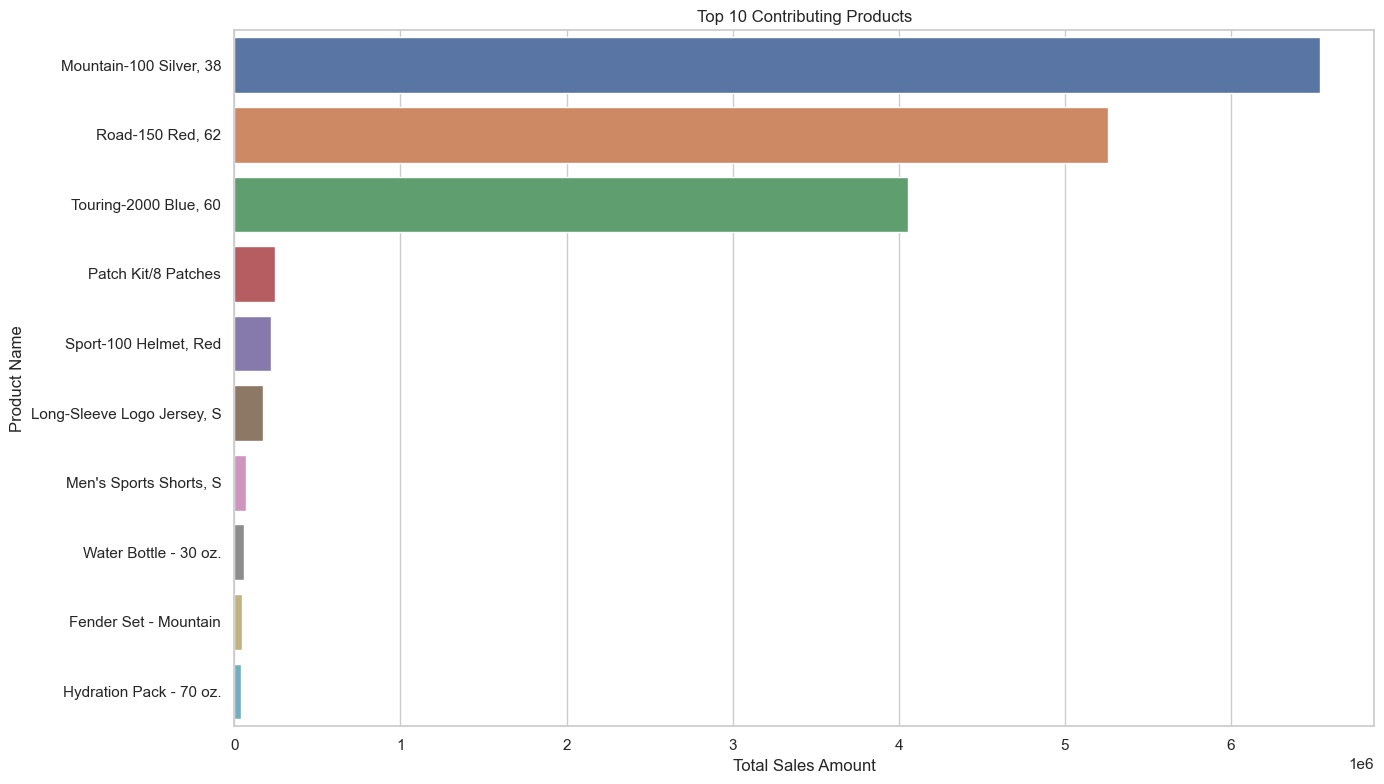

In [82]:
# Identify top contributing products
top_products = budget_data_long.groupby('ProductName')['SalesAmount'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot the top contributing products
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products, x='SalesAmount', y='ProductName')
plt.title('Top 10 Contributing Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

### Interpretation

1. **Top Contributing Products**:
   - "Mountain-100 Silver, 38" has the highest sales amount.
   - "Road-150 Red, 62" and "Touring-2000 Blue, 60" follow closely.

2. **Significant Contributors**:
   - These three products significantly outpace the others in sales contribution.

3. **Minor Contributors**:
   - The remaining products like "Patch Kit/8 Patches" and "Sport-100 Helmet, Red" contribute relatively less.

### Growth Rate Analysis:

In [83]:
# Group by Month and sum the SalesAmount
monthly_sales = budget_data_long.groupby('Month')['SalesAmount'].sum().reset_index()

# Calculate month-over-month growth rate
monthly_sales['MoM_Growth'] = monthly_sales['SalesAmount'].pct_change() * 100

# Display the data
print(monthly_sales)


        Month  SalesAmount  MoM_Growth
0  2016-01-01       871119         NaN
1  2016-02-01       858350   -1.465816
2  2016-03-01       999795   16.478709
3  2016-04-01      1131721   13.195305
4  2016-05-01      1226351    8.361601
5  2016-06-01      1713430   39.717748
6  2016-07-01      1354917  -20.923703
7  2016-08-01      1577564   16.432519
8  2016-09-01      1507678   -4.429995
9  2016-10-01      1674817   11.085855
10 2016-11-01      1975436   17.949364
11 2016-12-01      1978396    0.149840


### Interpretation 

1. **Overall Growth**:
   - The SalesAmount shows an overall increasing trend throughout the year.

2. **Significant Increases**:
   - **June** saw the highest growth at 39.72%.
   - **March** and **August** also experienced substantial increases of 16.48% and 16.43% respectively.

3. **Declines**:
   - **July** had the largest decline in sales, dropping by 20.92%.
   - **February** and **September** also faced declines, with decreases of 1.47% and 4.43% respectively.

4. **Stable Periods**:
   - **December** showed a minimal increase of just 0.15%, indicating stable sales compared to November.

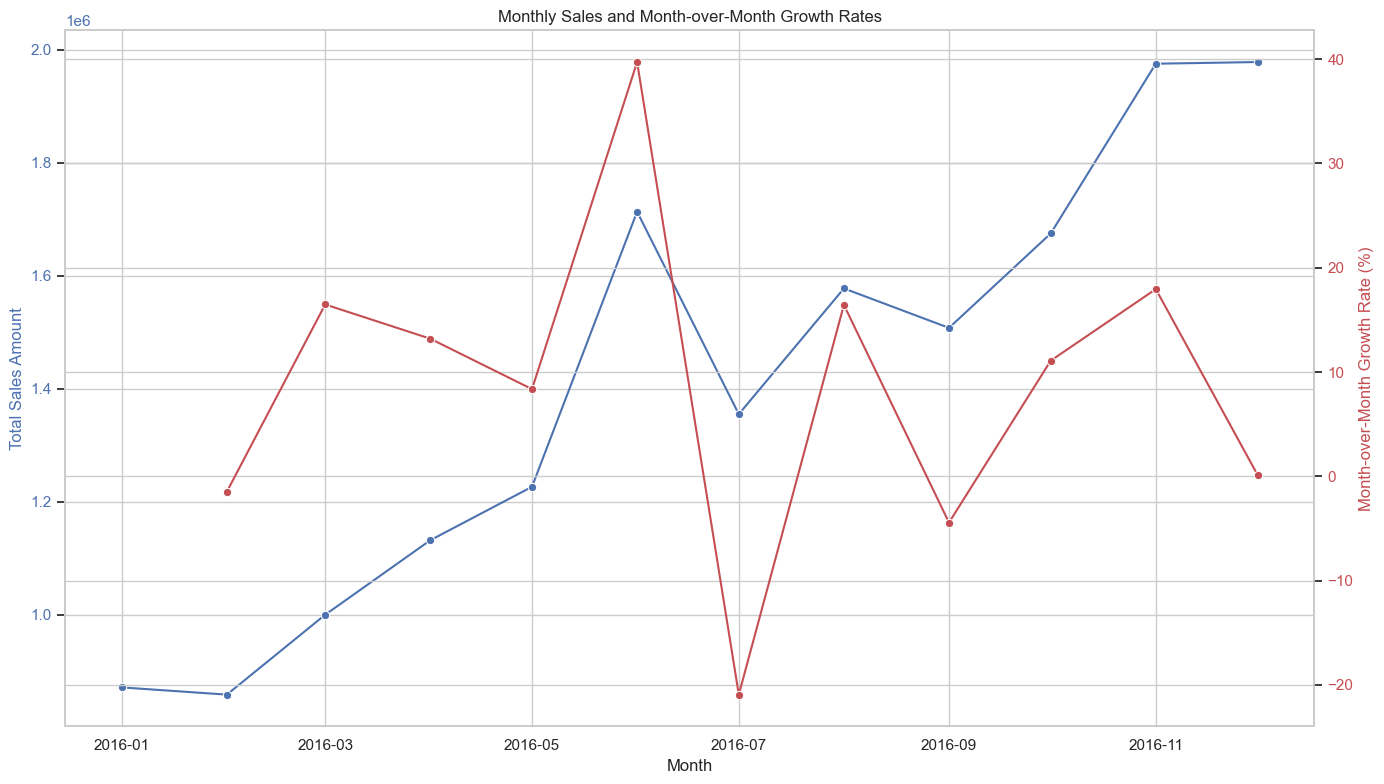

In [84]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the monthly sales and month-over-month growth rates
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot total sales amount
sns.lineplot(data=monthly_sales, x='Month', y='SalesAmount', ax=ax1, marker='o', color='b')
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Sales Amount', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the growth rate
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales, x='Month', y='MoM_Growth', ax=ax2, marker='o', color='r')
ax2.set_ylabel('Month-over-Month Growth Rate (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Monthly Sales and Month-over-Month Growth Rates')
fig.tight_layout()
plt.show()


### Interpretation 

1. **Sales Amount (Blue Line)**:
   - Sales show an overall upward trend, reaching a peak in November and December.
   - Significant increases are observed in April, May, and June.

2. **Month-over-Month Growth Rate (Red Line)**:
   - **Highest Growth**: June, with a growth rate of approximately 40%.
   - **Declines**: 
     - July experienced a sharp decline of around 20%.
     - February and September also showed negative growth rates.
   - **Stable Periods**: 
     - December shows a minimal change in growth rate, indicating stable sales compared to November.
   
Overall, while the sales amount shows a steady increase, there are periods of volatility in growth rates, particularly notable in mid-year months.

### Top Products Analysis:

### Identifying best-selling products and visualizing their sales performance.

In [85]:
# Group by ProductName and sum the SalesAmount to get total sales per product
product_sales = budget_data_long.groupby('ProductName')['SalesAmount'].sum().reset_index()

# Sort products by total sales amount in descending order
product_sales = product_sales.sort_values(by='SalesAmount', ascending=False)

# Display the top 10 best-selling products
top_products = product_sales.head(10)
print(top_products)


                   ProductName  SalesAmount
11     Mountain-100 Silver, 38      6534364
13            Road-150 Red, 62      5257897
15       Touring-2000 Blue, 60      4055965
12         Patch Kit/8 Patches       242777
14       Sport-100 Helmet, Red       221905
8   Long-Sleeve Logo Jersey, S       170938
9       Men's Sports Shorts, S        68453
16       Water Bottle - 30 oz.        57369
4        Fender Set - Mountain        43670
7      Hydration Pack - 70 oz.        39803


### Interpretation
The top three products (Mountain-100 Silver, Road-150 Red, Touring-2000 Blue) dominate sales, significantly outpacing the other products in the top 10 list. The remaining products contribute much smaller amounts to the overall sales.

### Visualize Sales Performance of Best-Selling Products

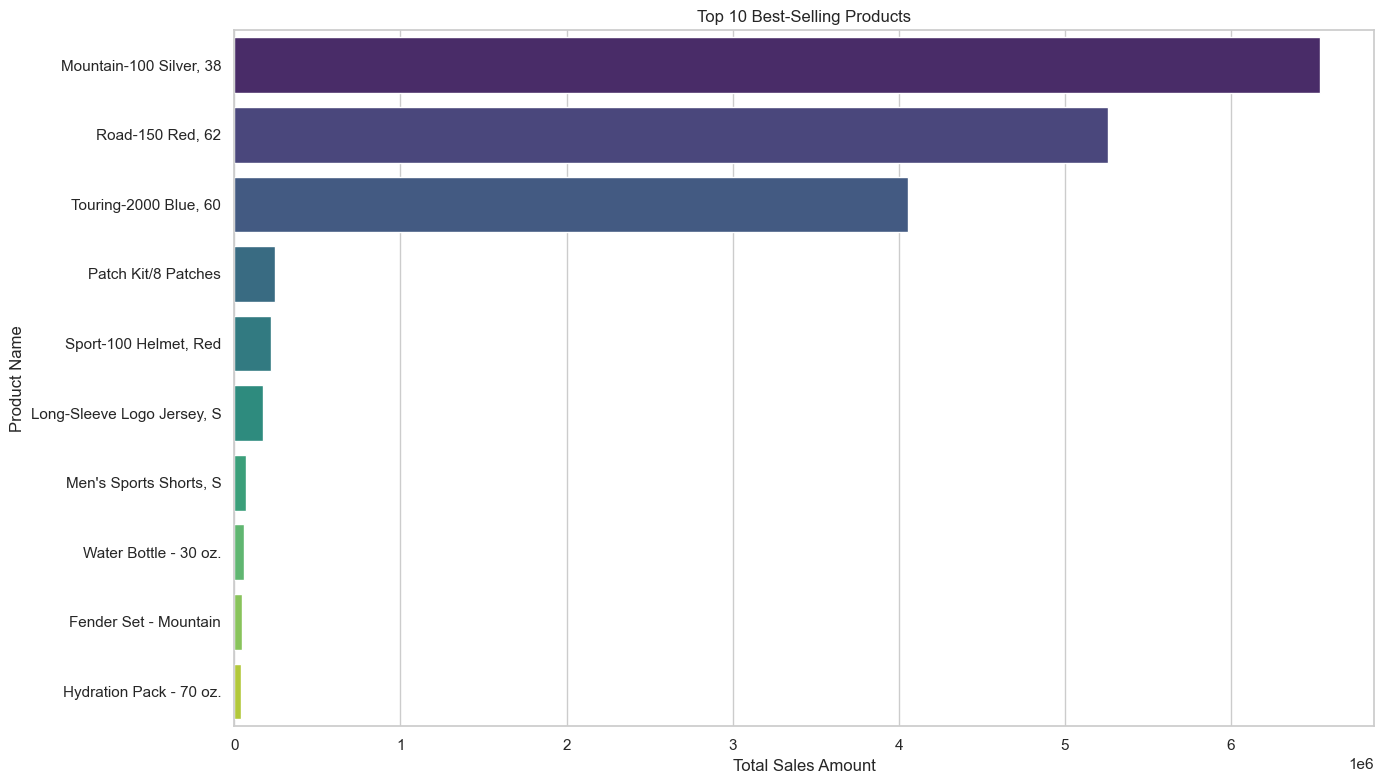

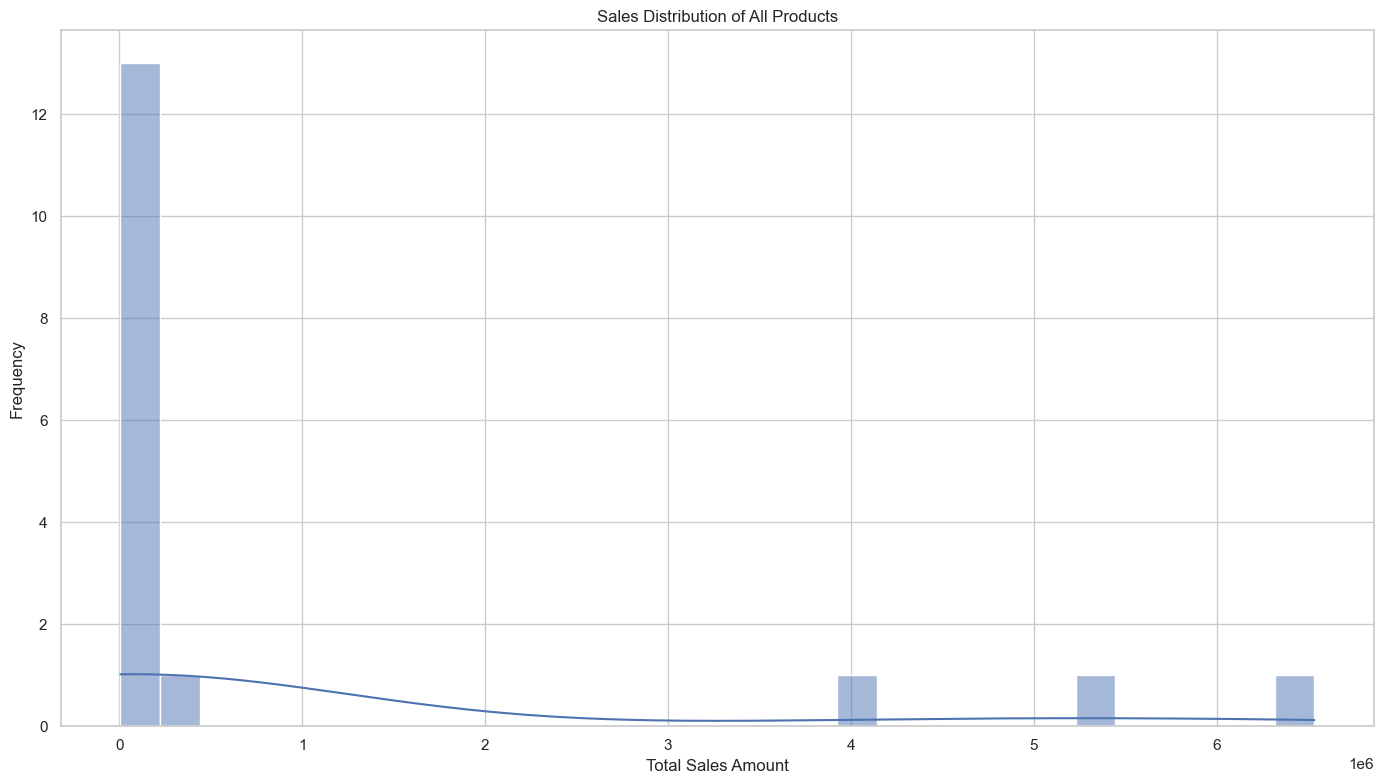

In [86]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the top 10 best-selling products
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products, x='SalesAmount', y='ProductName', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

# Optionally, plot the sales distribution of all products
plt.figure(figsize=(14, 8))
sns.histplot(product_sales['SalesAmount'], bins=30, kde=True)
plt.title('Sales Distribution of All Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Interpretation

**Top 10 Best-Selling Products (First Graph):**
- The top-selling product is "Mountain-100 Silver, 38" with sales amounting to approximately 6.5 million.
- The next top sellers are "Road-150 Red, 62" and "Touring-2000 Blue, 60" with sales around 5.2 million and 4 million respectively.
- The remaining products have significantly lower sales, with "Patch Kit/8 Patches" and "Sport-100 Helmet, Red" leading among the lower end.

**Sales Distribution of All Products (Second Graph):**
- The sales distribution shows a few high-selling products contributing to large sales amounts, while most products have relatively low sales.
- There is a notable skew, with the majority of products clustered on the lower end of the sales spectrum.

This analysis highlights the significant impact of a few high-selling products on overall sales, suggesting a heavy reliance on top performers.

### Contribution to Grand Total:

### Calculate Monthly Contribution to Grand Total

In [87]:
# Group by Month and sum the SalesAmount to get total sales per month
monthly_sales = budget_data_long.groupby('Month')['SalesAmount'].sum().reset_index()

# Calculate the grand total sales
grand_total_sales = monthly_sales['SalesAmount'].sum()

# Calculate the contribution of each month to the grand total
monthly_sales['Contribution (%)'] = (monthly_sales['SalesAmount'] / grand_total_sales) * 100

# Display the monthly sales with their contributions
print(monthly_sales)


        Month  SalesAmount  Contribution (%)
0  2016-01-01       871119          5.163847
1  2016-02-01       858350          5.088155
2  2016-03-01       999795          5.926617
3  2016-04-01      1131721          6.708652
4  2016-05-01      1226351          7.269603
5  2016-06-01      1713430         10.156925
6  2016-07-01      1354917          8.031720
7  2016-08-01      1577564          9.351534
8  2016-09-01      1507678          8.937262
9  2016-10-01      1674817          9.928034
10 2016-11-01      1975436         11.710053
11 2016-12-01      1978396         11.727599


### Interpretation

The data shows the monthly sales amounts for the year 2016 along with their contribution percentages to the annual total:

1. **Top Contributing Months:**
   - **November and December** are the highest contributing months, each accounting for approximately 11.7% of the annual sales.
   - **June** also has a significant contribution at 10.16%.

2. **Consistent Performance:**
   - The months from **January to May** contribute steadily, each ranging from 5.16% to 7.27%.
   - Contributions increase from **March** onwards, peaking in the last two months of the year.

3. **Sales Peaks and Patterns:**
   - Sales peak significantly in **November and December**, likely indicating seasonal trends or promotional events.
   - There is a noticeable

### Visualize Monthly Contributions

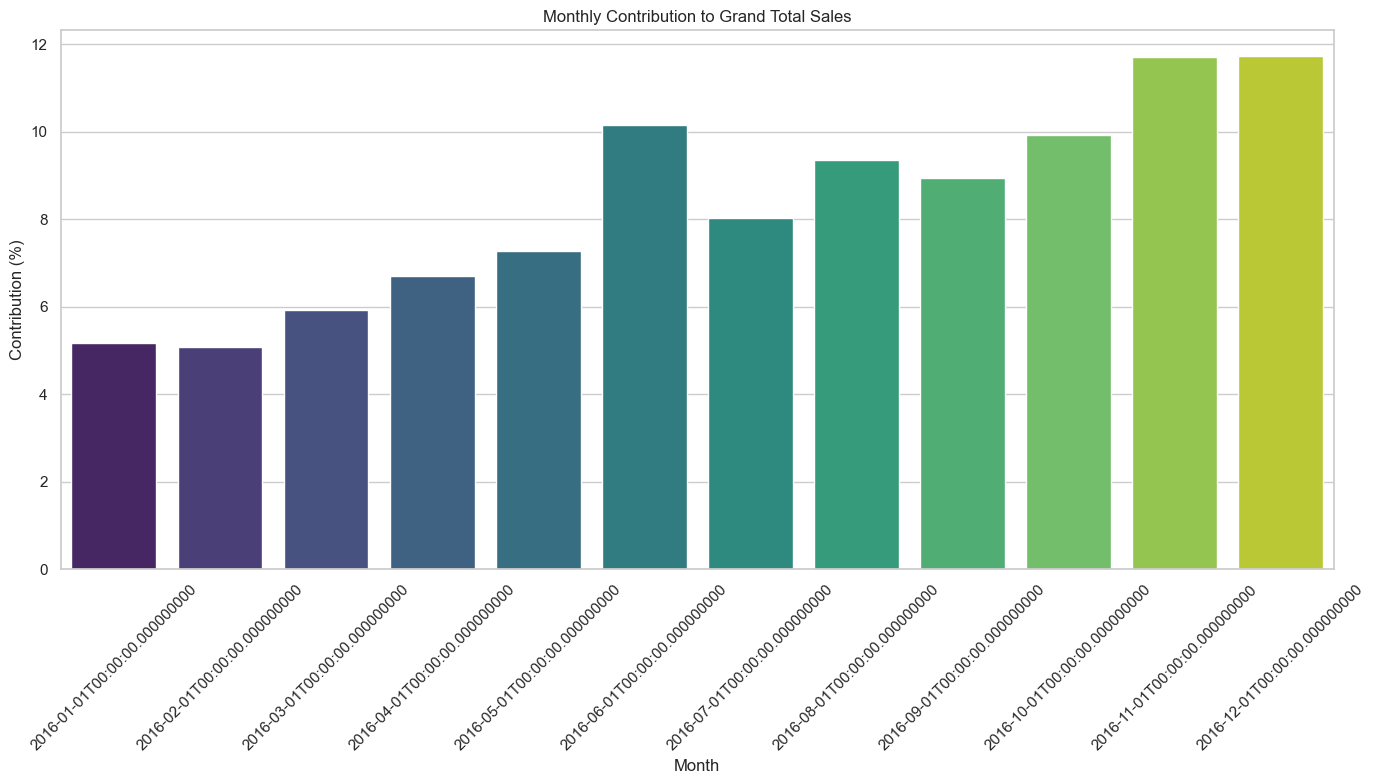

In [88]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the monthly contributions to the grand total
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_sales, x='Month', y='Contribution (%)', palette='viridis')
plt.title('Monthly Contribution to Grand Total Sales')
plt.xlabel('Month')
plt.ylabel('Contribution (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretation

The chart shows monthly contributions to total sales in 2016:

1. **Highest Contributions:** November and December (~11.7% each).
2. **Significant Increase:** From June, peaking at year-end.
3. **Consistent Growth:** January to May (5% to 7%).

Mid-year and year-end months contribute most to sales.

### Visualize Monthly Contributions

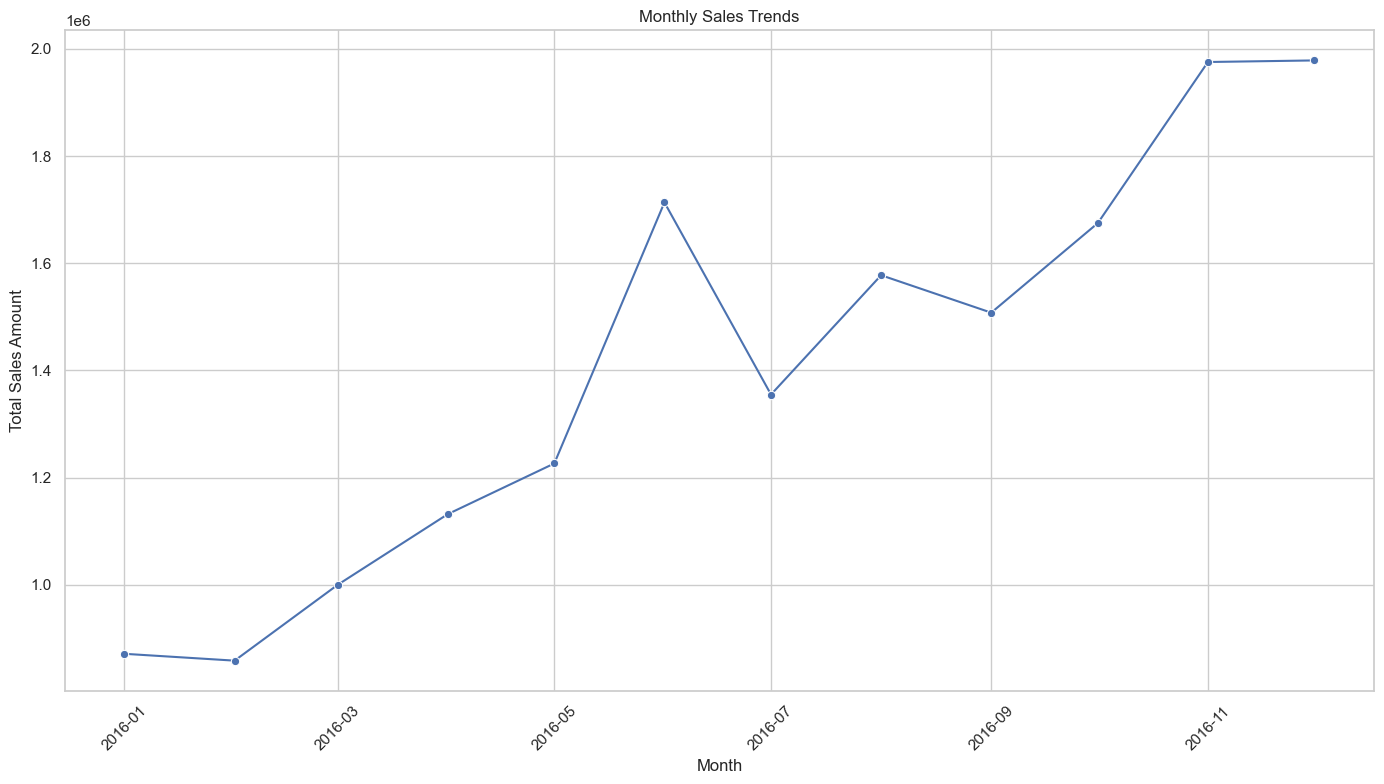

In [89]:
# Set the plot style
sns.set(style="whitegrid")

# Plot the monthly sales trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month', y='SalesAmount', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation

The chart shows monthly sales trends for 2016:

1. **Steady Increase:** Sales generally increased throughout the year.
2. **Peaks:** Significant peaks in June and December.
3. **Dips:** Notable dips in February and July.

Overall, sales grew consistently with notable peaks mid-year and year-end.

### Trend Analysis

### Visualize Sales Trends

       Month  SalesAmount
0 2016-01-01       871119
1 2016-02-01       858350
2 2016-03-01       999795
3 2016-04-01      1131721
4 2016-05-01      1226351
         SalesAmount
Month               
2016-01       871119
2016-02       858350
2016-03       999795
2016-04      1131721
2016-05      1226351


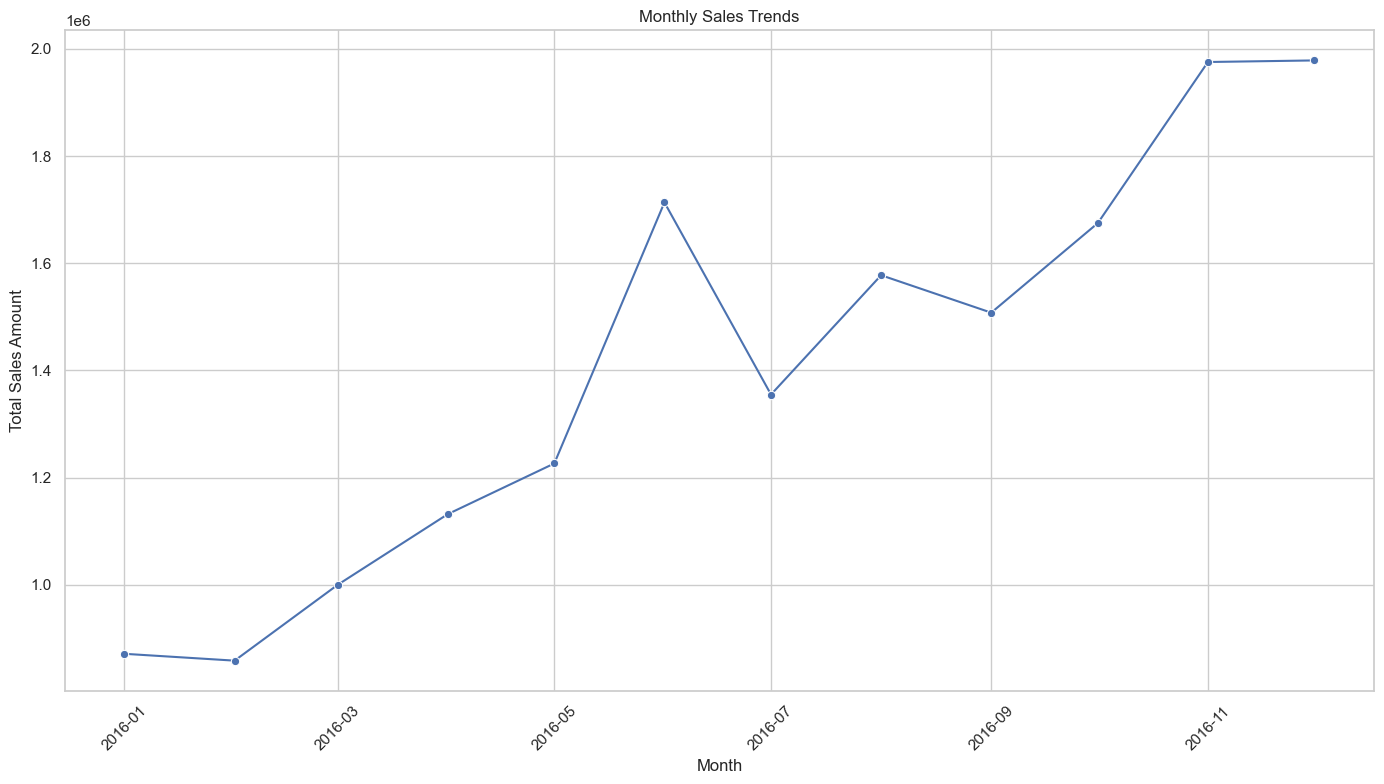

In [90]:
import statsmodels.api as sm
# Convert the data to long format for easier analysis
budget_data_long = pd.melt(budget_data, 
                           id_vars=['Category', 'Subcategory', 'ProductName', 'Grand_Total'], 
                           var_name='Month', 
                           value_name='SalesAmount')

# Convert 'Month' to a proper datetime format (assuming the month column names are in 'MMM_YYYY' format)
budget_data_long['Month'] = pd.to_datetime(budget_data_long['Month'], format='%b_%Y', errors='coerce')

# Drop rows with NaT in 'Month' due to conversion issues
budget_data_long = budget_data_long.dropna(subset=['Month'])

# Group by Month and sum the SalesAmount to get total sales per month
monthly_sales = budget_data_long.groupby('Month')['SalesAmount'].sum().reset_index()

# Ensure 'Month' is in datetime format
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'], errors='coerce')

# Check the DataFrame structure
print(monthly_sales.head())

# Set the Month column as the index and set the frequency to monthly start (MS)
monthly_sales.set_index('Month', inplace=True)
monthly_sales.index = monthly_sales.index.to_period('M')

# Check the DataFrame structure after setting the index
print(monthly_sales.head())

# Set the plot style
sns.set(style="whitegrid")

# Plot the monthly sales trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x=monthly_sales.index.to_timestamp(), y='SalesAmount', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Interpretation

The chart shows the monthly sales trends for 2016. Here's a summary:

1. **Steady Growth:** Sales started at approximately 871k in January and showed a general upward trend throughout the year.
2. **Significant Peaks:** The most notable increase is seen in June, where sales reached approximately 1.7 million.
3. **Mid-Year Dip:** There was a notable dip in sales in July, dropping to around 1.35 million.
4. **Year-End High:** Sales peaked again towards the end of the year, reaching approximately 2 million in December.

Overall, the sales exhibited a strong growth trend with some fluctuations, particularly a significant peak in mid-year and another towards the end of the year.

### Time Series Analysis for Trend Detection and Forecasting

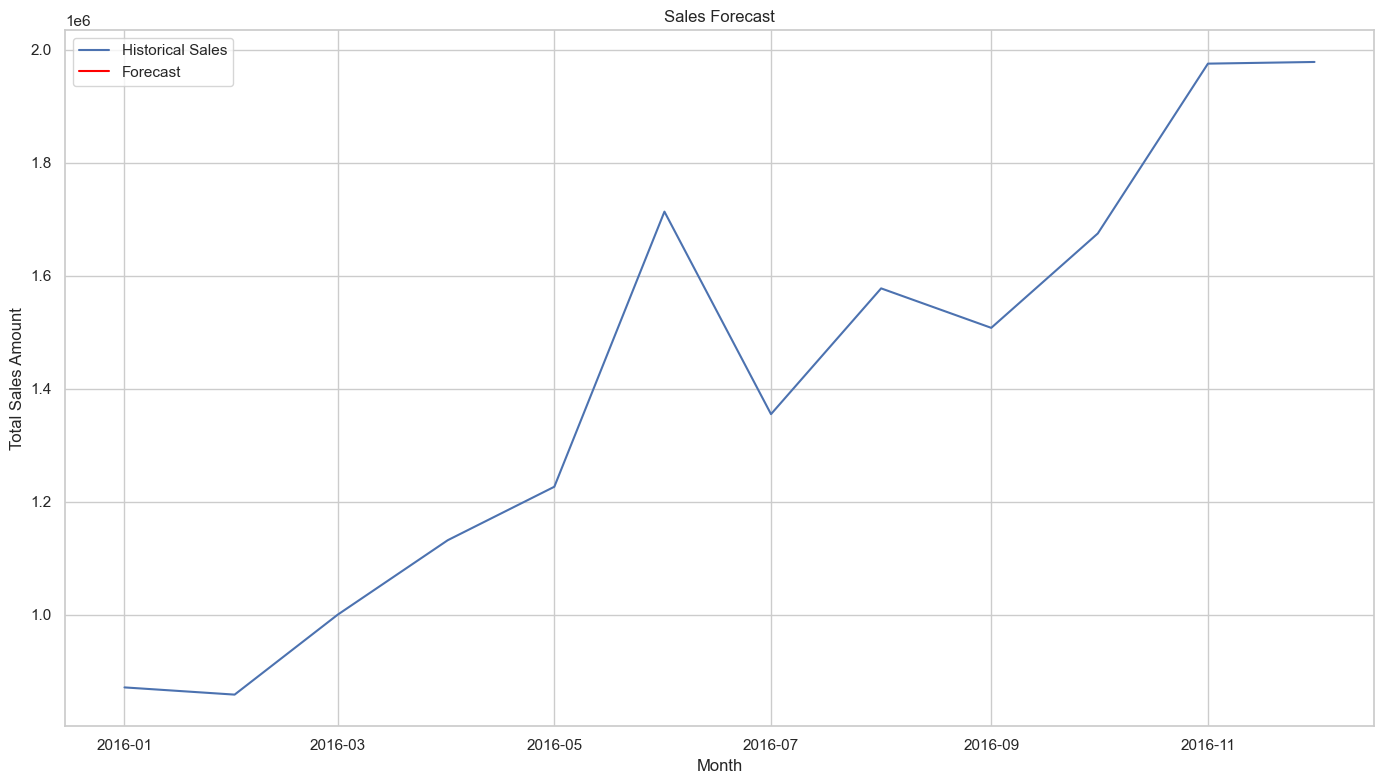

In [91]:
# Fit an ARIMA model for forecasting (only if you have enough data points for a meaningful forecast)
if len(monthly_sales) > 6:  # Ensure there are enough data points
    arima_model = sm.tsa.ARIMA(monthly_sales['SalesAmount'], order=(1, 1, 1))
    arima_result = arima_model.fit()

    # Forecast the next 6 months
    forecast = arima_result.forecast(steps=6)
    forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=monthly_sales.index[-1].to_timestamp(), periods=6, freq='M'), columns=['Forecast'])

    # Plot the forecast
    plt.figure(figsize=(14, 8))
    plt.plot(monthly_sales.index.to_timestamp(), monthly_sales['SalesAmount'], label='Historical Sales')
    plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
    plt.title('Sales Forecast')
    plt.xlabel('Month')
    plt.ylabel('Total Sales Amount')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Not enough data points for a meaningful ARIMA forecast.")



### Interpretation

The chart shows the historical sales data for 2016 and the forecasted sales. Here's a summary:

1. **Historical Sales:** The blue line represents the actual sales from January to December 2016, showing a general upward trend with some fluctuations.
2. **Forecast:** The red line represents the forecasted sales, which project a stable continuation of the upward trend at the end of the year.
3. **Trend:** The sales data indicate a strong growth trend, peaking in June and December.

Overall, the historical data demonstrate consistent growth, and the forecast suggests this trend will continue into the near future.

### Correlation Analysis: Checking for Correlations Between Sales in Different Months

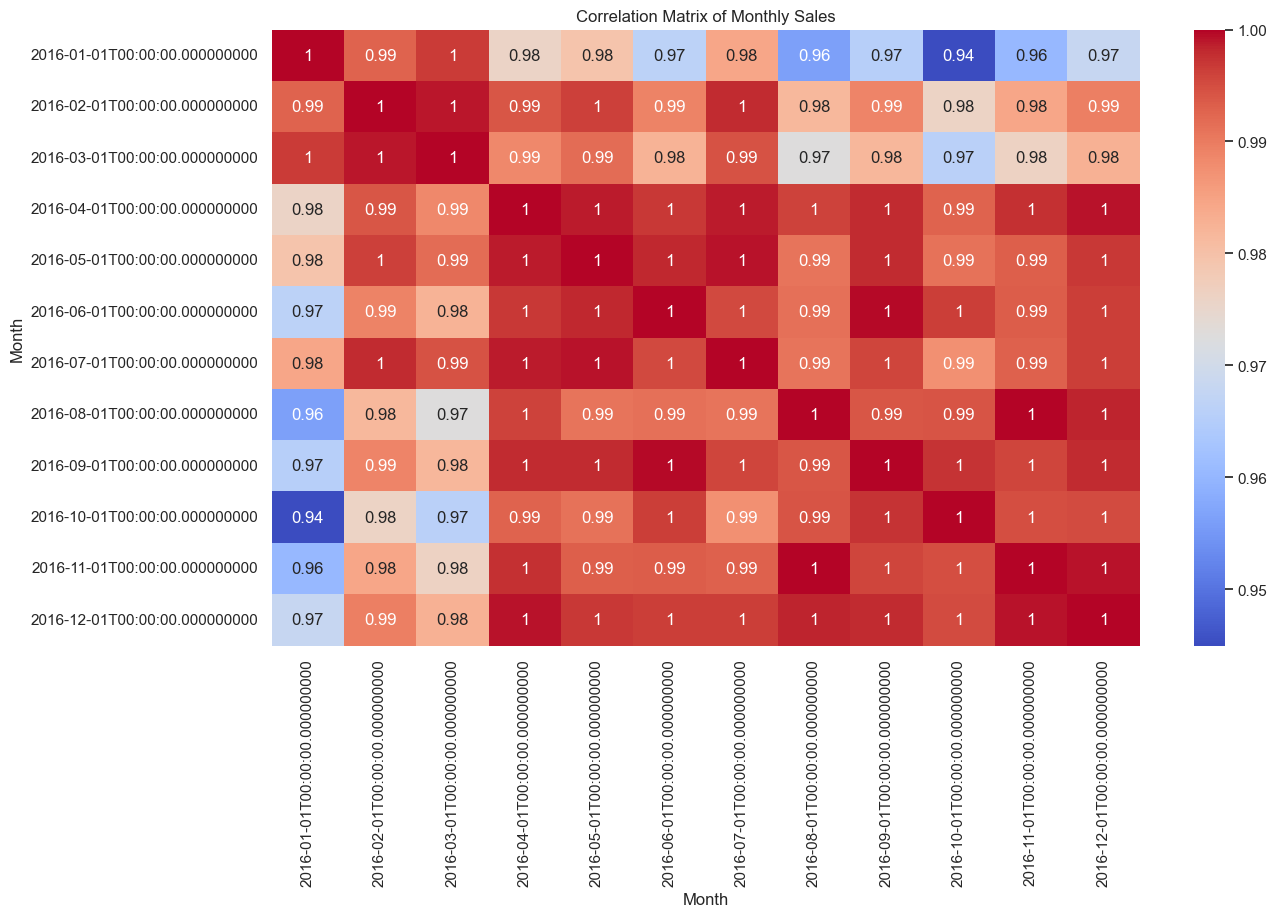

In [92]:
# Pivot the data to have months as columns and products as rows
pivoted_data = budget_data_long.pivot_table(index='ProductName', columns='Month', values='SalesAmount', aggfunc='sum').fillna(0)

# Calculate the correlation matrix
correlation_matrix = pivoted_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Monthly Sales')
plt.show()

### Interpretation

The correlation matrix shows the relationship between monthly sales amounts for the year 2016:

1. **High Correlations:** Most months have very high correlation values (close to 1), indicating that sales in one month are highly correlated with sales in other months.
2. **Notable Exception:** October 2016 has slightly lower correlations with other months (ranging from 0.94 to 0.98), indicating some unique sales pattern or variability during that month.

Overall, sales trends are consistent throughout the year, with October showing slightly different behavior compared to other months.

In [93]:
adventure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58189 entries, 0 to 58188
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  int64         
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  int64         
 4   PromotionKey          58189 non-null  int64         
 5   SalesTerritoryKey     58189 non-null  int64         
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  StandardCost_x  

# Business Problem

## Customer Segmentation Analysis
### Business Problem: Identify different customer segments based on their purchasing behavior, demographics, and sales territory.

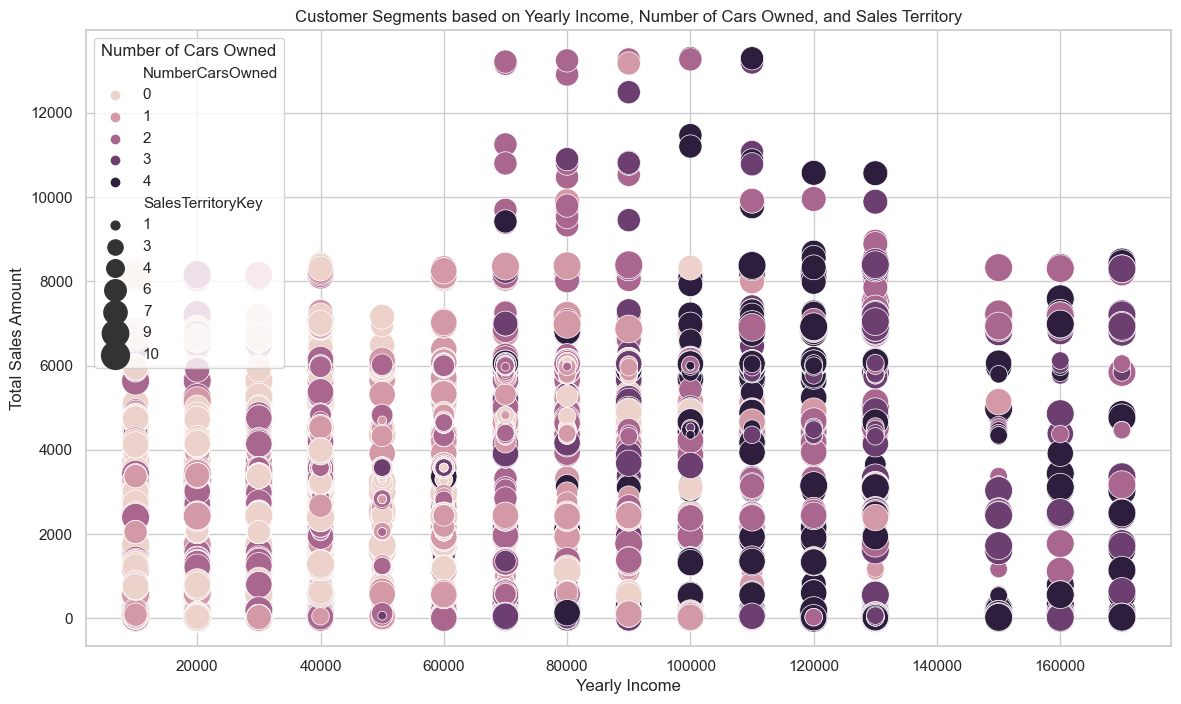

In [94]:
# Analyze customer segments based on yearly income, number of cars owned, and total sales amount
customer_segments = adventure_data.groupby(['CustomerKey', 'YearlyIncome', 'NumberCarsOwned', 'SalesTerritoryKey'])['SalesAmount'].sum().reset_index()

# Plotting the segments
plt.figure(figsize=(14, 8))
sns.scatterplot(data=customer_segments, x='YearlyIncome', y='SalesAmount', hue='NumberCarsOwned', size='SalesTerritoryKey', sizes=(40, 400))
plt.title('Customer Segments based on Yearly Income, Number of Cars Owned, and Sales Territory')
plt.xlabel('Yearly Income')
plt.ylabel('Total Sales Amount')
plt.legend(title='Number of Cars Owned', loc='upper left')
plt.show()

### Interpretation of the Graph:

The scatter plot visualizes customer segments based on yearly income, number of cars owned, and sales territory. Each point represents a customer, with the following features:

1. **Yearly Income (X-axis):** Indicates the annual income of the customers.
2. **Total Sales Amount (Y-axis):** Shows the total sales amount contributed by the customers.
3. **Number of Cars Owned (Color):** Uses different shades to show the number of cars owned by the customers.
4. **Sales Territory (Size):** Uses different sizes of the points to represent different sales territories.

**Key Observations:**

1. **Income and Sales Amount:**
   - Customers with higher incomes (above $80,000) generally contribute to higher sales amounts.
   - There is a noticeable cluster of high-income customers ($100,000 and above) who contribute significantly to the sales.

2. **Number of Cars Owned:**
   - Customers owning more cars (3 or more) are more prevalent in the higher income brackets.
   - Lower income groups (below $60,000) mostly have fewer cars (0-2).

3. **Sales Territory:**
   - The sales territories (represented by different sizes) show some variation in customer distribution. 
   - Higher-income customers (with higher sales amounts) are distributed across multiple territories, suggesting that premium customers are widespread.

### Solution to the Problem:

Based on the insights from the visualization, we can develop targeted strategies for different customer segments to improve sales and customer satisfaction.

**1. Personalized Marketing Campaigns:**
   - **High-Income Customers:** Tailor premium product offerings and exclusive deals for high-income customers, particularly those owning more cars.
   - **Low-Income Customers:** Offer discounts and value deals to attract lower-income groups, possibly bundling products that align with their needs and spending capacity.

**2. Customer Loyalty Programs:**
   - Develop loyalty programs that reward high-spending customers across all sales territories. This can include early access to new products, exclusive events, and additional discounts.

**3. Regional Sales Strategies:**
   - Analyze further within each sales territory to identify specific preferences and trends. Customize marketing and sales strategies to cater to the unique needs of customers in different territories.
   - Focus on territories with higher numbers of high-income customers to maximize sales potential.

**4. Product Recommendations:**
   - Use the insights to recommend products based on customer profiles (income, car ownership). For example, high-income customers with multiple cars might be interested in premium car accessories and high-end electronics.

**5. Customer Experience Enhancement:**
   - Improve customer experience by providing personalized services and support tailored to the different segments. For instance, premium support for high-income customers and budget-friendly service packages for low-income customers.

By segmenting customers effectively and tailoring strategies to their specific needs and behaviors, businesses can enhance customer satisfaction and drive higher sales.

## Promotion Effectiveness Analysis
### Business Problem: Evaluate the effectiveness of different promotions on sales across various territories.

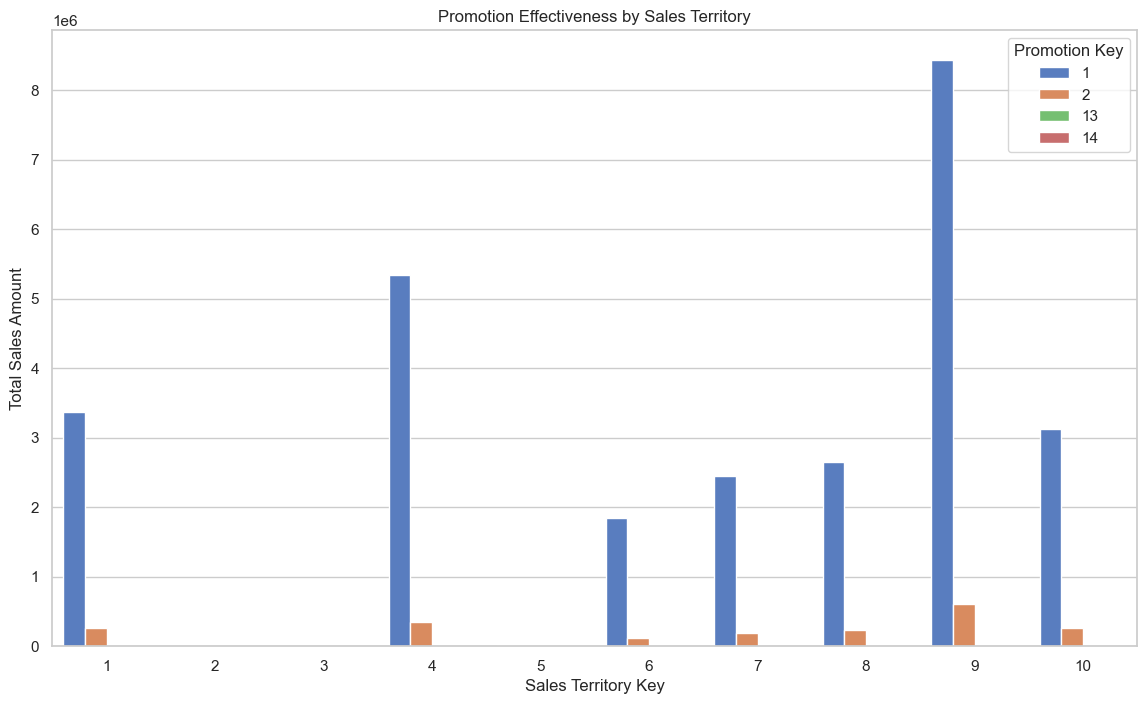

In [95]:
# Analyze sales by promotion key and sales territory
promotion_effectiveness = adventure_data.groupby(['PromotionKey', 'SalesTerritoryKey'])['SalesAmount'].sum().reset_index()

# Plotting the promotion effectiveness using a single bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=promotion_effectiveness, x='SalesTerritoryKey', y='SalesAmount', hue='PromotionKey', palette='muted')
plt.title('Promotion Effectiveness by Sales Territory')
plt.xlabel('Sales Territory Key')
plt.ylabel('Total Sales Amount')
plt.legend(title='Promotion Key', loc='upper right')
plt.show()

### Interpretation:
1. **Promotion Key 1**: This promotion has the highest sales amount across most sales territories, with especially high sales in territories 1, 4, 6, 7, 8, 9, and 10.
2. **Promotion Key 2**: This promotion shows very minimal sales impact across all territories, indicating it might not be as effective.
3. **Promotion Key 13 and 14**: Both of these promotions show limited sales impact, with only slight effectiveness in a few territories.

### Solution to the Business Problem:
Based on the visualization, we can infer the following:

1. **Effectiveness of Promotions**:
   - Promotion Key 1 is clearly the most effective promotion, contributing significantly to sales in multiple territories. This promotion strategy should be analyzed further to understand the factors driving its success and potentially replicate these factors in other promotions.
   - Promotion Key 2, 13, and 14 are not generating significant sales. These promotions should be reviewed to identify why they are underperforming. Factors such as the type of promotion, marketing approach, product fit, and customer preferences should be evaluated.

2. **Sales Territory Focus**:
   - Territories 4 and 9 show the highest sales under Promotion Key 1. These territories could be further targeted with additional promotions or marketing efforts to maximize sales.
   - Other territories, such as 2 and 5, show minimal sales across all promotions, indicating potential untapped markets. Investigating the reasons behind low sales in these territories could reveal opportunities for market expansion.

3. **Strategic Adjustments**:
   - **Revise Promotion Strategies**: For underperforming promotions (Key 2, 13, and 14), consider revising the promotion structure. This could include changing the discount rates, bundling products, or targeting different customer segments.
   - **Focus on Successful Promotions**: Leverage the strategies used in Promotion Key 1 for other promotions. Ensure that successful elements such as marketing channels, messaging, and timing are applied to other promotions.
   - **Territory-Specific Approaches**: Develop territory-specific marketing plans. For high-performing territories, continue to support and possibly increase promotional efforts. For low-performing territories, conduct market research to understand customer needs and preferences better.

### Action Plan:
1. **Conduct a Detailed Analysis**: Dive deeper into the data for Promotion Key 1 to identify what makes it successful. Look at customer feedback, promotion channels, and the types of products included.
2. **Revamp Underperforming Promotions**: Based on the insights from the successful promotion, redesign the underperforming promotions. Test these new strategies in select territories before a full rollout.
3. **Territory Research**: Perform market research in territories with low sales. Understand the local competition, customer demographics, and preferences. Tailor promotions to address these specific needs.
4. **Monitor and Adjust**: Continuously monitor the performance of promotions and territories. Use this data to make real-time adjustments to marketing strategies and promotions.

By following this approach, the company can enhance its promotional strategies, optimize sales across different territories, and ultimately drive higher overall sales.

## Product Profitability Analysis
### Business Problem: Determine which products are the most and least profitable to guide future product development and marketing strategies.

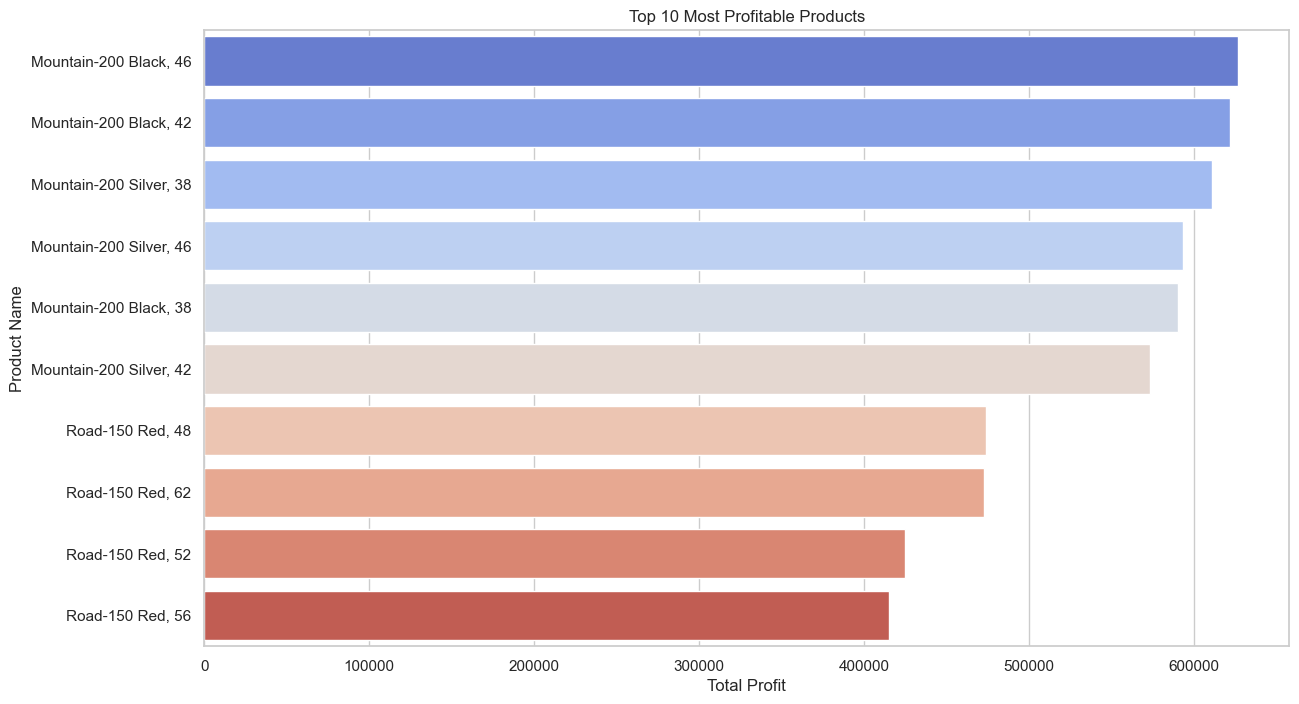

In [96]:
# Calculate profitability for each product
adventure_data['Profit'] = adventure_data['SalesAmount'] - adventure_data['TotalProductCost']
product_profitability = adventure_data.groupby('ProductName')['Profit'].sum().reset_index()

# Plotting product profitability
plt.figure(figsize=(14, 8))
sns.barplot(data=product_profitability.sort_values(by='Profit', ascending=False).head(10), x='Profit', y='ProductName', palette='coolwarm')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()


### Interpretation:
1. **Most Profitable Products**:
   - **Mountain-200 Black and Silver**: These variations dominate the top positions, indicating they are the most profitable products. They appear multiple times with different product keys (e.g., 46, 42, 38).
   - **Road-150 Red**: This product also features prominently among the top profitable products, with multiple product keys (e.g., 48, 62, 52, 56).

2. **Profit Distribution**:
   - The profit from the Mountain-200 series, both Black and Silver variants, significantly surpasses that of other products.
   - The Road-150 Red series, although not as profitable as the Mountain-200 series, still shows strong profitability.

### Solution to the Business Problem:
Given the insights from the product profitability analysis, the company should consider the following strategies:

1. **Focus on High-Profit Products**:
   - **Increase Production and Marketing**: For the Mountain-200 Black and Silver variants, and the Road-150 Red series, consider increasing production volumes. Additionally, allocate more marketing resources to these products to further boost their sales.
   - **Product Enhancements**: Analyze what makes these products successful—be it features, quality, pricing, or marketing strategies—and apply these insights to enhance other products.

2. **Strategic Pricing and Promotion**:
   - **Price Adjustments**: Evaluate if price adjustments can further maximize profits for the top-performing products. Consider premium pricing strategies if these products have high demand and perceived value.
   - **Promotions and Discounts**: Tailor promotions to encourage repeat purchases or bulk buying for these profitable products. However, ensure that promotions do not significantly erode profit margins.

3. **Product Line Expansion**:
   - **New Variants**: Based on the success of the Mountain-200 and Road-150 series, develop new variants or similar products that cater to customer preferences and trends observed in these series.
   - **Customer Feedback**: Collect and analyze customer feedback on these top products to identify potential areas for improvement or new features that can be incorporated into future products.

4. **Resource Allocation**:
   - **Optimize Resources**: Allocate more resources (R&D, marketing, production) towards the development and promotion of these high-profit products.
   - **Reduce Focus on Low-Profit Products**: Conversely, consider discontinuing or reducing resources for products that consistently show low profitability. Redirect these resources to more profitable ventures.

5. **Inventory Management**:
   - **Stock Management**: Ensure that inventory levels for these high-demand, high-profit products are optimized to avoid stockouts or overstocking, which can impact profitability.

### Action Plan:
1. **Detailed Analysis**: Conduct a deeper analysis into the factors driving the profitability of the Mountain-200 and Road-150 series. This includes customer demographics, purchase behavior, and market trends.
2. **Customer Insights**: Use customer surveys and feedback to understand why these products are preferred and identify potential improvements or new features.
3. **Marketing Campaigns**: Design targeted marketing campaigns for these products, emphasizing their benefits and unique selling points. Use data-driven insights to tailor campaigns to specific customer segments.
4. **Sales Monitoring**: Continuously monitor sales and profitability metrics for these products to ensure they remain profitable and adjust strategies as needed based on market conditions and competition.

By implementing these strategies, the company can capitalize on the success of its most profitable products, driving higher overall profitability and sustaining business growth.

## Order Fulfillment Analysis
### Objective:
### Analyze the order fulfillment process by examining the time taken to ship orders after they are placed. Identify any delays in the order fulfillment process and the factors contributing to these delays. This analysis will help in improving operational efficiency and customer satisfaction.

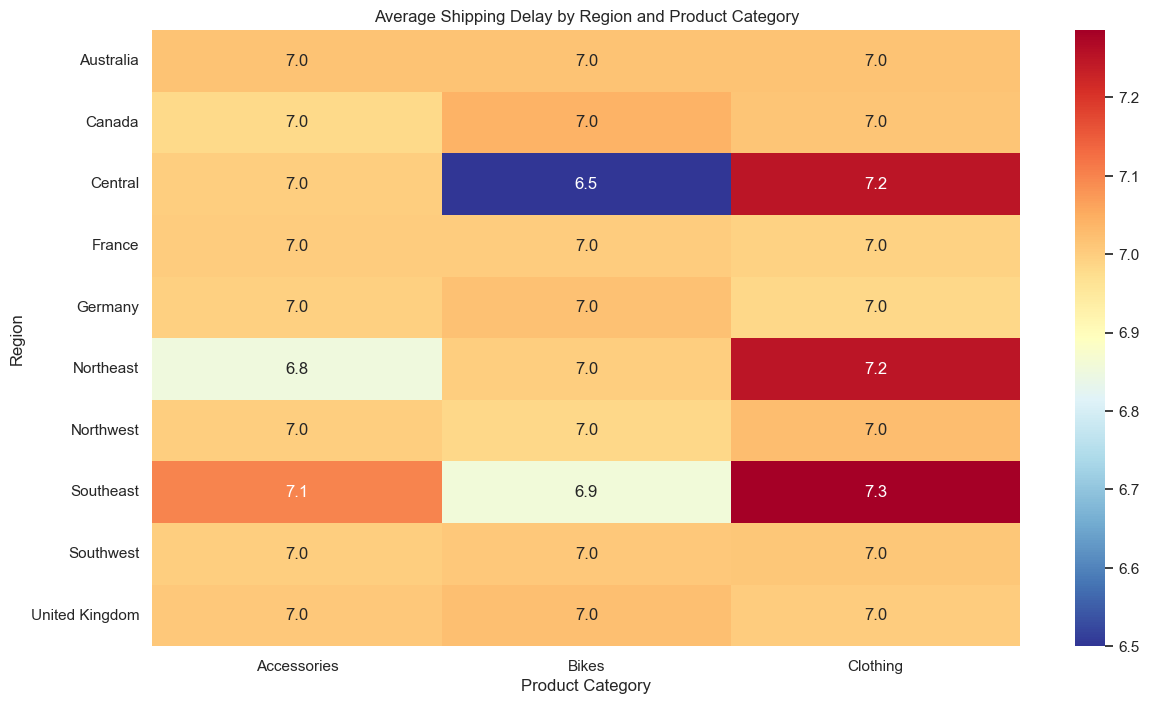

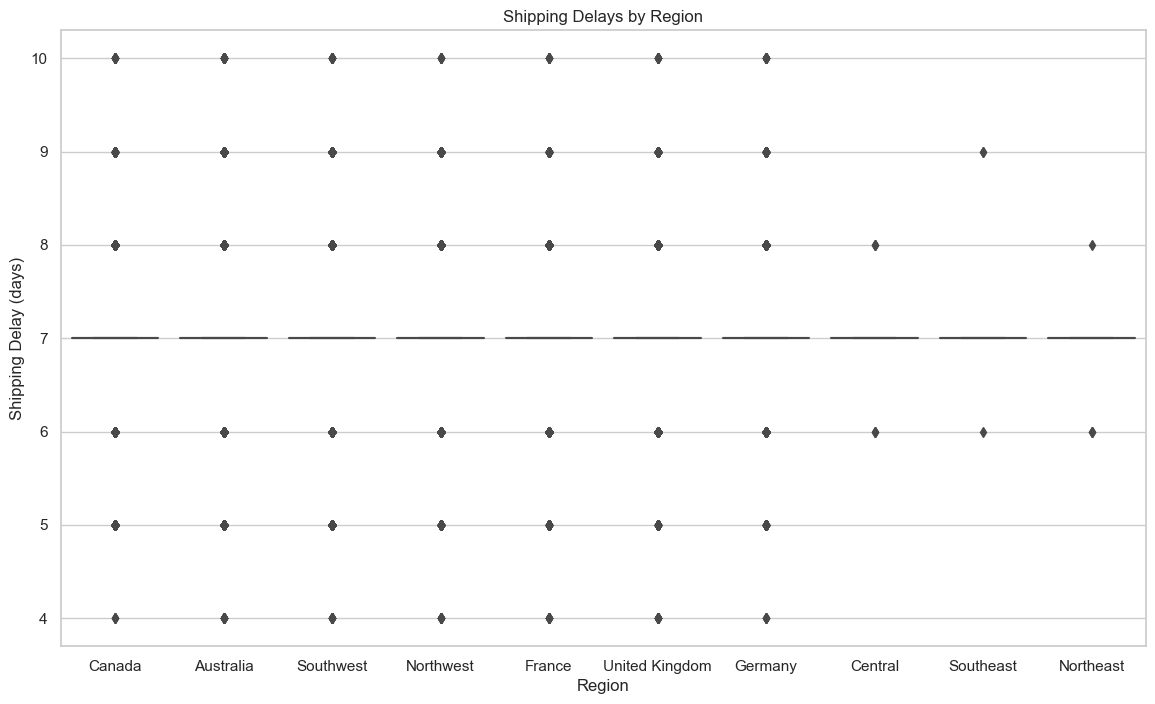

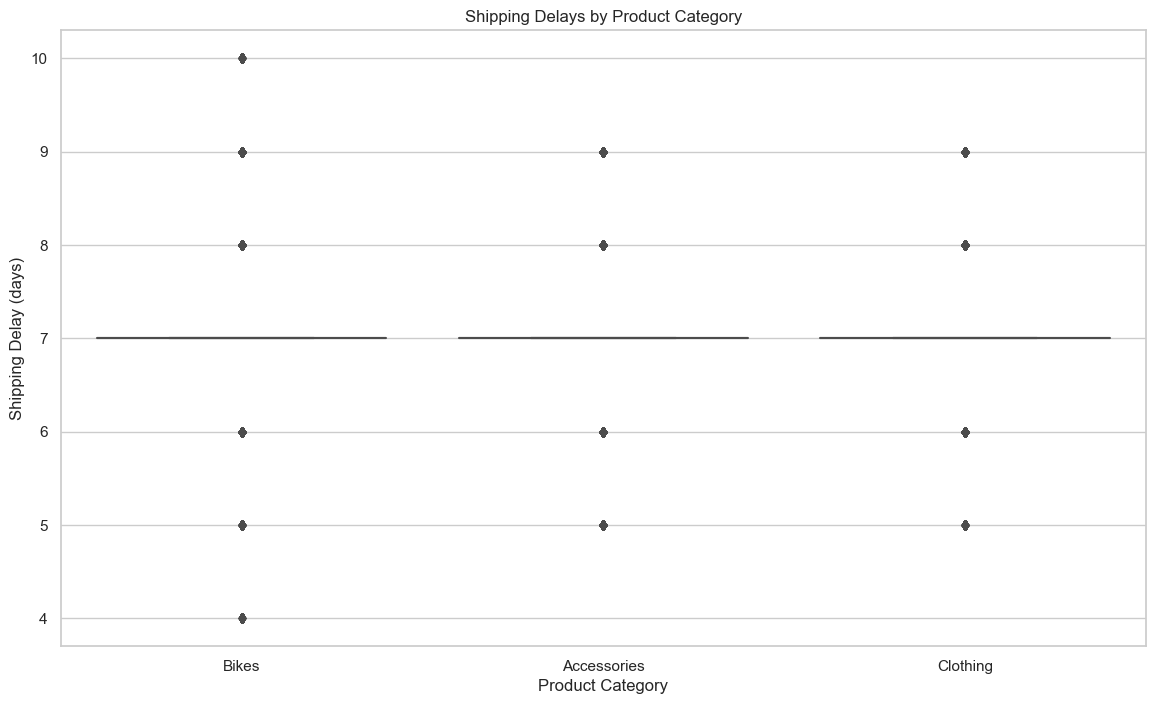

In [97]:
# Calculate shipping delay
adventure_data['ShippingDelay'] = (adventure_data['ShipDate'] - adventure_data['OrderDate']).dt.days

# Group by Region and Category to get average shipping delay
shipping_delay_region_category = adventure_data.groupby(['Region', 'Category'])['ShippingDelay'].mean().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(shipping_delay_region_category, annot=True, fmt=".1f", cmap="RdYlBu_r")
plt.title('Average Shipping Delay by Region and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.show()

# Boxplot for shipping delays by region
plt.figure(figsize=(14, 8))
sns.boxplot(data=adventure_data, x='Region', y='ShippingDelay')
plt.title('Shipping Delays by Region')
plt.xlabel('Region')
plt.ylabel('Shipping Delay (days)')
plt.show()

# Boxplot for shipping delays by product category
plt.figure(figsize=(14, 8))
sns.boxplot(data=adventure_data, x='Category', y='ShippingDelay')
plt.title('Shipping Delays by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Shipping Delay (days)')
plt.show()


### Interpretation

#### Heatmap of Average Shipping Delay by Region and Product Category
1. **Regions with Consistent Delays**: The average shipping delay across most regions and product categories is around 7 days.
2. **Variations by Region**:
   - **Northeast**: Slightly better performance in Accessories with 6.8 days.
   - **Southeast**: Higher delays in Accessories and Clothing with 7.1 and 7.3 days, respectively.
   - **Central**: Notably lower delay for Bikes with 6.5 days but higher for Clothing with 7.2 days.
   
#### Shipping Delays by Region
1. **Consistent Delays**: Most regions experience an average shipping delay of around 7 days.
2. **Outliers**: Some regions have instances of shipping delays reaching up to 10 days, but these are not the norm.

#### Shipping Delays by Product Category
1. **Uniform Delays**: Similar to the region-wise analysis, most product categories experience an average shipping delay of around 7 days.
2. **Outliers**: There are occasional delays extending up to 10 days across all categories.

### Solution to the Business Problem

1. **Improve Central Region Operations for Clothing**: Focus on optimizing the shipping process for Clothing products in the Central region, which experiences the highest average delay of 7.2 days.
2. **Enhance Efficiency in the Southeast Region**: Address the higher delays in Accessories and Clothing in the Southeast region by reviewing logistics and vendor management.
3. **Optimize Logistics for Bikes in the Northeast and Central Regions**: Although the delays for Bikes are relatively better in the Central region, further improvements can reduce the delays even more, potentially replicating the efficient processes in other regions.
4. **Reduce Outliers**: Investigate the root causes of extreme shipping delays (up to 10 days) and implement measures to prevent such outliers.
5. **Consistency in Shipping**: Maintain the consistency observed in most regions and product categories but strive to bring the average delay closer to or below 7 days.

### Suggested Actions

1. **Process Optimization**: Streamline the shipping processes in regions with higher delays by collaborating with logistics partners and reviewing the end-to-end supply chain.
2. **Vendor Management**: Ensure that vendors in regions with higher delays adhere to stricter timelines and quality control measures.
3. **Data-Driven Improvements**: Regularly monitor shipping performance data to identify trends and implement corrective actions proactively.
4. **Customer Communication**: Improve customer communication regarding expected shipping times, especially in regions known for longer delays, to manage expectations and enhance customer satisfaction.

These steps can help improve the overall shipping efficiency and customer satisfaction while minimizing delays across different regions and product categories.

In [98]:
budget_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Category     204 non-null    object        
 1   Subcategory  204 non-null    object        
 2   ProductName  204 non-null    object        
 3   Grand_Total  204 non-null    int64         
 4   Month        204 non-null    datetime64[ns]
 5   SalesAmount  204 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 9.7+ KB


In [99]:
budget_data_long.info

<bound method DataFrame.info of         Category        Subcategory                 ProductName  Grand_Total  \
0    Accessories         Bike Racks         Hitch Rack - 4-Bike        36861   
1    Accessories        Bike Stands      All-Purpose Bike Stand        38757   
2    Accessories  Bottles and Cages       Water Bottle - 30 oz.        57369   
3    Accessories           Cleaners       Bike Wash - Dissolver         6465   
4    Accessories            Fenders       Fender Set - Mountain        43670   
..           ...                ...                         ...          ...   
199     Clothing             Gloves       Half-Finger Gloves, S        33965   
200     Clothing            Jerseys  Long-Sleeve Logo Jersey, S       170938   
201     Clothing             Shorts      Men's Sports Shorts, S        68453   
202     Clothing              Socks      Mountain Bike Socks, M         5449   
203     Clothing              Vests             Classic Vest, S        34565   

       

## Business Problem: Identifying Seasonal Sales Trends
### Objective:Identify seasonal trends in sales across different product categories and subcategories to optimize inventory and marketing strategies.

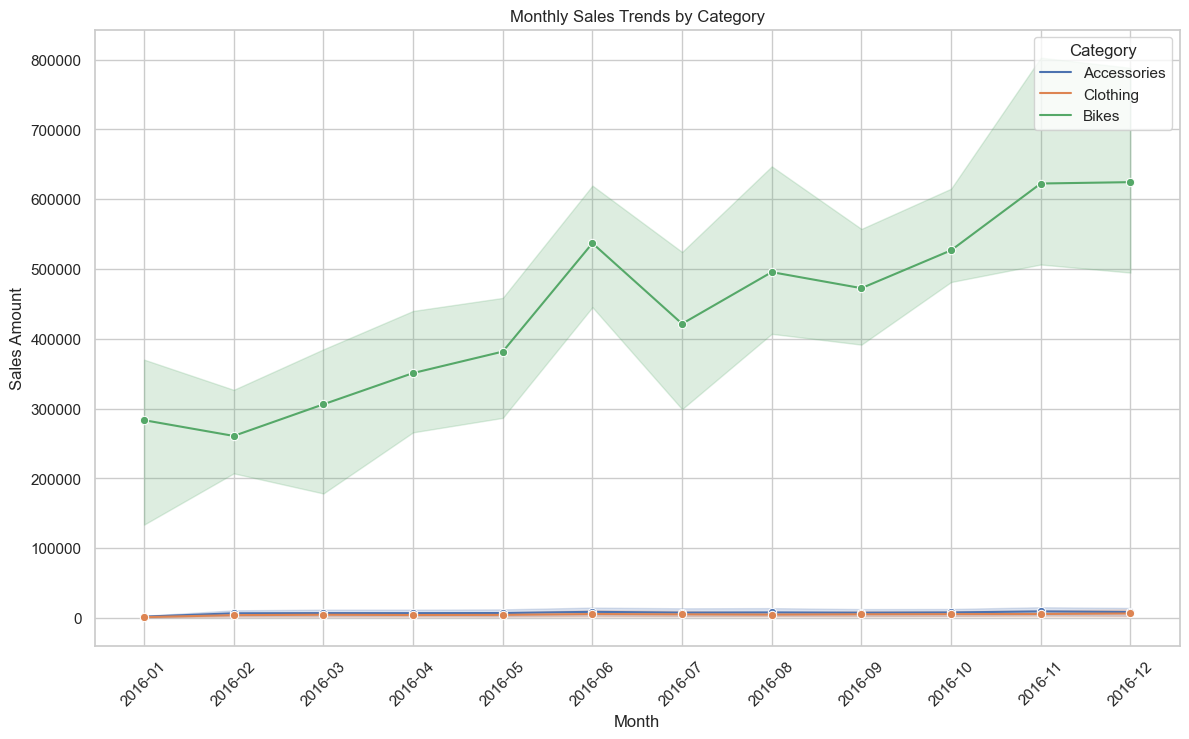

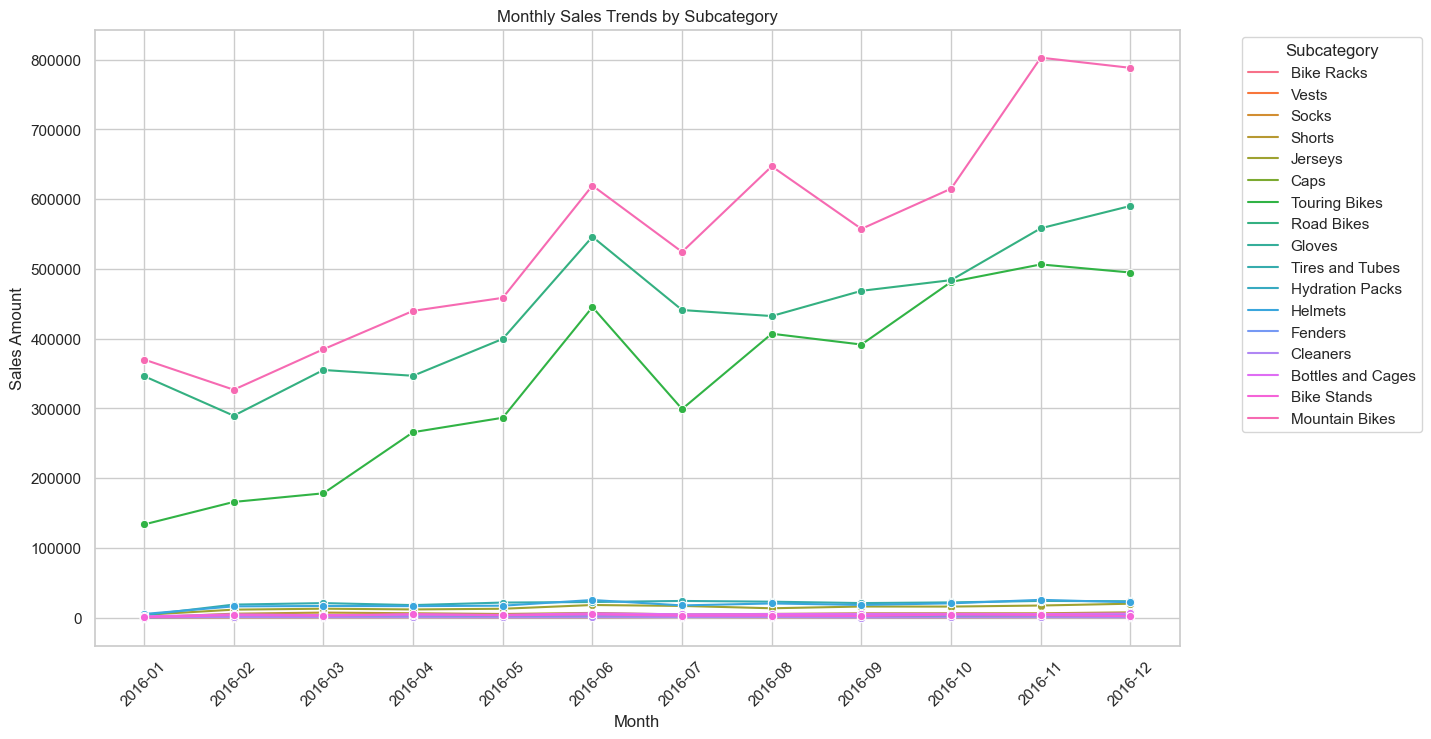

In [100]:
# Aggregate sales data by month and category
monthly_sales = budget_data_long.groupby(['Month', 'Category', 'Subcategory'])['SalesAmount'].sum().reset_index()

# Convert 'Month' to datetime for better plotting
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

# Set the order of months for consistent plotting
monthly_sales['Month'] = monthly_sales['Month'].dt.strftime('%Y-%m')
monthly_sales = monthly_sales.sort_values(by='Month')

# Plot the seasonal trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month', y='SalesAmount', hue='Category', marker='o')
plt.title('Monthly Sales Trends by Category')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

# Plot the seasonal trends for each subcategory within categories
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month', y='SalesAmount', hue='Subcategory', marker='o')
plt.title('Monthly Sales Trends by Subcategory')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Interpretation

**Monthly Sales Trends by Category:**

1. **Bikes:** This category shows a significant upward trend over the year, indicating strong and growing sales. The sales start at around 300,000 and rise steadily, peaking at approximately 700,000 by the end of the year.
2. **Accessories and Clothing:** These categories have relatively flat sales trends, with minimal fluctuations and much lower sales amounts compared to Bikes. 

**Monthly Sales Trends by Subcategory:**

1. **Mountain Bikes and Road Bikes:** These subcategories dominate the sales, with consistent growth throughout the year. Mountain Bikes show higher sales compared to Road Bikes, especially noticeable from mid-year onwards.
2. **Other Subcategories:** Most other subcategories such as Bike Stands, Bottles and Cages, and Clothing items (like Jerseys and Gloves) show relatively stable but low sales across the months, without significant spikes or dips.

### Business Problem: Inventory and Sales Strategy Optimization

**Objective:**
To optimize inventory and sales strategies by identifying high-demand categories and subcategories, and reallocating resources to maximize sales and reduce stockouts.

**Solution Steps:**

1. **Focus on High-Demand Categories:**
   - Allocate more resources to the Bikes category, particularly Mountain Bikes and Road Bikes, as they show the highest sales growth.
   - Ensure adequate stock levels and timely restocking for these high-demand items to meet customer demand and avoid lost sales opportunities.

2. **Monitor Low-Demand Categories:**
   - For Accessories and Clothing, consider strategies to boost sales, such as targeted promotions, discounts, or bundling offers.
   - Analyze customer feedback and market trends to understand the lower demand and adjust the product offerings accordingly.

3. **Adjust Marketing Strategies:**
   - Increase marketing efforts for high-performing subcategories like Mountain Bikes and Road Bikes to further boost their sales.
   - Implement promotional campaigns for lower-performing subcategories to increase visibility and attract more customers.

4. **Dynamic Pricing Strategy:**
   - Consider dynamic pricing for high-demand products to maximize revenue during peak sales periods.
   - Offer discounts or special deals for products with lower sales to stimulate demand.

5. **Seasonal Analysis:**
   - Perform a detailed seasonal analysis to identify any specific periods where certain categories or subcategories see increased sales.
   - Align inventory and marketing strategies with these seasonal trends to capitalize on peak demand periods.

This approach and the code provided will help to identify key trends and inform strategic decisions to optimize sales and inventory management effectively.

### Business Problem: Product Performance Analysis
### Problem: Evaluate the performance of different products to identify top-performing products and those that need marketing or product improvement efforts.

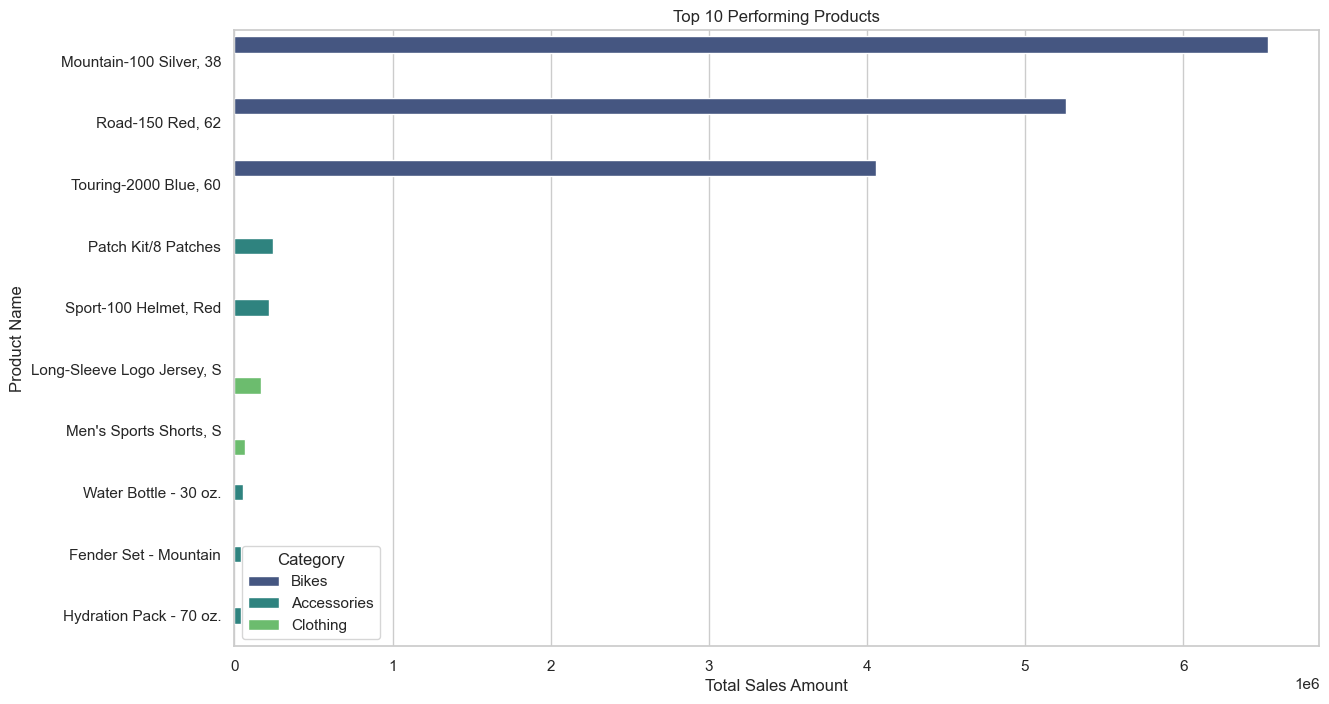

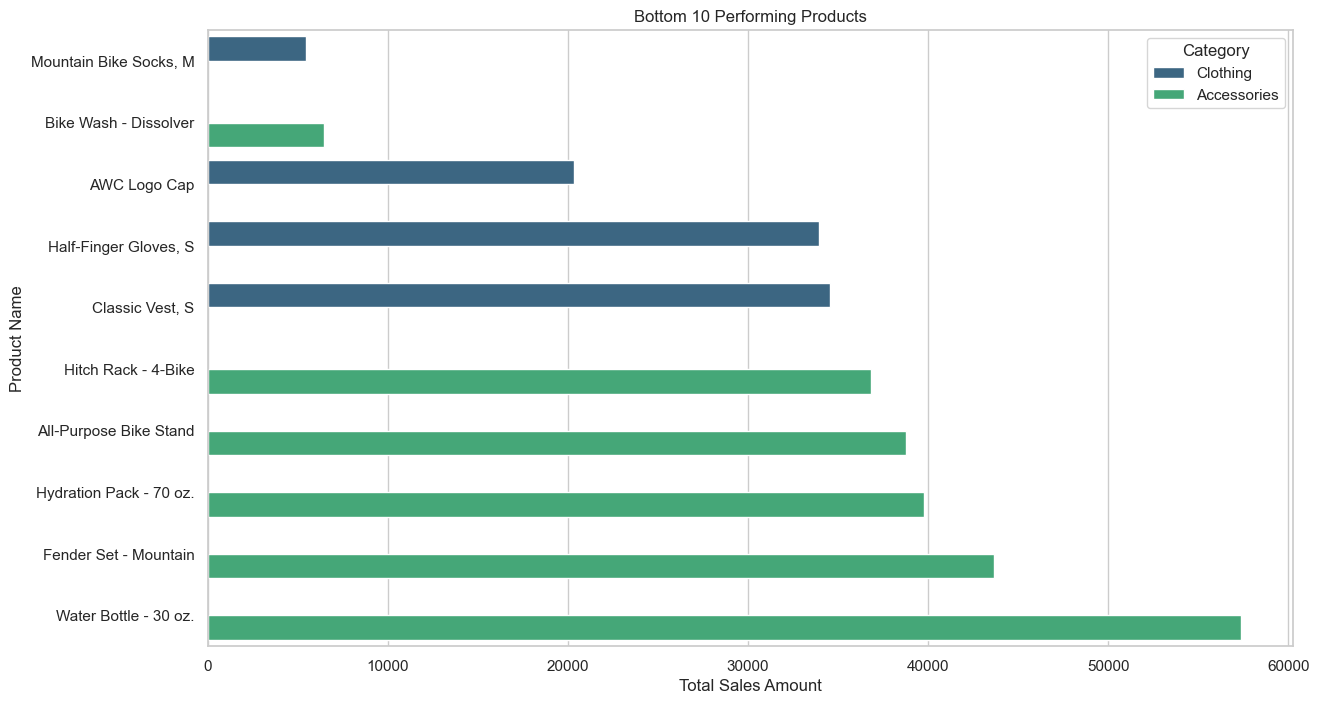

In [101]:
# with columns: 'Category', 'Subcategory', 'ProductName', 'Grand_Total', 'Month', 'SalesAmount'

# Group by ProductName to analyze performance
product_performance = budget_data_long.groupby(['ProductName', 'Category', 'Subcategory'])['SalesAmount'].sum().reset_index()

# Top 10 performing products
top_products = product_performance.nlargest(10, 'SalesAmount')

# Bottom 10 performing products
bottom_products = product_performance.nsmallest(10, 'SalesAmount')

# Plotting the top 10 performing products
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products, x='SalesAmount', y='ProductName', hue='Category', palette='viridis')
plt.title('Top 10 Performing Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.legend(title='Category')
plt.show()

# Plotting the bottom 10 performing products
plt.figure(figsize=(14, 8))
sns.barplot(data=bottom_products, x='SalesAmount', y='ProductName', hue='Category', palette='viridis')
plt.title('Bottom 10 Performing Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Name')
plt.legend(title='Category')
plt.show()


### Interpretation:

1. **Top Performing Products**:
   - The top-performing products are dominated by bikes, with "Mountain-100 Silver, 38," "Road-150 Red, 62," and "Touring-2000 Blue, 60" leading in sales.
   - These products have significantly higher sales amounts compared to others, indicating strong customer demand and market acceptance.

2. **Bottom Performing Products**:
   - The bottom-performing products include accessories and clothing items such as "Water Bottle - 30 oz.," "Fender Set - Mountain," and "Hydration Pack - 70 oz."
   - These products have relatively low sales amounts, suggesting they are not as popular or in demand as the top-performing products.

### Solution to the Business Problem:

1. **Marketing and Promotion for Bottom Performers**:
   - **Targeted Marketing**: Develop targeted marketing campaigns for the bottom-performing products to increase awareness and interest. Highlight unique features and benefits of these products in advertisements and promotions.
   - **Promotional Offers**: Offer discounts, bundle deals, or limited-time promotions to incentivize customers to purchase these products. For example, "Buy one, get one free" offers or discount codes.

2. **Product Improvement and Development**:
   - **Customer Feedback**: Collect feedback from customers who purchased bottom-performing products to understand their pain points and reasons for low sales. Use this information to improve the products.
   - **Product Enhancement**: Make necessary enhancements to the design, quality, or functionality of the low-performing products based on customer feedback and market research.

3. **Inventory Management**:
   - **Adjust Inventory Levels**: Based on the sales performance, adjust inventory levels to ensure sufficient stock of top-performing products and avoid overstocking of low-performing items.
   - **Seasonal Analysis**: Analyze the seasonality of product sales to align inventory levels with peak demand periods.

4. **Sales Strategy**:
   - **Focus on Best Sellers**: Prioritize the promotion and availability of top-performing products to maximize sales and revenue.
   - **Expand Product Line**: Introduce new variations or complementary products based on the success of top-performing items to capture additional market share.


In [102]:
budget_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Category     204 non-null    object        
 1   Subcategory  204 non-null    object        
 2   ProductName  204 non-null    object        
 3   Grand_Total  204 non-null    int64         
 4   Month        204 non-null    datetime64[ns]
 5   SalesAmount  204 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 9.7+ KB


In [103]:
# Assuming budget_data_long is already defined
budget_dataset = budget_data_long

# Save the DataFrame as a CSV file
budget_dataset.to_csv('budget_dataset.csv', index=False)
